# Analysis of the autism data

In [2]:
run init.ipynb

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Done.


# Dataset Illustration

In [192]:
df = pd.read_csv(AUTISM_DATA_PATH)
# Data definition
data = Dataset(df=df, 
               missing_data_handling='encoding',
               imputation_method='without',
               sampling_method='without',
               scenario = None, 
               features_name = DEFAULT_PREDICTORS,
               scale_data=True, 
               use_missing_indicator_variables=False,
               verbosity=4, 
               proportion_train=1)

data.filter(administration={'order': 'first', 'completed': True})
data.df.loc[data.df['study'].isin(['SAESDM', 'IMPACT', 'P3R']), 'diagnosis'] = 1


Post-processing inital df (removing columns with no cva features, encoding srings, compute administrations order, compute condensed S/NS variables)... 
Predicting diagnosis based on 15 features
Splitting dataset into test and train set.
Encoding 2933 (train) and 0 (test) missing values with -5.
Removing 309/2933 incomplete administrations.
Removing 1125/2624 keeping first admin.
1499 administrations left.


id
diagnosis     
-1.0       150
 0.0       929
 1.0       334
 2.0        27
 3.0        49
 4.0        10

Splitting dataset into test and train set.
Encoding 1499 (train) and 0 (test) missing values with -5.


In [172]:
print('Diagnosis count') 
display(display(data.df.groupby('diagnosis')[['id']].count()))

print('Count per study') 
display(data.df.groupby('study').count())

print('Missing age count per study') 
display(data.df[data.df['age'].isna()].groupby('study').count())


Diagnosis count


id
diagnosis     
-1.0       160
 0.0       963
 1.0       340
 2.0        29
 3.0        49
 4.0        11

None

Count per study


id  diagnosis  language  app_version  subject  administration  features_extracted  face_tracking  age  date  path  sex  ethnicity  race  primary_education  mullen_el  mullen_fm  mullen_rl  mullen_vr  mullen_elc_std  ados_total  ados_rrb  ados_sa  srs_total_tscore  srs_social_awareness_tscore  srs_social_motivation_tscore  cbcl_scaleIV_score  cbcl_asd_score  mchat_total  mchat_final  mchat_result  BB_gaze_percent_right  BB_gaze_silhouette_score  S_gaze_percent_right  S_gaze_silhouette_score  FP_gaze_speech_correlation  FP_gaze_silhouette_score  proportion_of_name_call_responses  average_response_to_name_delay  name_call_response_binary  FB_postural_sway  FB_postural_sway_derivative  DIGC_postural_sway  DIGC_postural_sway_derivative  DIGRRL_postural_sway  DIGRRL_postural_sway_derivative  ST_postural_sway  ST_postural_sway_derivative  MP_postural_sway  MP_postural_sway_derivative  ...  PWB_postural_sway  PWB_postural_sway_derivative  FP_postural_sway  \
study                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         ...                                                                      
ARC                48         48        48           48       48              48                  48             48   48    48    48   48         48    40                 48         48         48         48         48              48          48        48       48                31                           31                            31                  42              42           47           47            47                     44                        44                    46                       46                          45                        44                                 48                              37                         46                47                           47                  48                             48                    47                               47                46                           46                46                           46  ...                 45                            45                44   
IMPACT            124        124       124          124      124             124                 124            124    0   124   124    0          0     0                  0          0          0          0          0               0           0         0        0                 0                            0                             0                   0               0            0            0             0                    122                       122                   121                      120                         124                       124                                121                              69                        111               121                          121                 121                            121                   123                              123               121                          121               124                          124  ...                123                           123               124   
P1                437        437       437          437      437             437   

Missing age count per study


id  diagnosis  language  app_version  subject  administration  features_extracted  face_tracking  age  date  path  sex  ethnicity  race  primary_education  mullen_el  mullen_fm  mullen_rl  mullen_vr  mullen_elc_std  ados_total  ados_rrb  ados_sa  srs_total_tscore  srs_social_awareness_tscore  srs_social_motivation_tscore  cbcl_scaleIV_score  cbcl_asd_score  mchat_total  mchat_final  mchat_result  BB_gaze_percent_right  BB_gaze_silhouette_score  S_gaze_percent_right  S_gaze_silhouette_score  FP_gaze_speech_correlation  FP_gaze_silhouette_score  proportion_of_name_call_responses  average_response_to_name_delay  name_call_response_binary  FB_postural_sway  FB_postural_sway_derivative  DIGC_postural_sway  DIGC_postural_sway_derivative  DIGRRL_postural_sway  DIGRRL_postural_sway_derivative  ST_postural_sway  ST_postural_sway_derivative  MP_postural_sway  MP_postural_sway_derivative  ...  PWB_postural_sway  PWB_postural_sway_derivative  FP_postural_sway  \
study                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         ...                                                                      
IMPACT            124        124       124          124      124             124                 124            124    0   124   124    0          0     0                  0          0          0          0          0               0           0         0        0                 0                            0                             0                   0               0            0            0             0                    122                       122                   121                      120                         124                       124                                121                              69                        111               121                          121                 121                            121                   123                              123               121                          121               124                          124  ...                123                           123               124   
P1R                22         22        22           22       22              22                  22             22    0    22    22    0          0     0                  0          0          0          0          0               0           0         0        0                 0                            0                             0                   0               0            0            0             0                     18                        17                    20                       20                          15                        14                                 21                               7                         20                22                           22                  21                             21                    20                               20                20                           20                19                           19  ...                 11                            11                15   
P3R                 5          5         5            5        5               5   

Diagnosis: TD - Sex: 0.0 : 0.53
Diagnosis: TD - Sex: 1.0 : 0.47
Diagnosis: ASD - Sex: 0.0 : 0.40
Diagnosis: ASD - Sex: 1.0 : 0.16
Diagnosis: DDLD - Sex: 0.0 : 0.72
Diagnosis: DDLD - Sex: 1.0 : 0.28
Diagnosis: ADHD - Sex: 0.0 : 0.78
Diagnosis: ADHD - Sex: 1.0 : 0.22
Diagnosis: Other - Sex: 0.0 : 0.73
Diagnosis: Other - Sex: 1.0 : 0.27


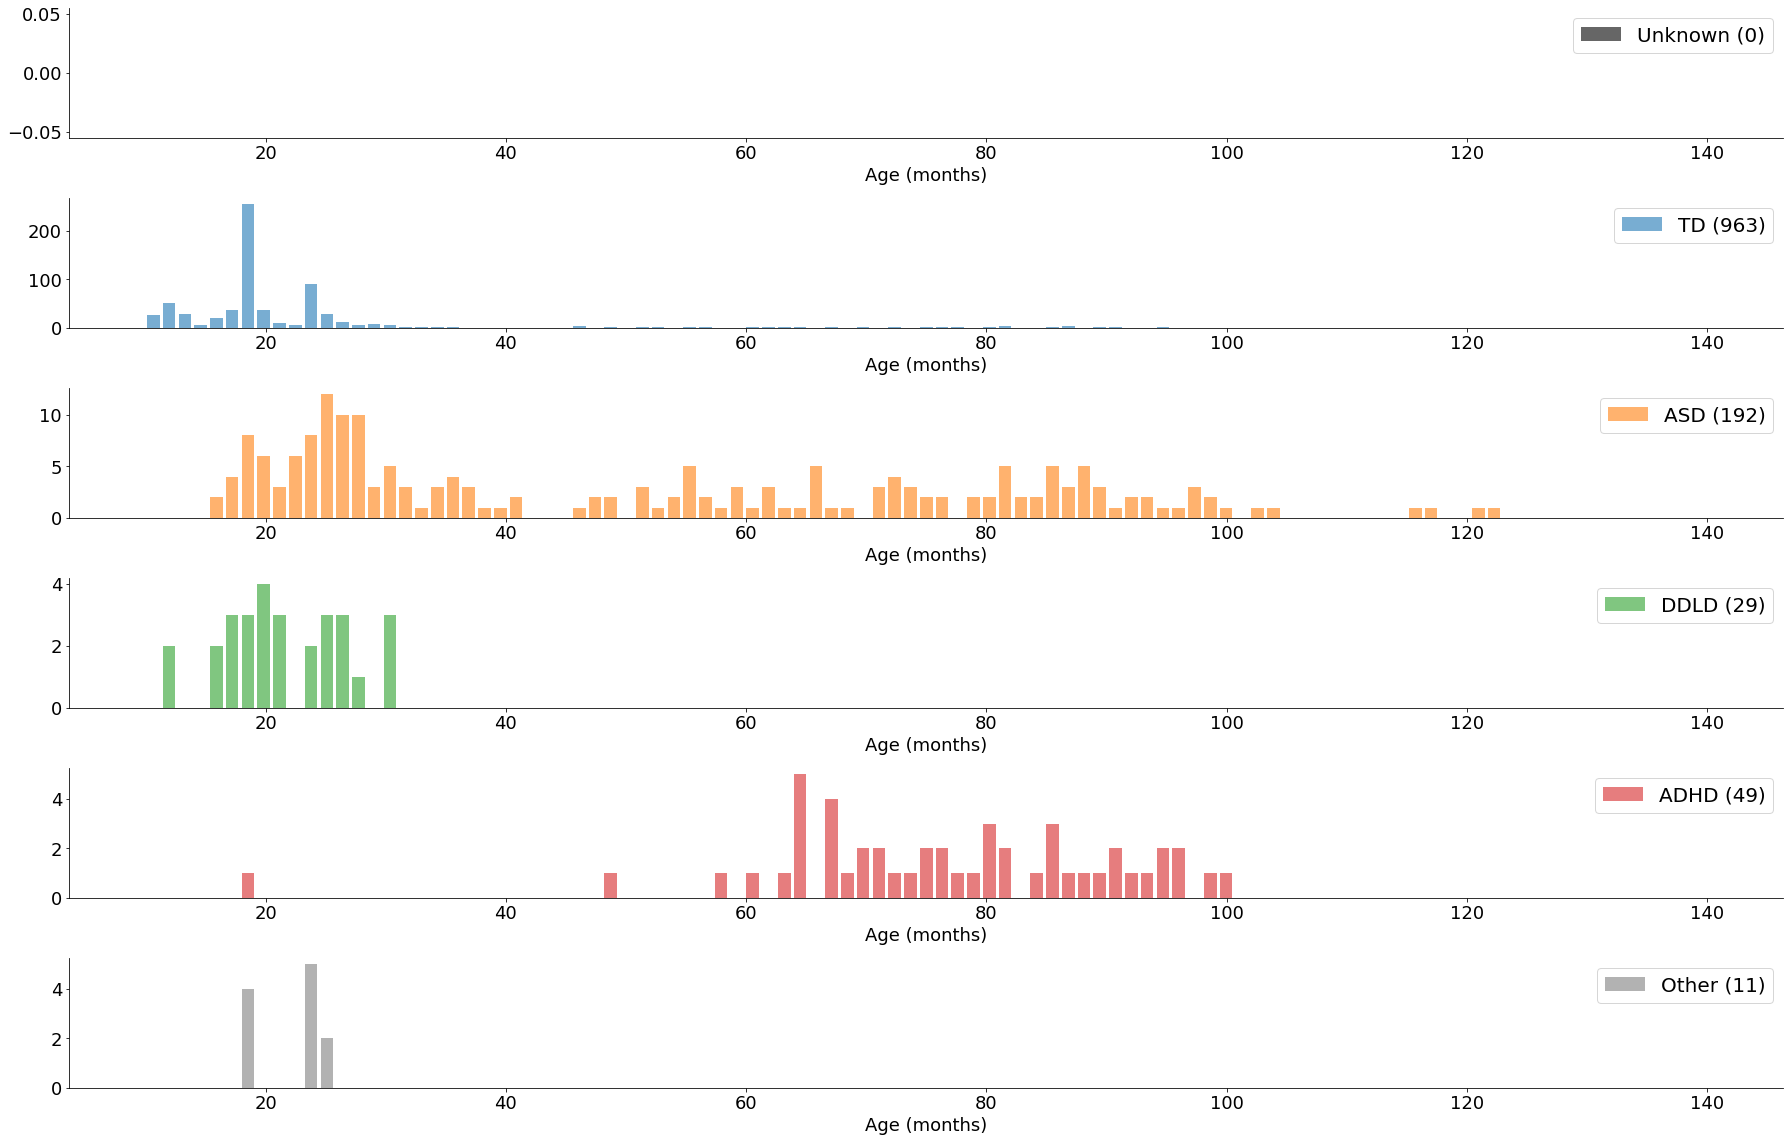

In [183]:
df=data.df
DIAG_DICT = {'TD':0., 
            'ASD':1., 
            'DDLD':2., 
            'ADHD':3., 
             'Other':4.,
            'Unknown':-1}
DIAG_DICT_REVERSE = {v: k for k, v in DIAG_DICT.items()}

colors = {'TD':'#1f77b4',
          'ASD': '#ff7f0e',
          'DDLD':'#2ca02c',
          'ADHD':'#d62728',
          'comorbid':'#9467bd',
          'Other':'gray',
          'Unknown': 'k'}
           
    
fig, axes = plt.subplots(6, 1, figsize=(25, 16)); axes=axes.flatten()

for i, (j, d) in enumerate(df.groupby('diagnosis')):
    for sex, dd in d.groupby('sex'):
        print("Diagnosis: {} - Sex: {} : {:.2f}".format(DIAG_DICT_REVERSE[j], sex, len(dd)/len(d)))
    
    axes[int(i)].hist(d['age'], bins=np.linspace(10, 140, 100), density=False, alpha=.6, rwidth=.8, color=colors[DIAG_DICT_REVERSE[j]], label="{} ({})".format(DIAG_DICT_REVERSE[j], len(d['age'].dropna())))
    axes[int(i)].legend(prop={'size':20}); axes[int(i)].set_title("", weight='bold', fontsize=13);axes[int(i)].set_xlabel("Age (months)", fontsize=18)
    axes[int(i)].tick_params(axis='both', which='major', labelsize=18); axes[int(i)].tick_params(axis='both', which='minor', labelsize=18)
    axes[int(i)].spines.right.set_visible(False)
    axes[int(i)].spines.top.set_visible(False)
plt.tight_layout()

Diagnosis: TD - Sex: 0.0 : 0.51
Diagnosis: TD - Sex: 1.0 : 0.49
Diagnosis: ASD - Sex: 0.0 : 0.76
Diagnosis: ASD - Sex: 1.0 : 0.24
Diagnosis: DDLD - Sex: 0.0 : 0.80
Diagnosis: DDLD - Sex: 1.0 : 0.20
Diagnosis: ADHD - Sex: 1.0 : 1.00
Diagnosis: Other - Sex: 0.0 : 0.67
Diagnosis: Other - Sex: 1.0 : 0.33


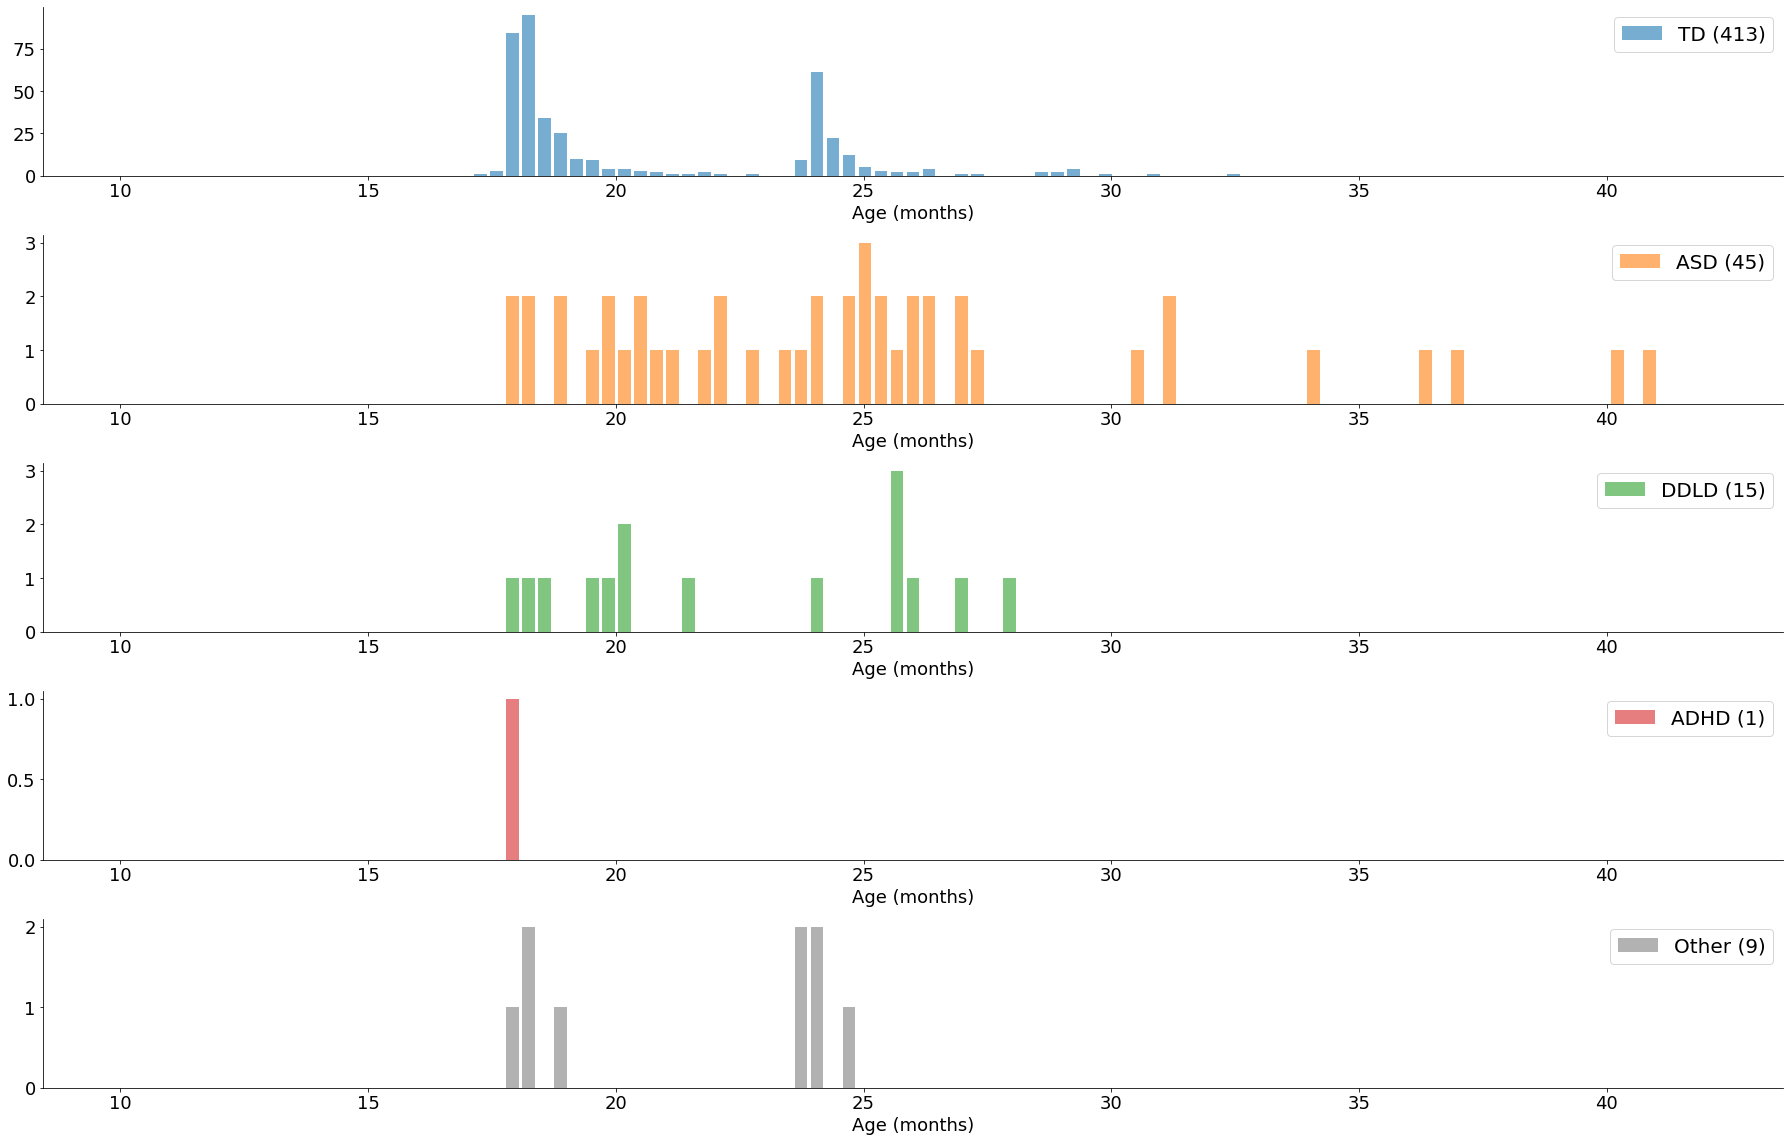

In [193]:
df=deepcopy(data.df[(data.df['age'] >=17) & (data.df['age'] <=42) & (data.df['study'].isin(['ARC', 'P1', 'P2', 'P3']))])
               
fig, axes = plt.subplots(5, 1, figsize=(25, 16)); axes=axes.flatten()
for i, (j, d) in enumerate(df.groupby('diagnosis')):
    for sex, dd in d.groupby('sex'):
        print("Diagnosis: {} - Sex: {} : {:.2f}".format(DIAG_DICT_REVERSE[j], sex, len(dd)/len(d)))
    axes[int(i)].hist(d['age'], bins=np.linspace(10, 42, 100), density=False, alpha=.6, rwidth=.8, color=colors[DIAG_DICT_REVERSE[j]], label="{} ({})".format(DIAG_DICT_REVERSE[j], len(d['age'].dropna())))
    axes[int(i)].legend(prop={'size':20}); axes[int(i)].set_title("", weight='bold', fontsize=13);axes[int(i)].set_xlabel("Age (months)", fontsize=18)
    axes[int(i)].tick_params(axis='both', which='major', labelsize=18); axes[int(i)].tick_params(axis='both', which='minor', labelsize=18)
    axes[int(i)].spines.right.set_visible(False)
    axes[int(i)].spines.top.set_visible(False)
plt.tight_layout()

Diagnosis: TD - Sex: 0.0 : 0.51
Diagnosis: TD - Sex: 1.0 : 0.49
Diagnosis: ASD - Sex: 0.0 : 0.76
Diagnosis: ASD - Sex: 1.0 : 0.24
Diagnosis: DDLD - Sex: 0.0 : 0.80
Diagnosis: DDLD - Sex: 1.0 : 0.20
Diagnosis: ADHD - Sex: 1.0 : 1.00
Diagnosis: Other - Sex: 0.0 : 0.70
Diagnosis: Other - Sex: 1.0 : 0.30


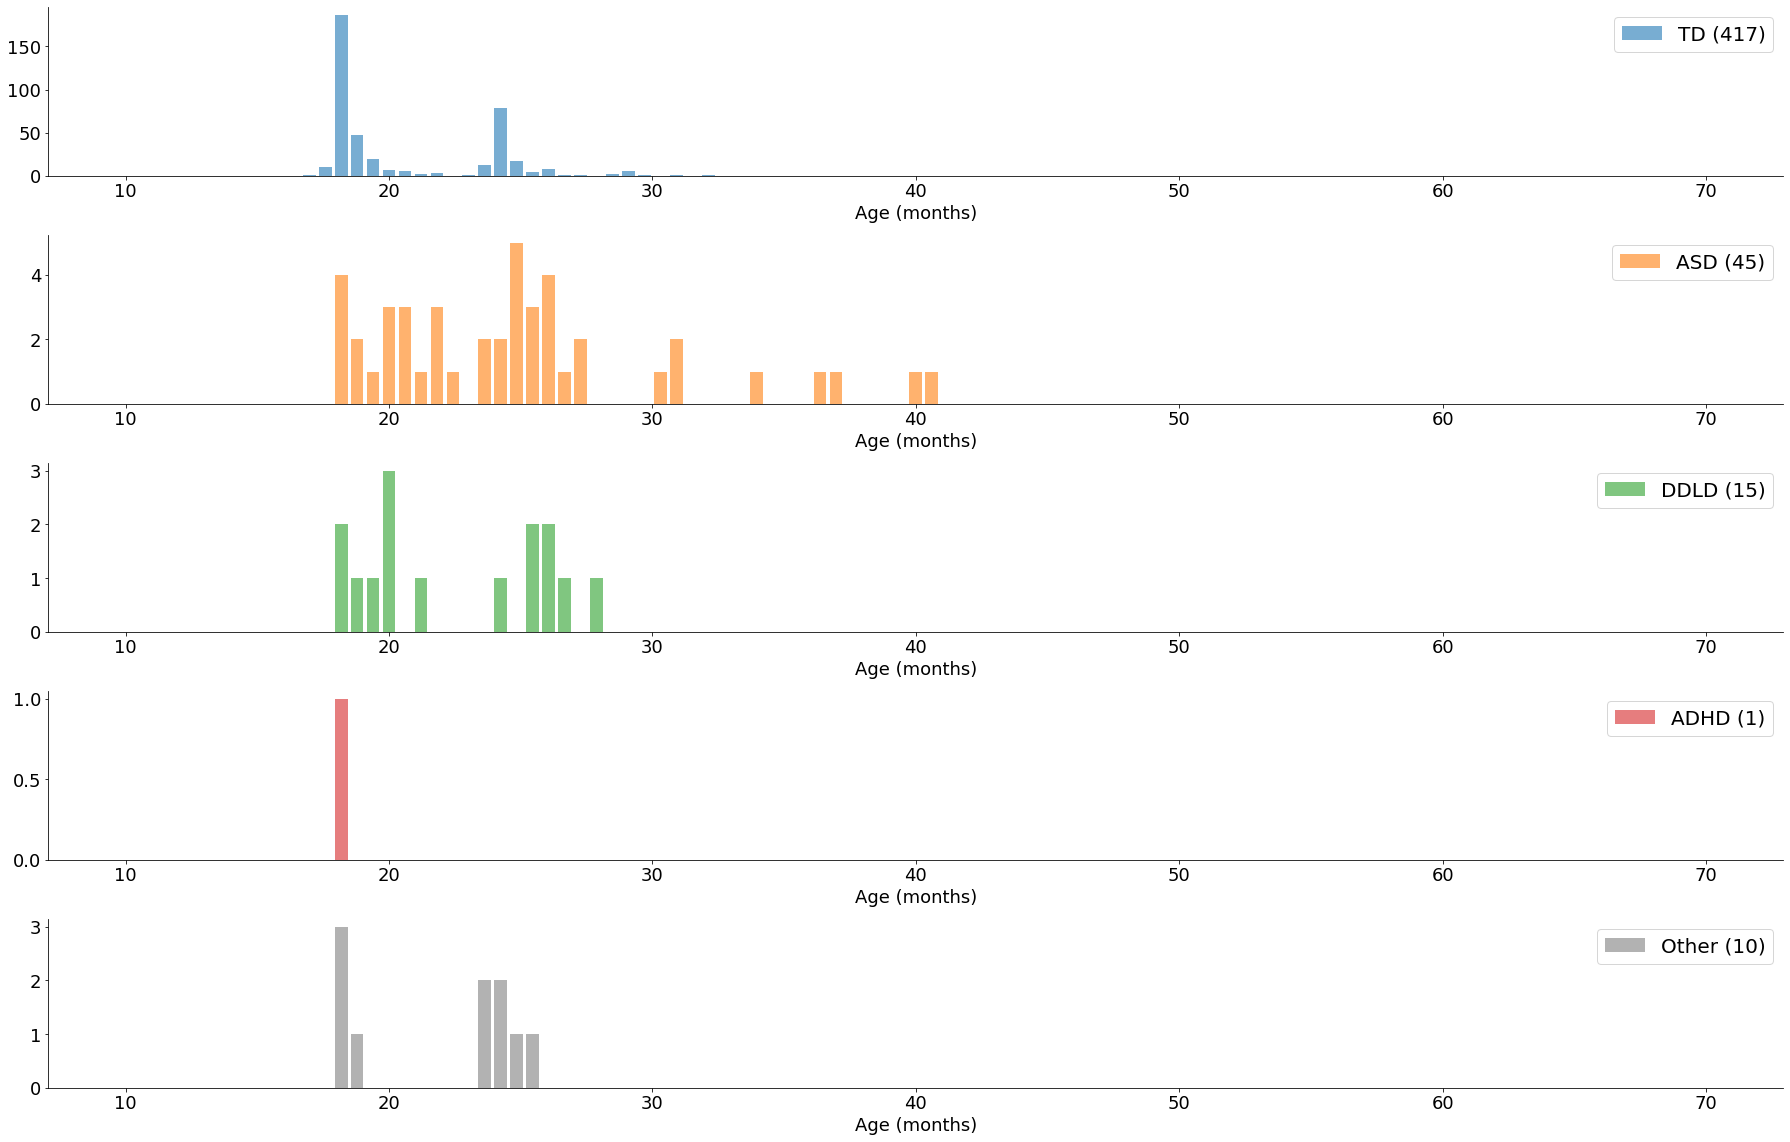

In [187]:

DIAG_DICT = {'TD':0., 
            'ASD':1., 
            'DDLD':2., 
            'ADHD':3., 
             'Other':4.,
            'Unknown':-1}
DIAG_DICT_REVERSE = {v: k for k, v in DIAG_DICT.items()}

colors = {'TD':'#1f77b4',
          'ASD': '#ff7f0e',
          'DDLD':'#2ca02c',
          'ADHD':'#d62728',
          'comorbid':'#9467bd',
          'Other':'gray',
          'Unknown': 'k'}
df=deepcopy(data.df[(data.df['age'] <=70) & (data.df['study'].isin(['ARC', 'P1', 'P2', 'P3']))])

               
fig, axes = plt.subplots(5, 1, figsize=(25, 16)); axes=axes.flatten()
for i, (j, d) in enumerate(df.groupby('diagnosis')):
    for sex, dd in d.groupby('sex'):
        print("Diagnosis: {} - Sex: {} : {:.2f}".format(DIAG_DICT_REVERSE[j], sex, len(dd)/len(d)))
    axes[int(i)].hist(d['age'], bins=np.linspace(10, 70, 100), density=False, alpha=.6, rwidth=.8, color=colors[DIAG_DICT_REVERSE[j]], label="{} ({})".format(DIAG_DICT_REVERSE[j], len(d['age'].dropna())))
    axes[int(i)].legend(prop={'size':20}); axes[int(i)].set_title("", weight='bold', fontsize=13);axes[int(i)].set_xlabel("Age (months)", fontsize=18)
    axes[int(i)].tick_params(axis='both', which='major', labelsize=18); axes[int(i)].tick_params(axis='both', which='minor', labelsize=18)
    axes[int(i)].spines.right.set_visible(False)
    axes[int(i)].spines.top.set_visible(False)
plt.tight_layout()

# Dataset Illustration

In [33]:
df = pd.read_csv(AUTISM_DATA_PATH)
# Data definition
data = Dataset(df=df, 
               missing_data_handling='encoding',
               imputation_method='without',
               sampling_method='without',
               scenario = None, 
               features_name = DEFAULT_PREDICTORS,
               scale_data=True, 
               use_missing_indicator_variables=False,
               verbosity=4, 
               proportion_train=1)

data.filter(administration={'order': 'first'})
data.df.loc[data.df['study'].isin(['SAESDM', 'IMPACT', 'P3R']), 'diagnosis'] = 1


Post-processing inital df (removing columns with no cva features, encoding srings, compute administrations order, compute condensed S/NS variables)... 
Predicting diagnosis based on 29 features
Splitting dataset into test and train set.
Encoding 2897 (train) and 0 (test) missing values with -5.


In [156]:
print('Diagnosis count') 
display(display(data.df.groupby('diagnosis')[['id']].count()))

print('Count per study') 
display(data.df.groupby('study').count())

print('Missing age count per study') 
display(data.df[data.df['age'].isna()].groupby('study').count())


Diagnosis count


id
diagnosis     
-1.0       149
 0.0       960
 1.0       337
 2.0        29
 3.0        49
 4.0        11

None

Count per study


id  diagnosis  language  app_version  subject  administration  features_extracted  face_tracking  age  date  path  sex  ethnicity  race  primary_education  mullen_el  mullen_fm  mullen_rl  mullen_vr  mullen_elc_std  ados_total  ados_rrb  ados_sa  srs_total_tscore  srs_social_awareness_tscore  srs_social_motivation_tscore  cbcl_scaleIV_score  cbcl_asd_score  mchat_total  mchat_final  mchat_result  BB_gaze_percent_right  BB_gaze_silhouette_score  S_gaze_percent_right  S_gaze_silhouette_score  FP_gaze_speech_correlation  FP_gaze_silhouette_score  proportion_of_name_call_responses  average_response_to_name_delay  name_call_response_binary  FB_postural_sway  FB_postural_sway_derivative  DIGC_postural_sway  DIGC_postural_sway_derivative  DIGRRL_postural_sway  DIGRRL_postural_sway_derivative  ST_postural_sway  ST_postural_sway_derivative  MP_postural_sway  MP_postural_sway_derivative  ...  MML_postural_sway_derivative  PWB_postural_sway  PWB_postural_sway_derivative  \
study                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         ...                                                                                  
ARC                48         48        48           48       48              48                  48             48   48    48    48   48         48    40                 48         48         48         48         48              48          48        48       48                31                           31                            31                  42              42           47           47            47                     44                        44                    46                       46                          45                        44                                 48                              37                         46                47                           47                  48                             48                    47                               47                46                           46                46                           46  ...                            45                 45                            45   
IMPACT            121        121       121          121      121             121                 121            121    0   121   121    0          0     0                  0          0          0          0          0               0           0         0        0                 0                            0                             0                   0               0            0            0             0                    119                       119                   118                      117                         121                       121                                118                              69                        109               118                          118                 118                            118                   120                              120               118                          118               121                          121  ...                           119                120                           120   
P1                437        437   

Missing age count per study


id  diagnosis  language  app_version  subject  administration  features_extracted  face_tracking  age  date  path  sex  ethnicity  race  primary_education  mullen_el  mullen_fm  mullen_rl  mullen_vr  mullen_elc_std  ados_total  ados_rrb  ados_sa  srs_total_tscore  srs_social_awareness_tscore  srs_social_motivation_tscore  cbcl_scaleIV_score  cbcl_asd_score  mchat_total  mchat_final  mchat_result  BB_gaze_percent_right  BB_gaze_silhouette_score  S_gaze_percent_right  S_gaze_silhouette_score  FP_gaze_speech_correlation  FP_gaze_silhouette_score  proportion_of_name_call_responses  average_response_to_name_delay  name_call_response_binary  FB_postural_sway  FB_postural_sway_derivative  DIGC_postural_sway  DIGC_postural_sway_derivative  DIGRRL_postural_sway  DIGRRL_postural_sway_derivative  ST_postural_sway  ST_postural_sway_derivative  MP_postural_sway  MP_postural_sway_derivative  ...  MML_postural_sway_derivative  PWB_postural_sway  PWB_postural_sway_derivative  \
study                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         ...                                                                                  
IMPACT            121        121       121          121      121             121                 121            121    0   121   121    0          0     0                  0          0          0          0          0               0           0         0        0                 0                            0                             0                   0               0            0            0             0                    119                       119                   118                      117                         121                       121                                118                              69                        109               118                          118                 118                            118                   120                              120               118                          118               121                          121  ...                           119                120                           120   
P1R                22         22        22           22       22              22                  22             22    0    22    22    0          0     0                  0          0          0          0          0               0           0         0        0                 0                            0                             0                   0               0            0            0             0                     15                        14                    17                       17                          12                        11                                 17                               6                         17                18                           18                  17                             17                    16                               16                17                           17                16                           16  ...                            14                  8                             8   
P3R                 5          5   

Diagnosis: TD - Sex: 0.0 : 0.53
Diagnosis: TD - Sex: 1.0 : 0.47
Diagnosis: ASD - Sex: 0.0 : 0.40
Diagnosis: ASD - Sex: 1.0 : 0.17
Diagnosis: DDLD - Sex: 0.0 : 0.72
Diagnosis: DDLD - Sex: 1.0 : 0.28
Diagnosis: ADHD - Sex: 0.0 : 0.78
Diagnosis: ADHD - Sex: 1.0 : 0.22
Diagnosis: Other - Sex: 0.0 : 0.73
Diagnosis: Other - Sex: 1.0 : 0.27


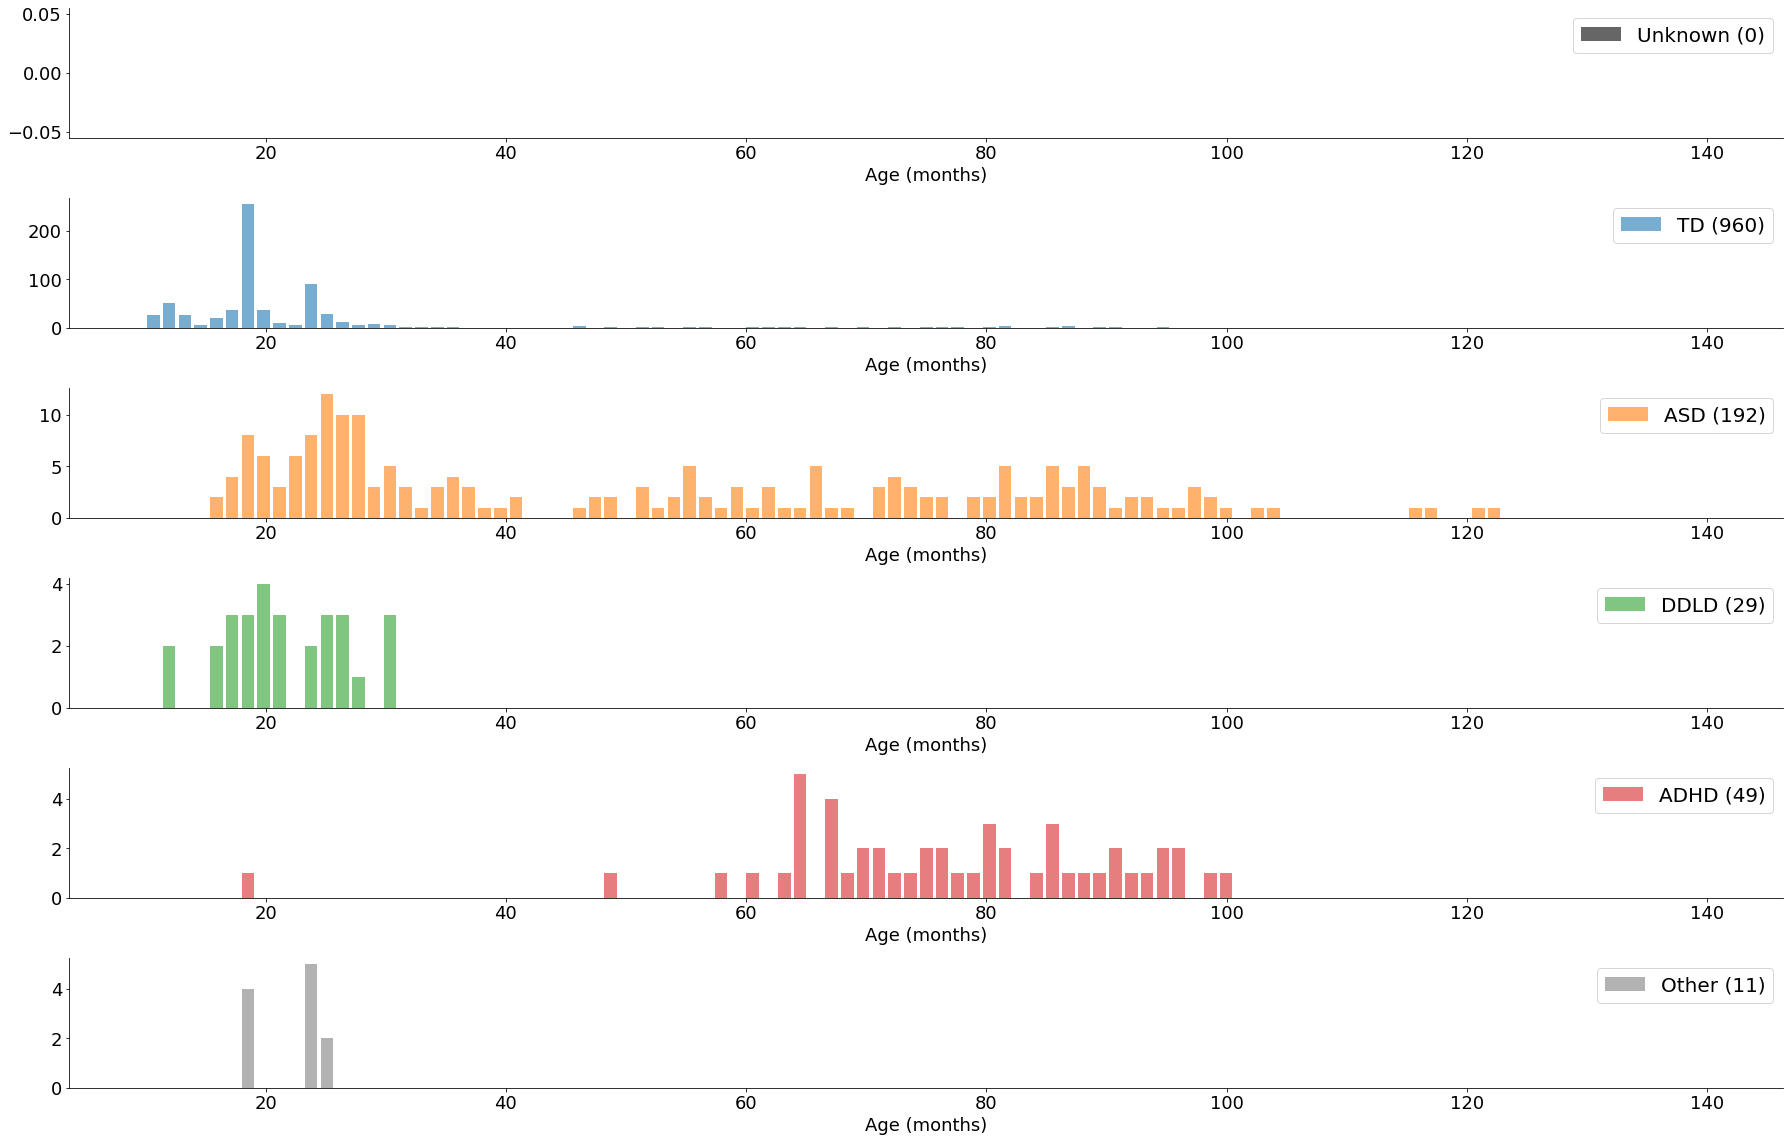

In [158]:
df=data.df
DIAG_DICT = {'TD':0., 
            'ASD':1., 
            'DDLD':2., 
            'ADHD':3., 
             'Other':4.,
            'Unknown':-1}
DIAG_DICT_REVERSE = {v: k for k, v in DIAG_DICT.items()}

colors = {'TD':'#1f77b4',
          'ASD': '#ff7f0e',
          'DDLD':'#2ca02c',
          'ADHD':'#d62728',
          'comorbid':'#9467bd',
          'Other':'gray',
          'Unknown': 'k'}
           
    
fig, axes = plt.subplots(6, 1, figsize=(25, 16)); axes=axes.flatten()

for i, (j, d) in enumerate(df.groupby('diagnosis')):
    for sex, dd in d.groupby('sex'):
        print("Diagnosis: {} - Sex: {} : {:.2f}".format(DIAG_DICT_REVERSE[j], sex, len(dd)/len(d)))
    
    axes[int(i)].hist(d['age'], bins=np.linspace(10, 140, 100), density=False, alpha=.6, rwidth=.8, color=colors[DIAG_DICT_REVERSE[j]], label="{} ({})".format(DIAG_DICT_REVERSE[j], len(d['age'].dropna())))
    axes[int(i)].legend(prop={'size':20}); axes[int(i)].set_title("", weight='bold', fontsize=13);axes[int(i)].set_xlabel("Age (months)", fontsize=18)
    axes[int(i)].tick_params(axis='both', which='major', labelsize=18); axes[int(i)].tick_params(axis='both', which='minor', labelsize=18)
    axes[int(i)].spines.right.set_visible(False)
    axes[int(i)].spines.top.set_visible(False)
plt.tight_layout()

Diagnosis: TD - Sex: 0.0 : 0.52
Diagnosis: TD - Sex: 1.0 : 0.48
Diagnosis: ASD - Sex: 0.0 : 0.73
Diagnosis: ASD - Sex: 1.0 : 0.27
Diagnosis: DDLD - Sex: 0.0 : 0.72
Diagnosis: DDLD - Sex: 1.0 : 0.28
Diagnosis: ADHD - Sex: 1.0 : 1.00
Diagnosis: Other - Sex: 0.0 : 0.73
Diagnosis: Other - Sex: 1.0 : 0.27


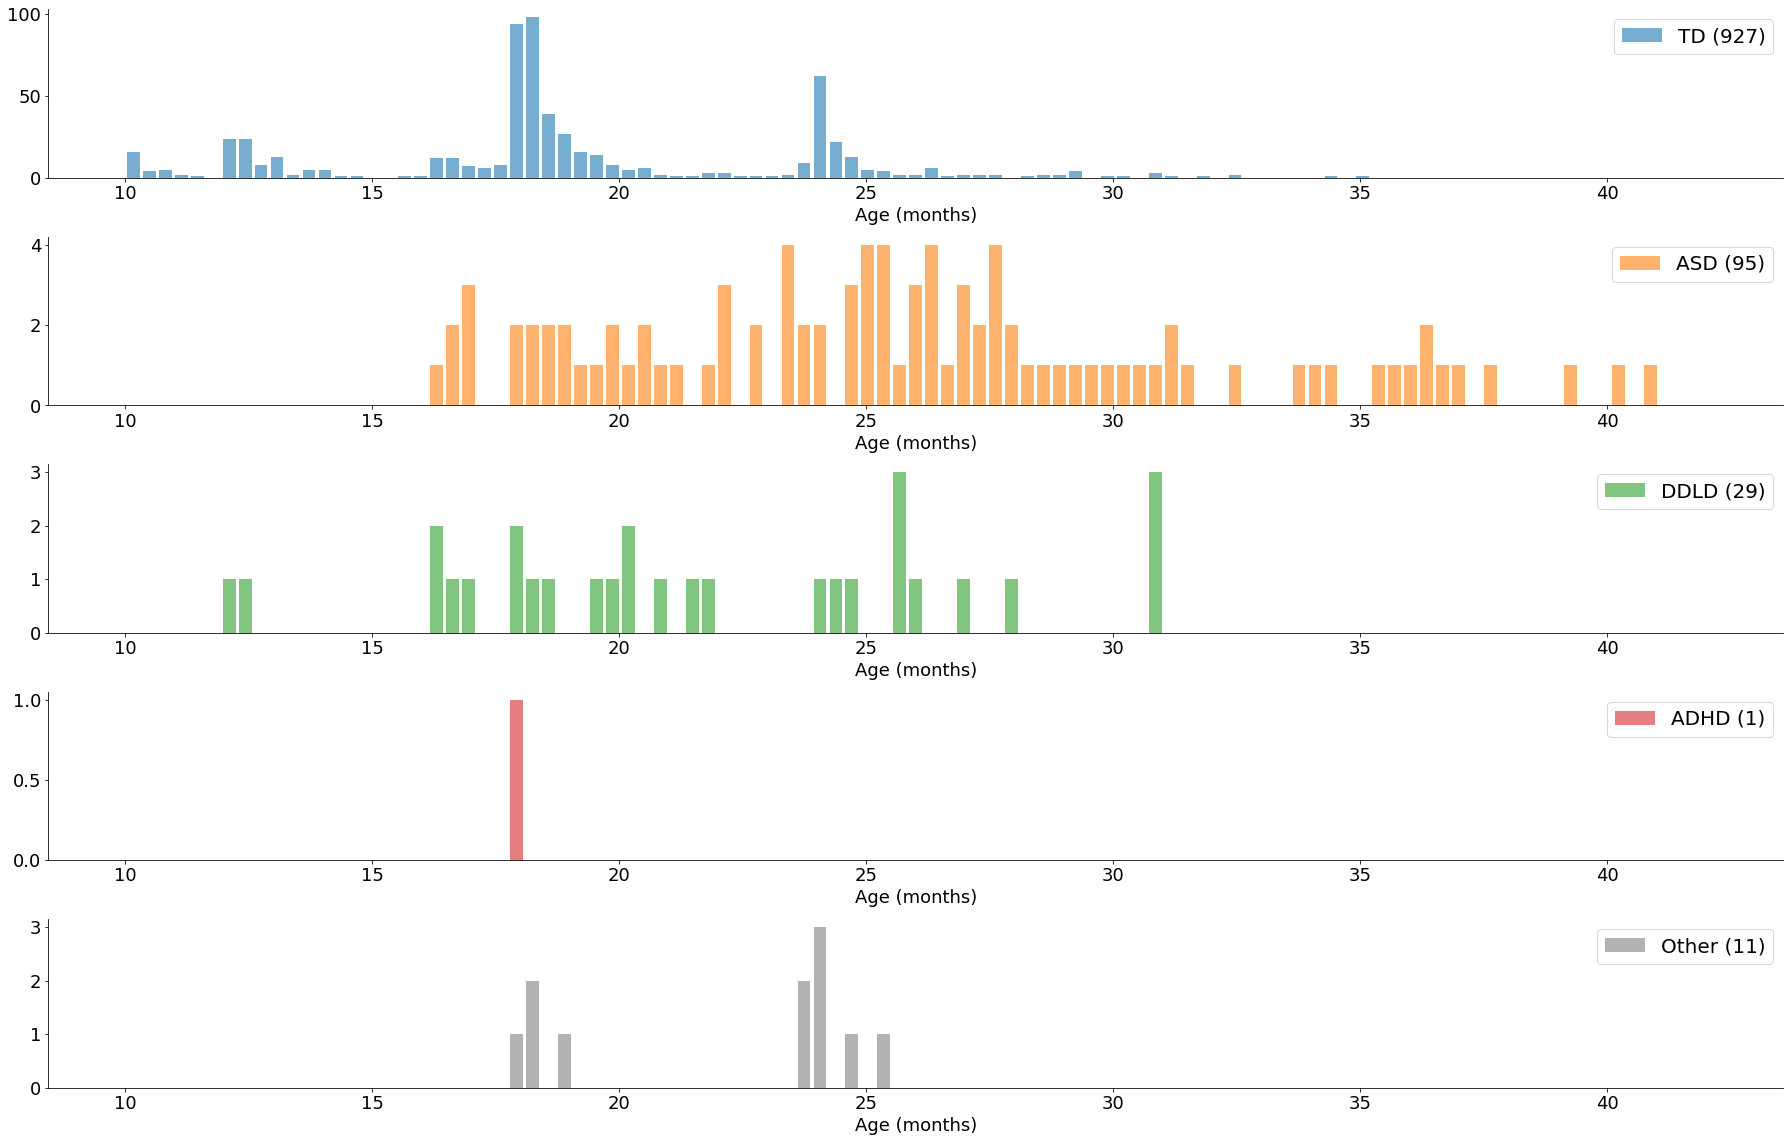

In [159]:
df=deepcopy(data.df[data.df['age'] <=42])
               
fig, axes = plt.subplots(5, 1, figsize=(25, 16)); axes=axes.flatten()
for i, (j, d) in enumerate(df.groupby('diagnosis')):
    for sex, dd in d.groupby('sex'):
        print("Diagnosis: {} - Sex: {} : {:.2f}".format(DIAG_DICT_REVERSE[j], sex, len(dd)/len(d)))
    axes[int(i)].hist(d['age'], bins=np.linspace(10, 42, 100), density=False, alpha=.6, rwidth=.8, color=colors[DIAG_DICT_REVERSE[j]], label="{} ({})".format(DIAG_DICT_REVERSE[j], len(d['age'].dropna())))
    axes[int(i)].legend(prop={'size':20}); axes[int(i)].set_title("", weight='bold', fontsize=13);axes[int(i)].set_xlabel("Age (months)", fontsize=18)
    axes[int(i)].tick_params(axis='both', which='major', labelsize=18); axes[int(i)].tick_params(axis='both', which='minor', labelsize=18)
    axes[int(i)].spines.right.set_visible(False)
    axes[int(i)].spines.top.set_visible(False)
plt.tight_layout()

Diagnosis: TD - Sex: 0.0 : 0.51
Diagnosis: TD - Sex: 1.0 : 0.49
Diagnosis: ASD - Sex: 0.0 : 0.76
Diagnosis: ASD - Sex: 1.0 : 0.24
Diagnosis: DDLD - Sex: 0.0 : 0.80
Diagnosis: DDLD - Sex: 1.0 : 0.20
Diagnosis: ADHD - Sex: 1.0 : 1.00
Diagnosis: Other - Sex: 0.0 : 0.70
Diagnosis: Other - Sex: 1.0 : 0.30


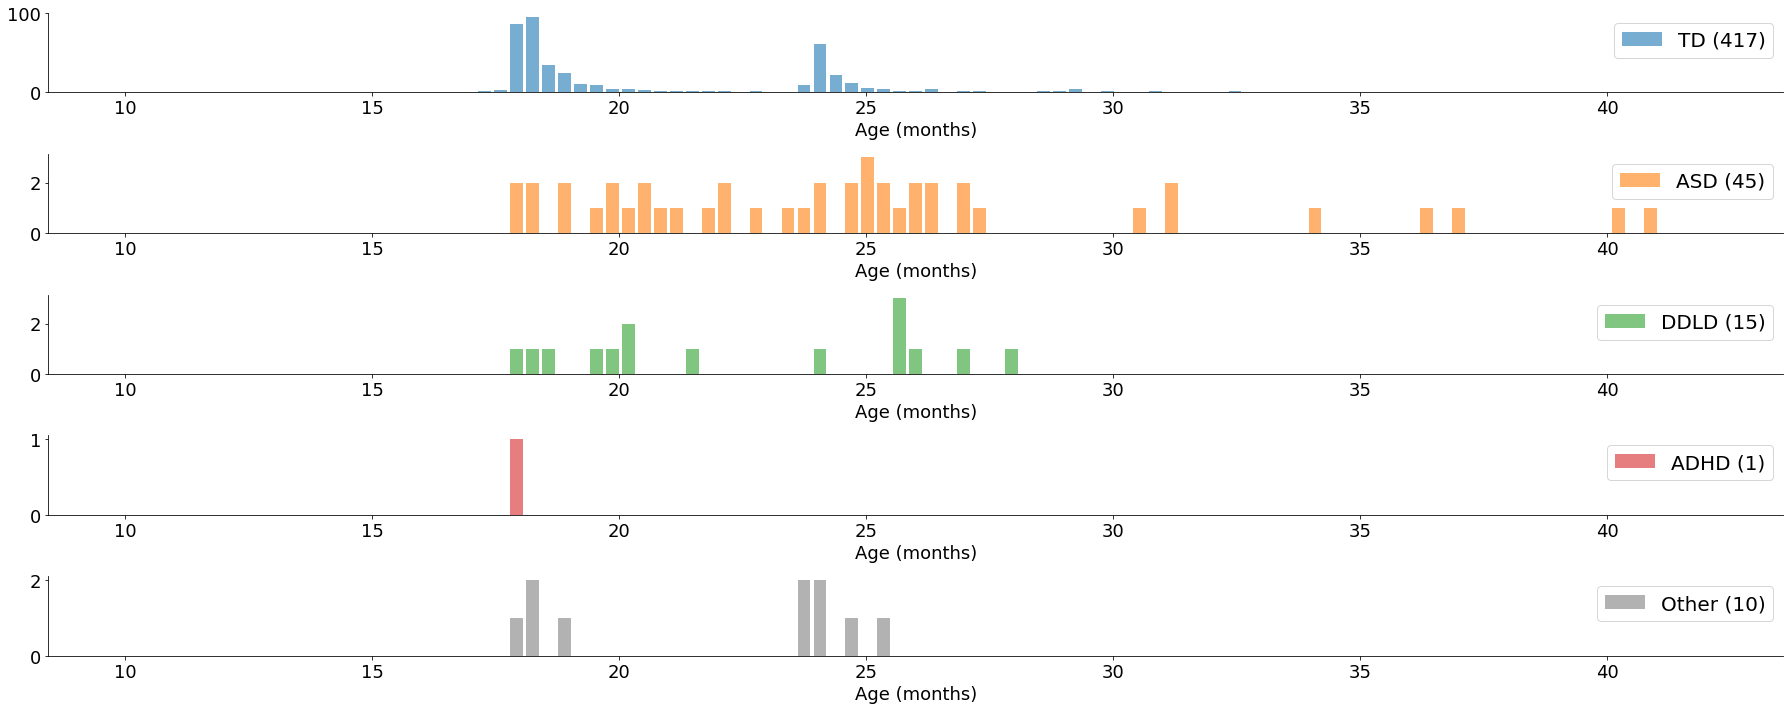

In [175]:
df=deepcopy(data.df[(data.df['age'] <=42) & (data.df['study'].isin([ 'P2', 'P1', 'ARC', 'P3',  'IMPACT', 'S2KP', 'SAESDM']))])
    
fig, axes = plt.subplots(5, 1, figsize=(25, 10)); axes=axes.flatten()

for i, (j, d) in enumerate(df.groupby('diagnosis')):
    for sex, dd in d.groupby('sex'):
        print("Diagnosis: {} - Sex: {} : {:.2f}".format(DIAG_DICT_REVERSE[j], sex, len(dd)/len(d)))
    
    axes[int(i)].hist(d['age'], bins=np.linspace(10, 42, 100), density=False, alpha=.6, rwidth=.8, color=colors[DIAG_DICT_REVERSE[j]], label="{} ({})".format(DIAG_DICT_REVERSE[j], len(d['age'].dropna())))
    axes[int(i)].legend(prop={'size':20}); axes[int(i)].set_title("", weight='bold', fontsize=13);axes[int(i)].set_xlabel("Age (months)", fontsize=18)
    axes[int(i)].tick_params(axis='both', which='major', labelsize=18); axes[int(i)].tick_params(axis='both', which='minor', labelsize=18)
    axes[int(i)].spines.right.set_visible(False)
    axes[int(i)].spines.top.set_visible(False)
plt.tight_layout()

Diagnosis: TD - Sex: 0.0 : 0.51
Diagnosis: TD - Sex: 1.0 : 0.49
Diagnosis: ASD - Sex: 0.0 : 0.76
Diagnosis: ASD - Sex: 1.0 : 0.24
Diagnosis: DDLD - Sex: 0.0 : 0.80
Diagnosis: DDLD - Sex: 1.0 : 0.20
Diagnosis: ADHD - Sex: 1.0 : 1.00
Diagnosis: Other - Sex: 0.0 : 0.70
Diagnosis: Other - Sex: 1.0 : 0.30


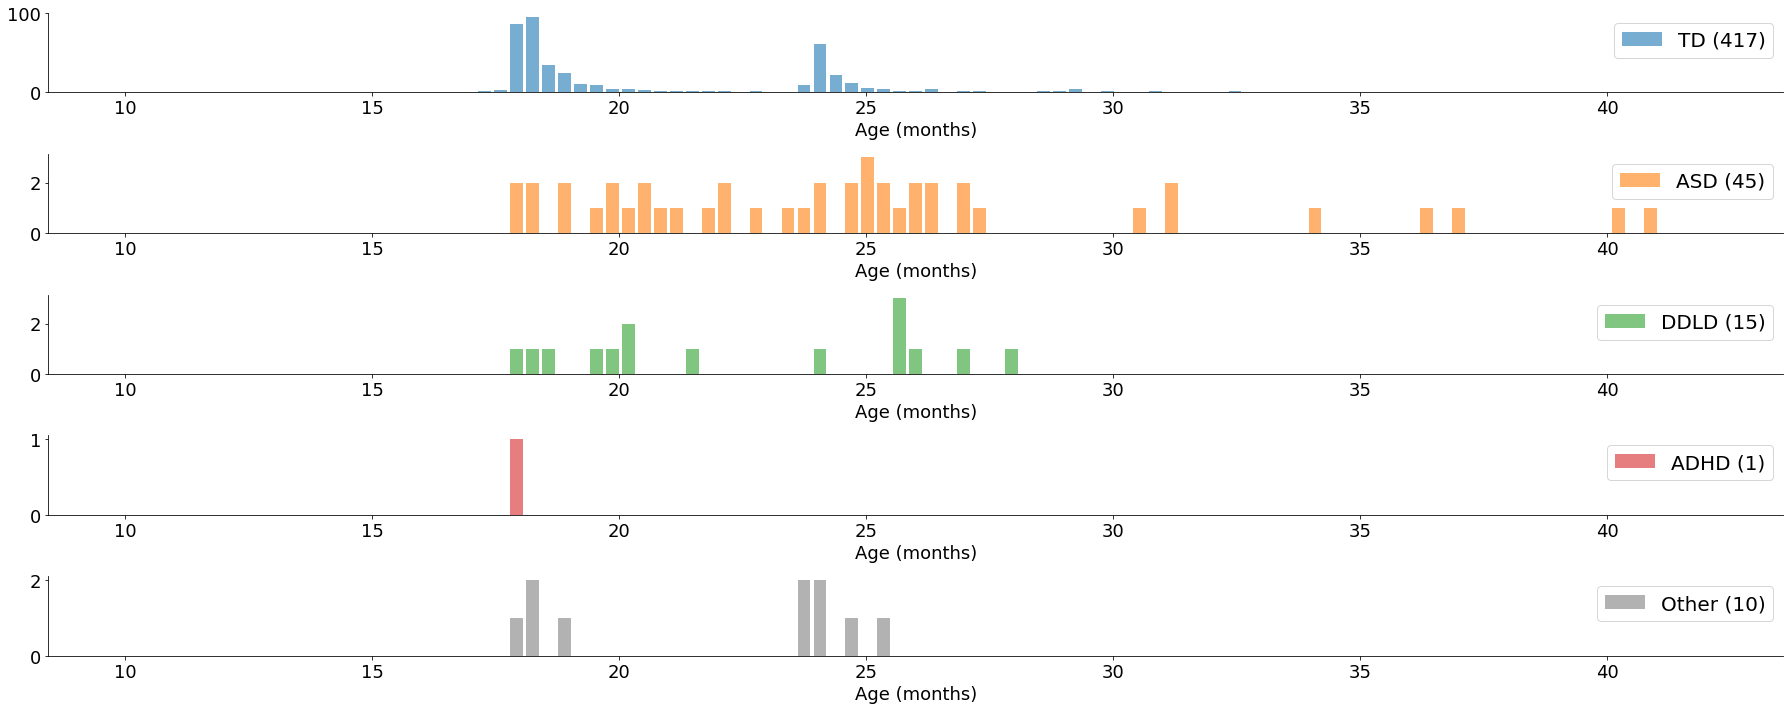

In [161]:
df=deepcopy(data.df[(data.df['age'] <=42) & (data.df['study'].isin([ 'P2', 'P1', 'ARC', 'P3',  'IMPACT', 'S2KP', 'SAESDM']))])
    
fig, axes = plt.subplots(5, 1, figsize=(25, 10)); axes=axes.flatten()

for i, (j, d) in enumerate(df.groupby('diagnosis')):
    for sex, dd in d.groupby('sex'):
        print("Diagnosis: {} - Sex: {} : {:.2f}".format(DIAG_DICT_REVERSE[j], sex, len(dd)/len(d)))
    
    axes[int(i)].hist(d['age'], bins=np.linspace(10, 42, 100), density=False, alpha=.6, rwidth=.8, color=colors[DIAG_DICT_REVERSE[j]], label="{} ({})".format(DIAG_DICT_REVERSE[j], len(d['age'].dropna())))
    axes[int(i)].legend(prop={'size':20}); axes[int(i)].set_title("", weight='bold', fontsize=13);axes[int(i)].set_xlabel("Age (months)", fontsize=18)
    axes[int(i)].tick_params(axis='both', which='major', labelsize=18); axes[int(i)].tick_params(axis='both', which='minor', labelsize=18)
    axes[int(i)].spines.right.set_visible(False)
    axes[int(i)].spines.top.set_visible(False)
plt.tight_layout()

Diagnosis: TD - Sex: 0.0 : 0.54
Diagnosis: TD - Sex: 1.0 : 0.46
Diagnosis: ASD - Sex: 0.0 : 0.70
Diagnosis: ASD - Sex: 1.0 : 0.30
Diagnosis: DDLD - Sex: 0.0 : 0.64
Diagnosis: DDLD - Sex: 1.0 : 0.36
Diagnosis: Other - Sex: 0.0 : 1.00


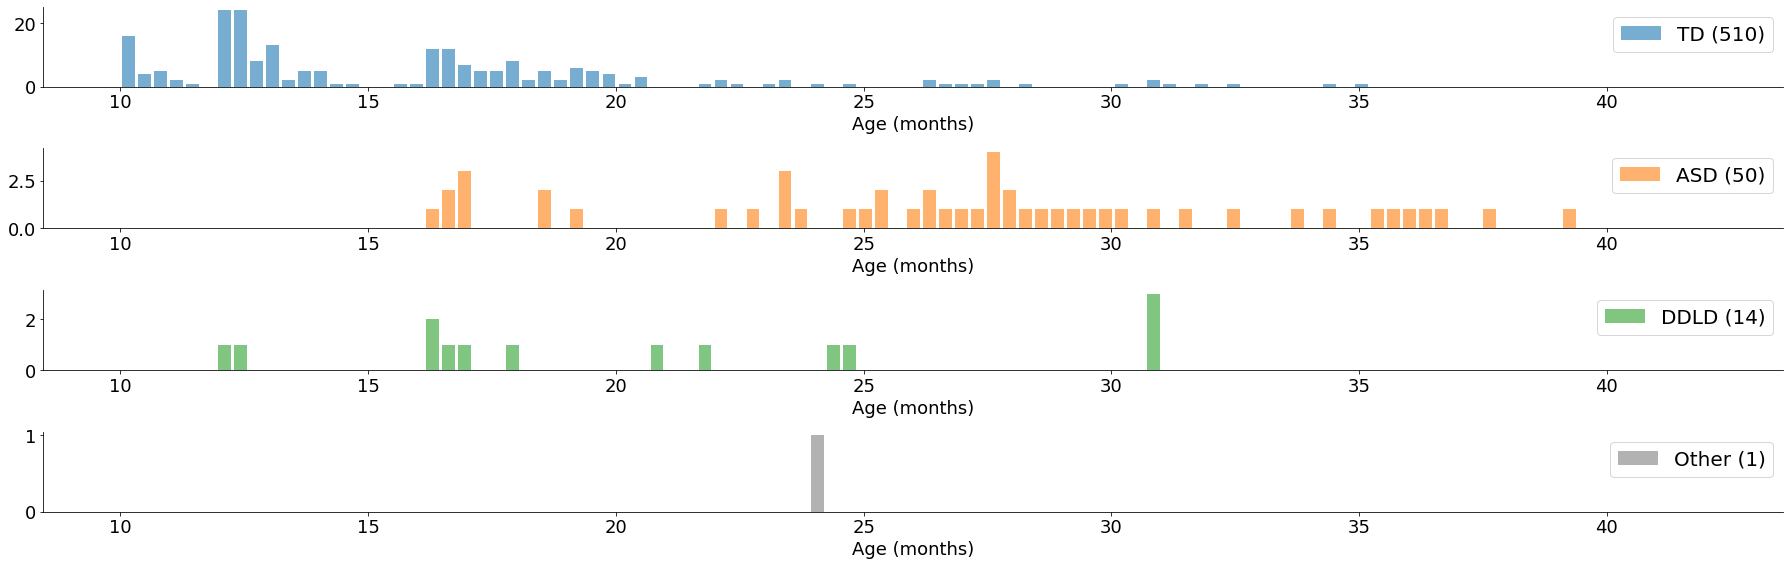

In [162]:
df=deepcopy(data.df[(data.df['age'] <=42) & (data.df['study'].isin(['SenseToKnowStudy','P1R','P3R']))])
    
fig, axes = plt.subplots(4, 1, figsize=(25, 8)); axes=axes.flatten()

for i, (j, d) in enumerate(df.groupby('diagnosis')):
    for sex, dd in d.groupby('sex'):
        print("Diagnosis: {} - Sex: {} : {:.2f}".format(DIAG_DICT_REVERSE[j], sex, len(dd)/len(d)))    
    axes[int(i)].hist(d['age'], bins=np.linspace(10, 42, 100), density=False, alpha=.6, rwidth=.8, color=colors[DIAG_DICT_REVERSE[j]], label="{} ({})".format(DIAG_DICT_REVERSE[j], len(d['age'].dropna())))
    axes[int(i)].legend(prop={'size':20}); axes[int(i)].set_title("", weight='bold', fontsize=13);axes[int(i)].set_xlabel("Age (months)", fontsize=18)
    axes[int(i)].tick_params(axis='both', which='major', labelsize=18); axes[int(i)].tick_params(axis='both', which='minor', labelsize=18)
    axes[int(i)].spines.right.set_visible(False)
    axes[int(i)].spines.top.set_visible(False)
plt.tight_layout()

Diagnosis: TD - Sex: 0.0 : 0.70
Diagnosis: TD - Sex: 1.0 : 0.30
Diagnosis: ASD - Sex: 0.0 : 0.69
Diagnosis: ASD - Sex: 1.0 : 0.31
Diagnosis: ADHD - Sex: 0.0 : 0.79
Diagnosis: ADHD - Sex: 1.0 : 0.21


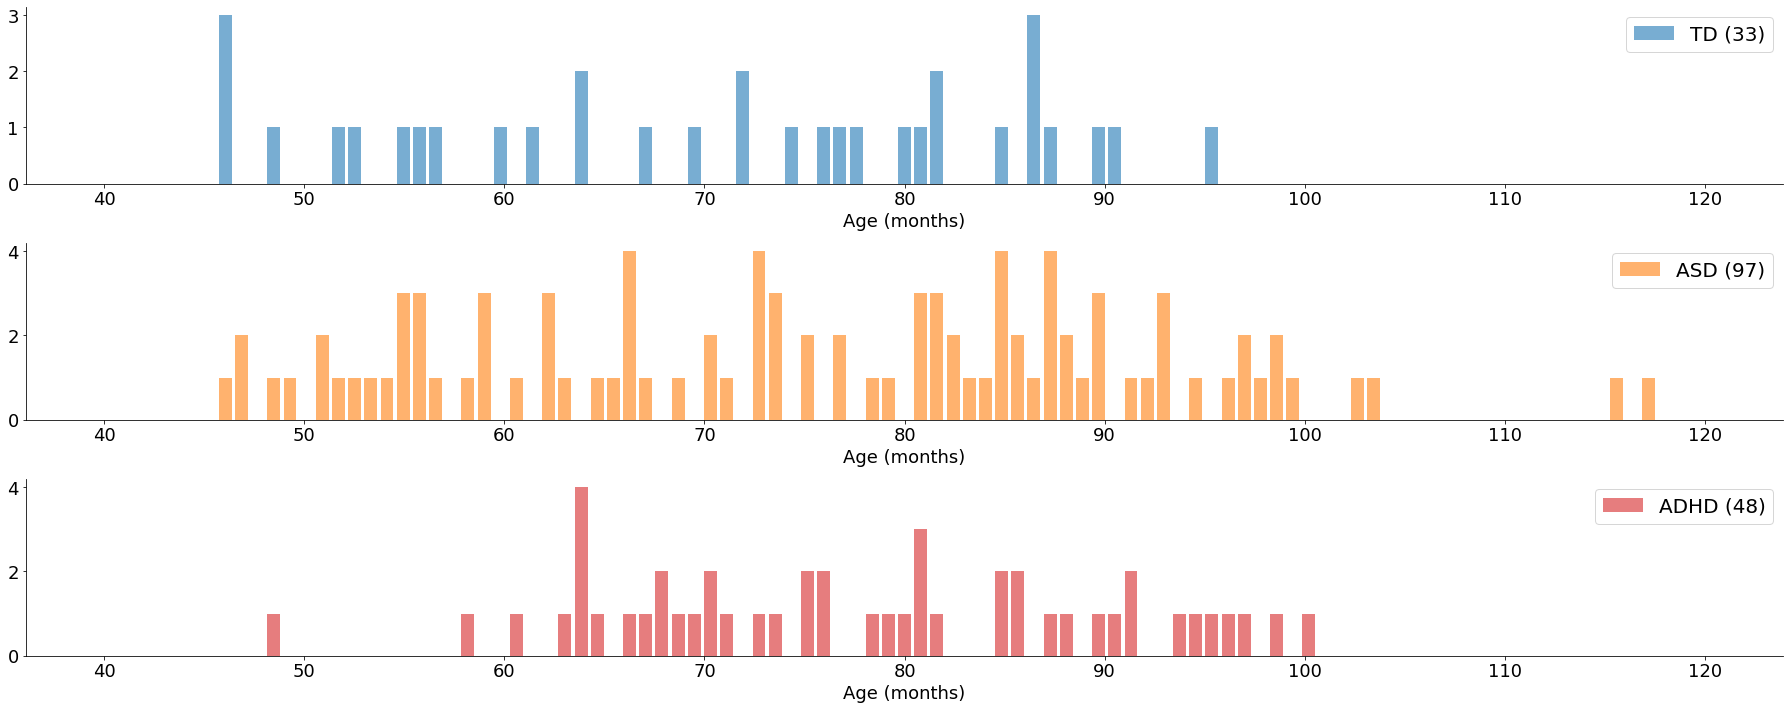

In [163]:
df=deepcopy(data.df[(data.df['age'] >42)])
    
fig, axes = plt.subplots(3, 1, figsize=(25, 10)); axes=axes.flatten()

for i, (j, d) in enumerate(df.groupby('diagnosis')):
    for sex, dd in d.groupby('sex'):
        print("Diagnosis: {} - Sex: {} : {:.2f}".format(DIAG_DICT_REVERSE[j], sex, len(dd)/len(d)))  
    
    axes[int(i)].hist(d['age'], bins=np.linspace(40, 120, 100), density=False, alpha=.6, rwidth=.8, color=colors[DIAG_DICT_REVERSE[j]], label="{} ({})".format(DIAG_DICT_REVERSE[j], len(d['age'].dropna())))
    axes[int(i)].legend(prop={'size':20}); axes[int(i)].set_title("", weight='bold', fontsize=13);axes[int(i)].set_xlabel("Age (months)", fontsize=18)
    axes[int(i)].tick_params(axis='both', which='major', labelsize=18); axes[int(i)].tick_params(axis='both', which='minor', labelsize=18)
    axes[int(i)].spines.right.set_visible(False)
    axes[int(i)].spines.top.set_visible(False)
plt.tight_layout()

In [167]:
df=deepcopy(data.df[(data.df['age'] <=42) & (data.df['study'].isin(['P2', 'P1', 'ARC', 'P3',  'IMPACT', 'S2KP', 'SAESDM']))]) 
df.groupby('diagnosis').count()

id  language  app_version  subject  administration  features_extracted  face_tracking  age  date  path  sex  ethnicity  race  primary_education  mullen_el  mullen_fm  mullen_rl  mullen_vr  mullen_elc_std  ados_total  ados_rrb  ados_sa  srs_total_tscore  srs_social_awareness_tscore  srs_social_motivation_tscore  cbcl_scaleIV_score  cbcl_asd_score  mchat_total  mchat_final  mchat_result  BB_gaze_percent_right  BB_gaze_silhouette_score  S_gaze_percent_right  S_gaze_silhouette_score  FP_gaze_speech_correlation  FP_gaze_silhouette_score  proportion_of_name_call_responses  average_response_to_name_delay  name_call_response_binary  FB_postural_sway  FB_postural_sway_derivative  DIGC_postural_sway  DIGC_postural_sway_derivative  DIGRRL_postural_sway  DIGRRL_postural_sway_derivative  ST_postural_sway  ST_postural_sway_derivative  MP_postural_sway  MP_postural_sway_derivative  PB_postural_sway  ...  PWB_postural_sway  PWB_postural_sway_derivative  FP_postural_sway  \
diagnosis                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     ...                                                                      
0.0        417       417          417      417             417                 417            417  417   417   417  417        417   402                415          3          3          3          3               3           3         3        3               226                          226                           226                 402             402          416          416           416                    395                       393                   396                      396                         392                       390                                414                             313                        402               415                          415                 409                            409                   409                              409               397                          397               397                          397                 0  ...                394                           394               391   
1.0         45        45           45       45              45                  45             45   45    45    45   45         45    40                 45         41         41         41         41              41          42        42       42                30                           30                            30                  40              40           41           41            41                     38                        38                    41                       41                          38                        37                                 44                              31                         43                44                           44                  44                             44                    42                               42                41                           41                40                           40                 0  ...                 38                            38                37   
2.0         15        15           15       15              15              

In [165]:
for diag, d in df.groupby('diagnosis'):
    for sex, dd in d.groupby('sex'):
        print("Diagnosis: {} - Sex: {} : {}".format(diag, sex, len(dd)))

Diagnosis: 0.0 - Sex: 0.0 : 210
Diagnosis: 0.0 - Sex: 1.0 : 206
Diagnosis: 1.0 - Sex: 0.0 : 32
Diagnosis: 1.0 - Sex: 1.0 : 11
Diagnosis: 2.0 - Sex: 0.0 : 12
Diagnosis: 2.0 - Sex: 1.0 : 3
Diagnosis: 3.0 - Sex: 1.0 : 1
Diagnosis: 4.0 - Sex: 0.0 : 7
Diagnosis: 4.0 - Sex: 1.0 : 3


In [215]:
n_asd = 43
n_td = 416

print(32/43)
print(210/416)

0.7441860465116279
0.5048076923076923


In [217]:
43/459

0.09368191721132897

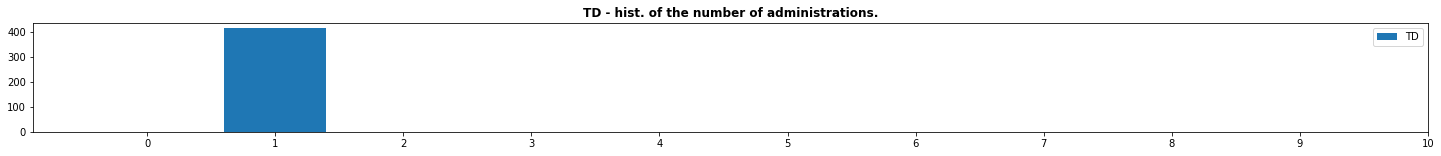

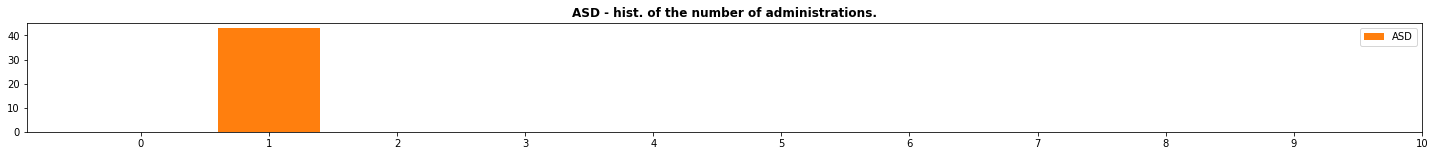

In [ ]:
for i, d in df.groupby('diagnosis'):
    plt.figure(figsize=(25, 2)), 
    plt.hist(d.groupby("id")['diagnosis'].count().to_numpy(), bins = np.linspace(0, 10 , 11), rwidth=.8,color=colors[DIAG_DICT_REVERSE[i]], label=DIAG_DICT_REVERSE[i])
    plt.xticks(ticks=np.linspace(0, 10 , 11)+.5, labels=np.linspace(0, 10 , 11).astype(int));plt.legend()
    plt.title("{} - hist. of the number of administrations.".format(DIAG_DICT_REVERSE[i]), weight='bold')

<AxesSubplot:title={'center':'Percentage of missing values per feature'}>

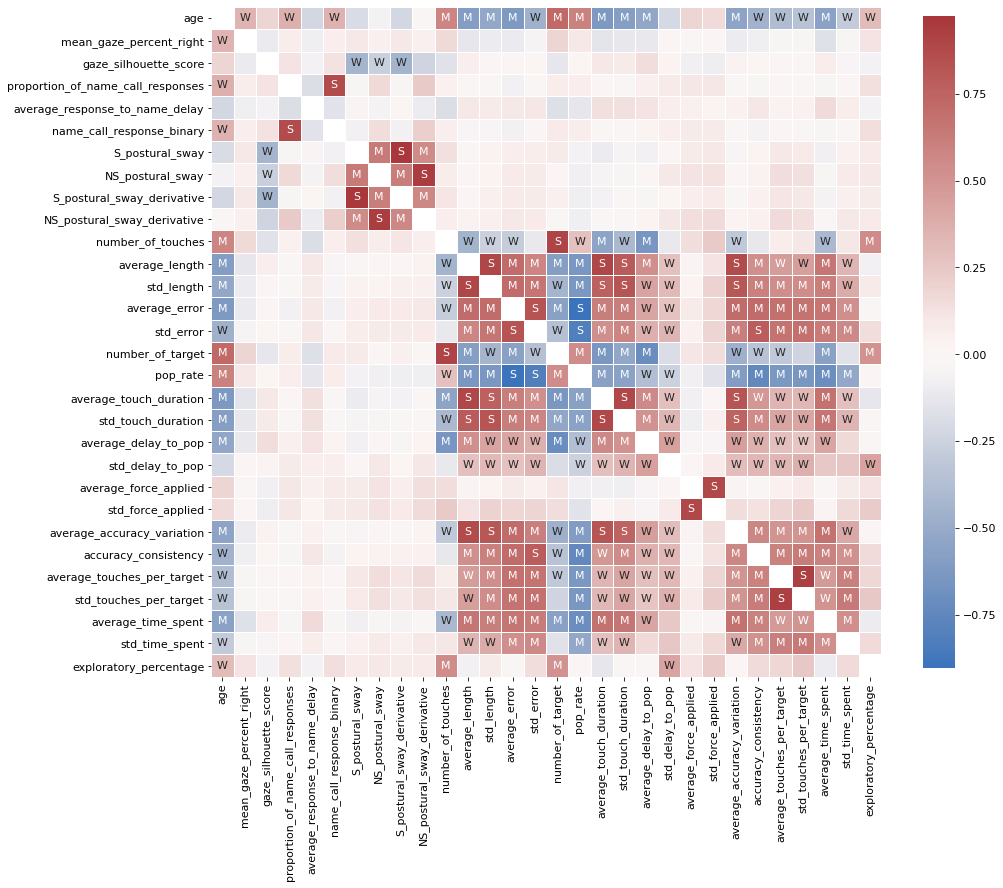

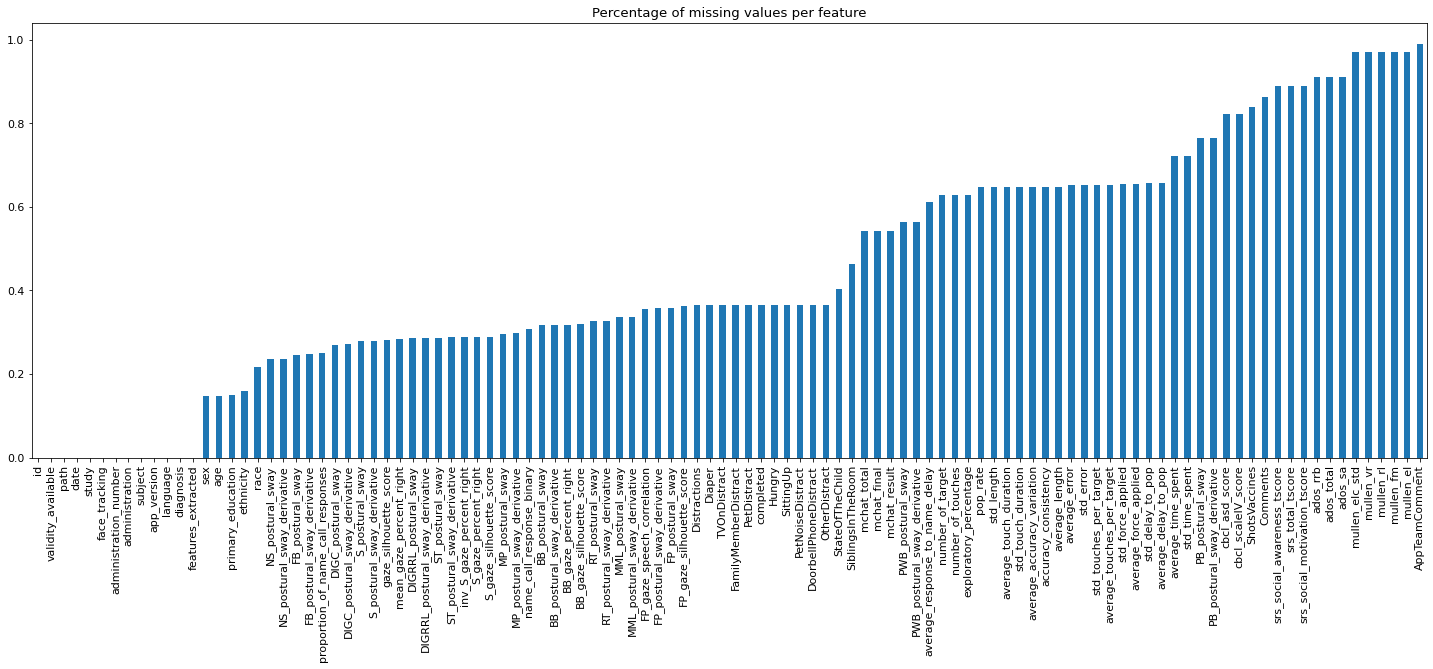

In [108]:
import missingno as msno
df_X = df[['age'] + data.features_name]


def custom_spearmanr(x, y):
    from scipy.stats import spearmanr
    return spearmanr(x, y, nan_policy='omit').correlation


# Computes feature correlation
df_corr = df_X.corr(method=custom_spearmanr)

labels = np.where(np.abs(df_corr)>0.75, "S",
                  np.where(np.abs(df_corr)>0.5, "M",
                           np.where(np.abs(df_corr)>0.25, "W", "")))

# Plot correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(df_corr, mask=np.eye(len(df_corr)), square=True,
            center=0, annot=labels, fmt='', linewidths=.5,
            cmap="vlag", cbar_kws={"shrink": 0.8});

plt.figure()
df.isna().mean().sort_values().plot(
    kind="bar", figsize=(25, 8),
    title="Percentage of missing values per feature")

In [17]:
df[df['diagnosis']==1].isna().mean()

id                             0.000000
diagnosis                      0.000000
language                       0.000000
app_version                    0.000000
subject                        0.000000
                                 ...   
S_postural_sway_derivative     0.069767
NS_postural_sway_derivative    0.000000
gaze_silhouette_score          0.069767
inv_S_gaze_percent_right       0.093023
mean_gaze_percent_right        0.093023
Length: 108, dtype: float64

<AxesSubplot:title={'center':'Difference of average missing data per columns ASD-NT (the lower, the more the feature is missing for the TD comapred to the ASD'}>

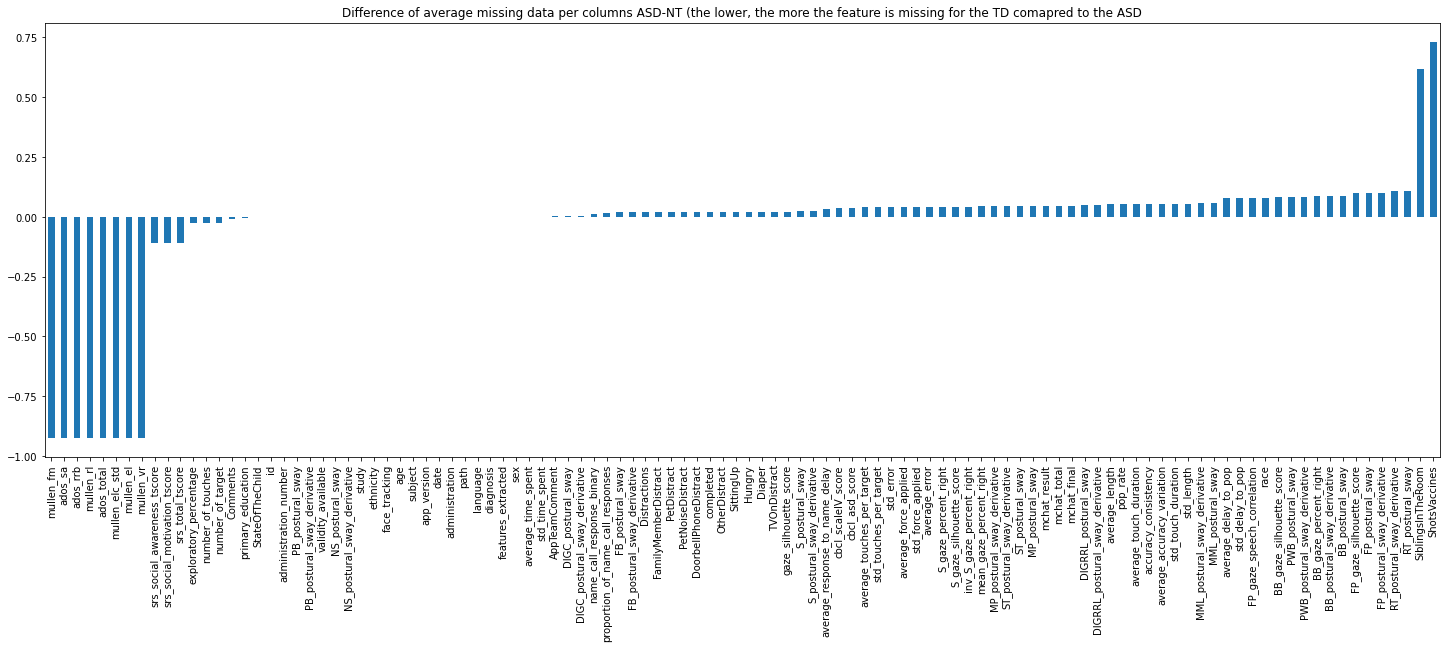

In [18]:
(df[df['diagnosis']==1].isna().mean() - df[df['diagnosis']==0].isna().mean()).sort_values().plot(
    kind="bar", figsize=(25, 8),
    title="Difference of average missing data per columns ASD-NT (the lower, the more the feature is missing for the TD comapred to the ASD")

In [19]:
df_X_asd = df[df['diagnosis']==1][data.features_name]
df_X_td = df[df['diagnosis']==0][data.features_name]

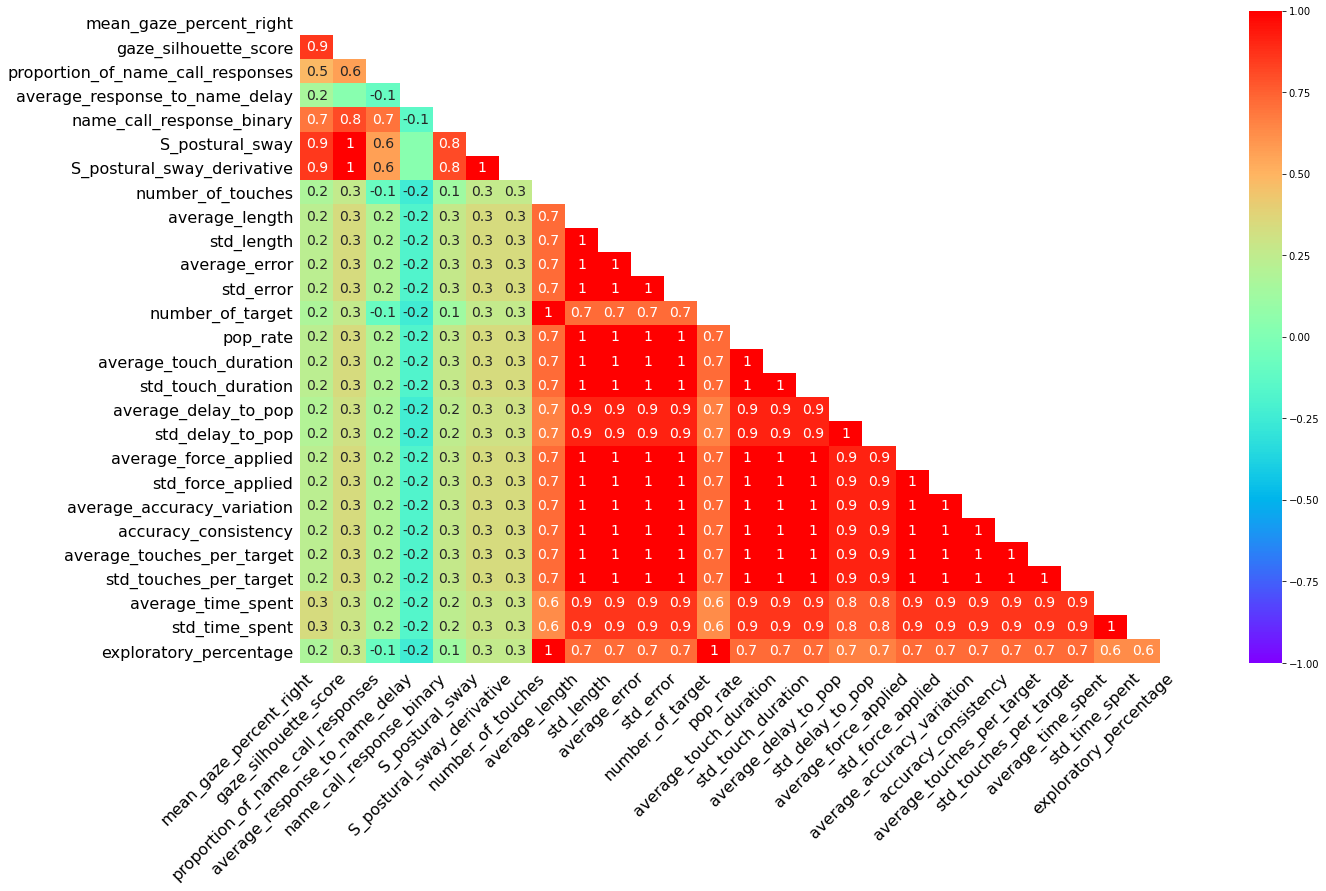

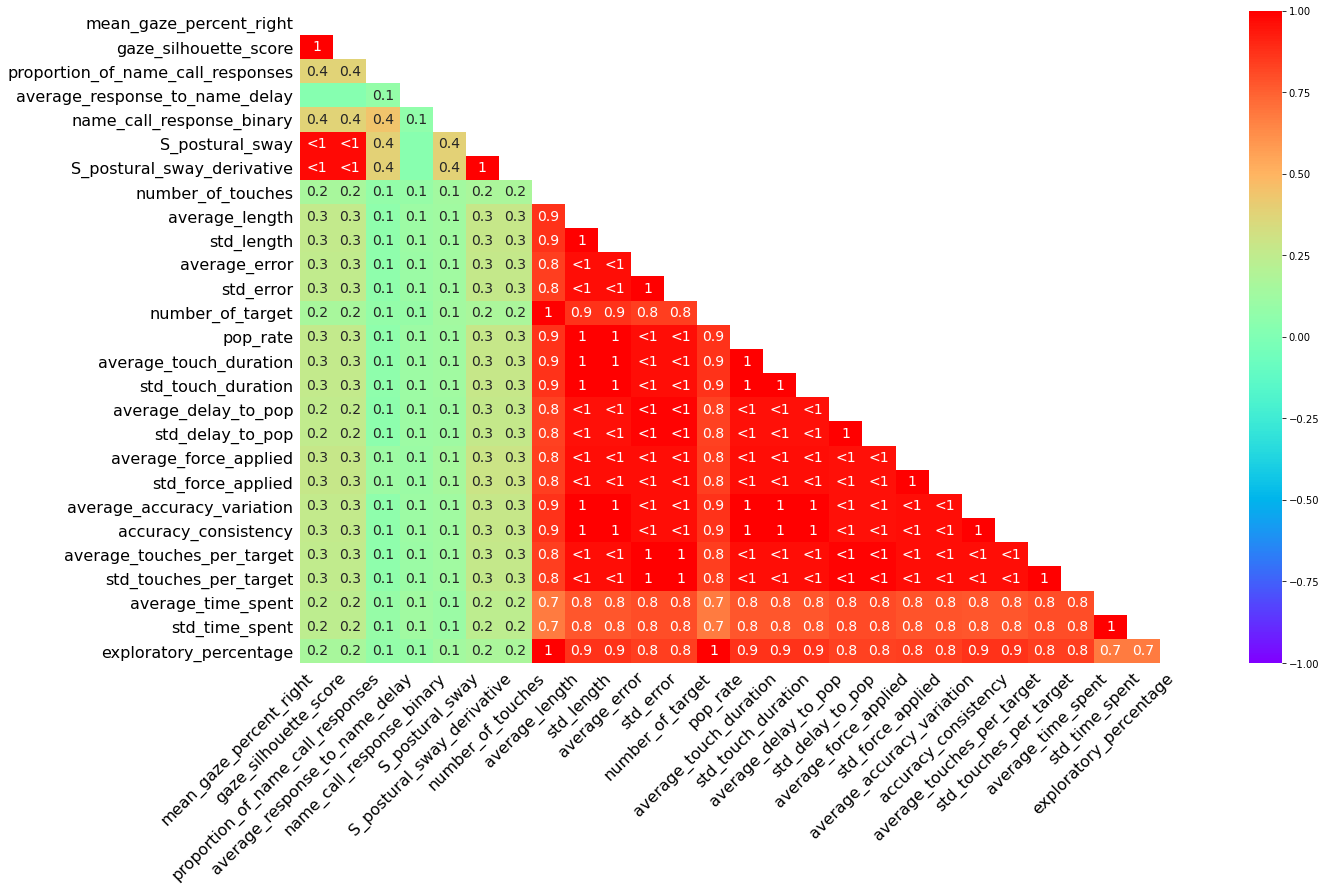

In [24]:
msno.heatmap(df_X_asd, cmap='rainbow');
msno.heatmap(df_X_td, cmap='rainbow');

In [211]:
#msno.dendrogram(df_X)

In [26]:
display(data.df.groupby('diagnosis')[['age', 'sex']].describe())

    
    

age                                                                                sex                                             
           count       mean       std        min        25%        50%        75%        max  count      mean       std  min  25%  50%  75%  max
diagnosis                                                                                                                                       
0.0        416.0  20.505202  3.134623  17.147541  18.098361  18.557377  24.000000  32.327869  416.0  0.495192  0.500579  0.0  0.0  0.0  1.0  1.0
1.0         43.0  24.265345  4.717926  18.065574  20.459016  24.000000  26.081967  36.852459   43.0  0.255814  0.441481  0.0  0.0  0.0  0.5  1.0

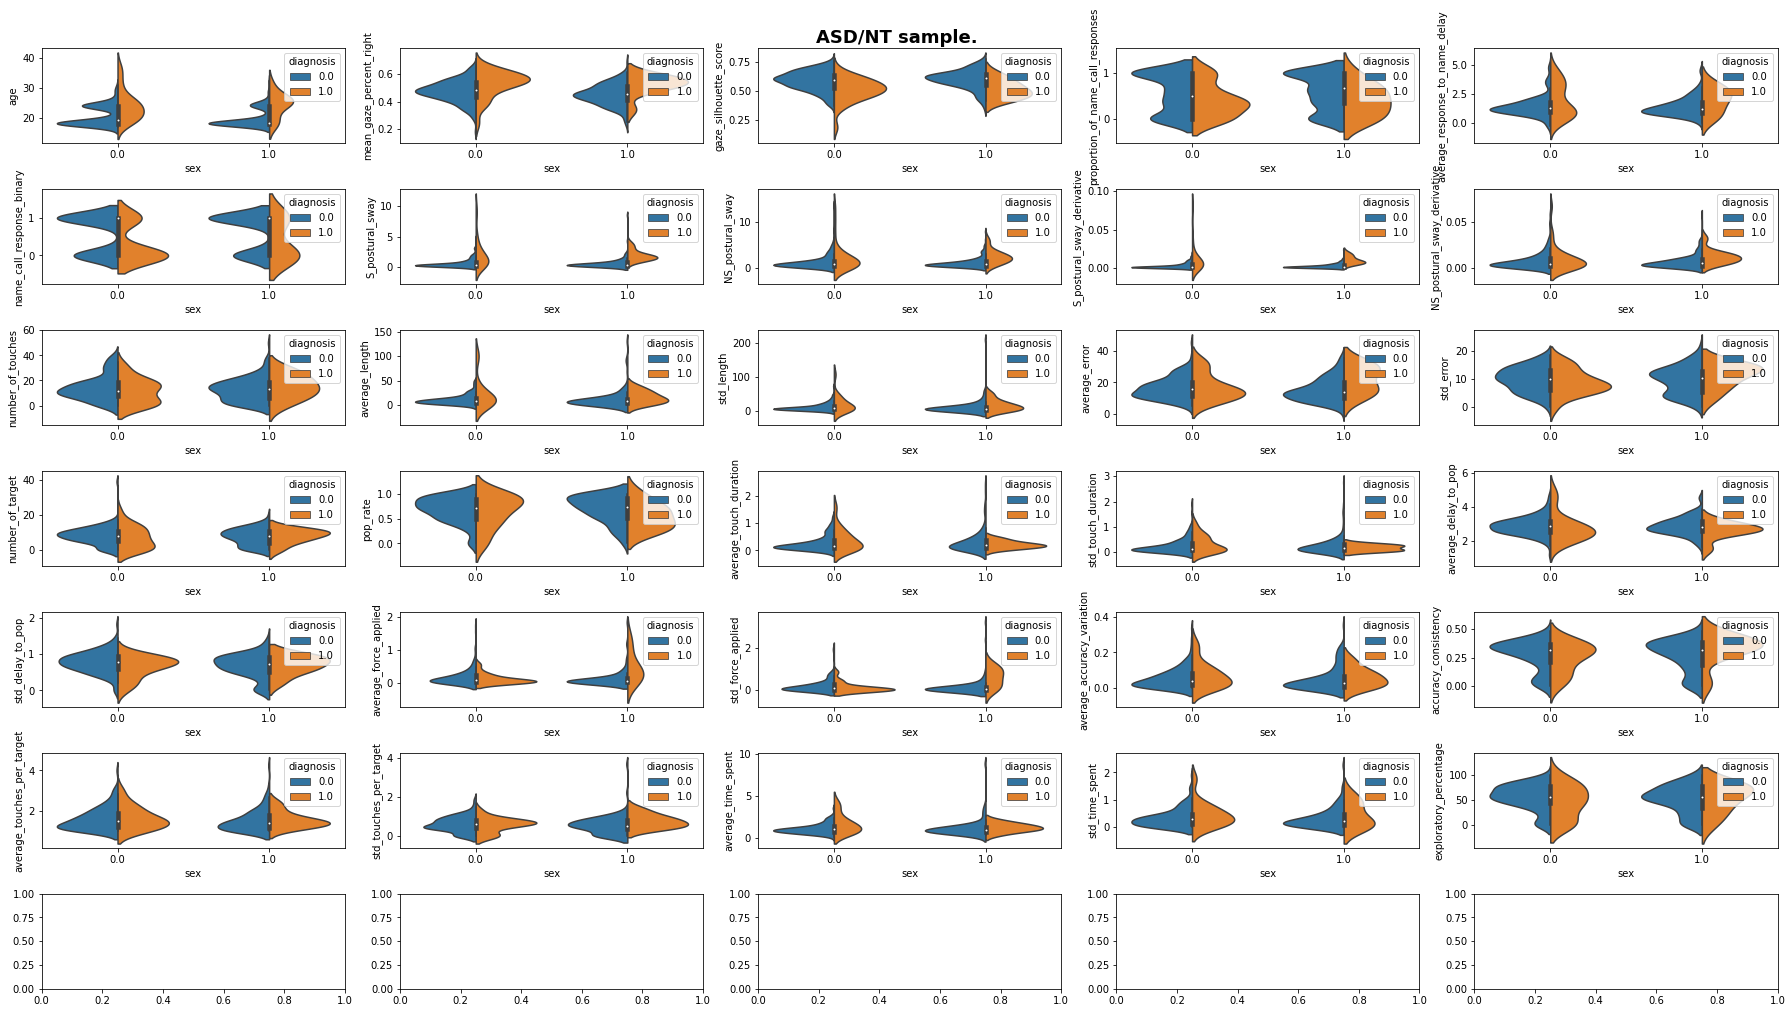

In [29]:
set_of_features  = {'asd_td_age_matched_n_balanced':["S_postural_sway", "mean_gaze_percent_right", "proportion_of_name_call_responses", "gaze_silhouette_score", "NS_postural_sway_derivative", "average_length"],
                    'asd_td_age_matched_n_unbalanced': ["S_postural_sway", "mean_gaze_percent_right", "NS_postural_sway", "proportion_of_name_call_responses", "NS_postural_sway_derivative", "gaze_silhouette_score"]}

selected_features = ['age'] + data.features_name



# Create a figure with 3 x 2 subplots
fig, axes = plt.subplots(ncols=5, nrows=len(selected_features)//5 +1, figsize=(25, 14))
fig.suptitle("ASD/NT sample.", weight='bold', fontsize=18)
# Loop through these features and plot entries from each feature against `Latitude`
for col, ax in zip(selected_features, axes.ravel()):
    sns.violinplot(data=data.df, y=col, x='sex', hue='diagnosis', palette="tab10",
                   split=True, ax=ax)
plt.tight_layout()

# Analysis of missing data patterns 

In [280]:
df = pd.read_csv("/Users/samperochon/Duke/work/notes_on_stats/df_all.csv")

df['stimuli_version'] = df['path'].apply(lambda path: path.split('/')[-2])
df.loc[~df['stimuli_version'].isin(['Older_Than_18', '12_Months', '9_Months', '6_Months']), 'stimuli_version'] = 'Older_Than_18'



data = Dataset(df=df, 
                   use_missing_indicator_variables=False,
                   missing_data_handling='encoding', 
                   imputation_method='without', 
                   sampling_method='without',
                   outcome_column='diagnosis',
                   features_name=CVA_COLUMNS,#+ CLINICAL_COLUMNS + VALIDITY_COLUMNS,
                   scenario=None,#'asd_td_age_matched_n_balanced',
                   proportion_train=1)
data.filter(administration={'complete': True})

Post-processing inital df (removing columns with no cva features, encoding srings, compute administrations order, compute condensed S/NS variables)... 
Predicting diagnosis based on 51 features
Splitting dataset into test and train set.
Encoding 1956 (train) and 0 (test) missing values with -5.
Removing 116/1956 incomplete administrations.
1840 administrations left.


id
diagnosis      
-1.0        141
 0.0       1154
 1.0        412
 2.0         40
 3.0         82
 4.0         11

Splitting dataset into test and train set.
Encoding 1840 (train) and 0 (test) missing values with -5.


Predicting diagnosis based on 29 features
Splitting dataset into test and train set.
Encoding 1840 (train) and 0 (test) missing values with -5.


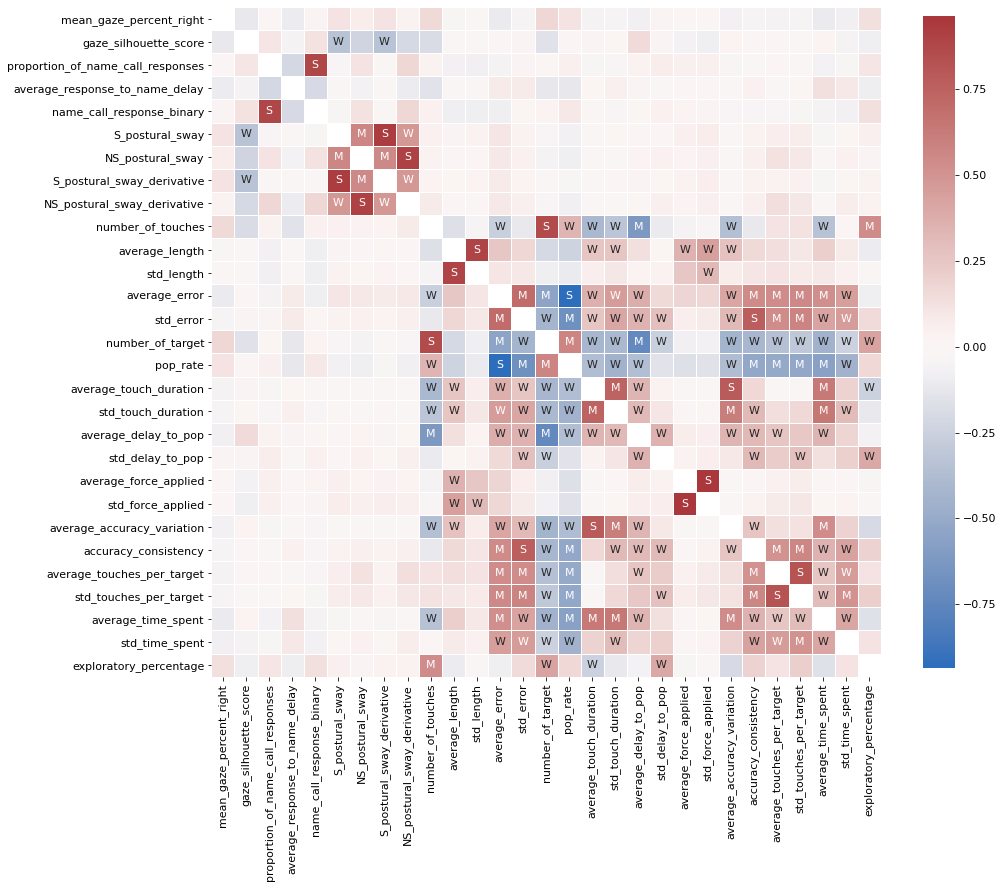

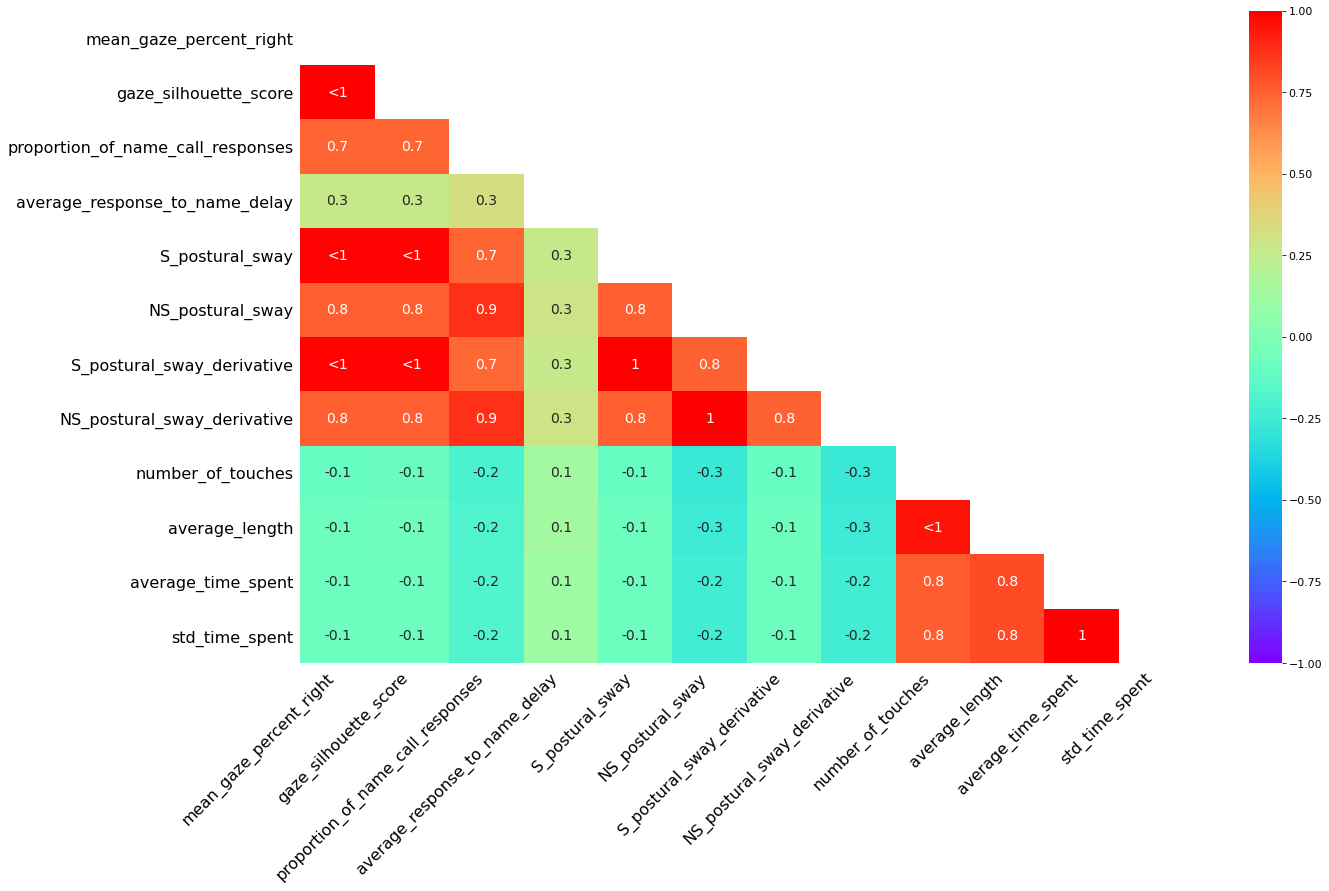

In [97]:
import missingno as msno
data.features_name = DEFAULT_PREDICTORS
df_X = df[data.features_name]
# Computes feature correlation
df_corr = df_X.corr(method="pearson")
labels = np.where(np.abs(df_corr)>0.75, "S",
                  np.where(np.abs(df_corr)>0.5, "M",
                           np.where(np.abs(df_corr)>0.25, "W", "")))

# Plot correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(df_corr, mask=np.eye(len(df_corr)), square=True,
            center=0, annot=labels, fmt='', linewidths=.5,
            cmap="vlag", cbar_kws={"shrink": 0.8});

#plt.figure(figsize=(15, 15))
#df.isna().mean().sort_values().plot(kind="bar", figsize=(15, 4),
#                                    title="Percentage of missing values per feature");

    
features_for_missing_correlations = ['mean_gaze_percent_right',
                             'gaze_silhouette_score',
                             'proportion_of_name_call_responses',
                             'average_response_to_name_delay',
                             'S_postural_sway',
                             'NS_postural_sway',
                             'S_postural_sway_derivative',
                             'NS_postural_sway_derivative',
                             'number_of_touches',
                             'average_length',
                             'average_time_spent',
                             'std_time_spent']
df_X = df[features_for_missing_correlations]
msno.heatmap(df_X, cmap='rainbow');


Text(0, 0.5, 'Number of administration with this pattern missing.')

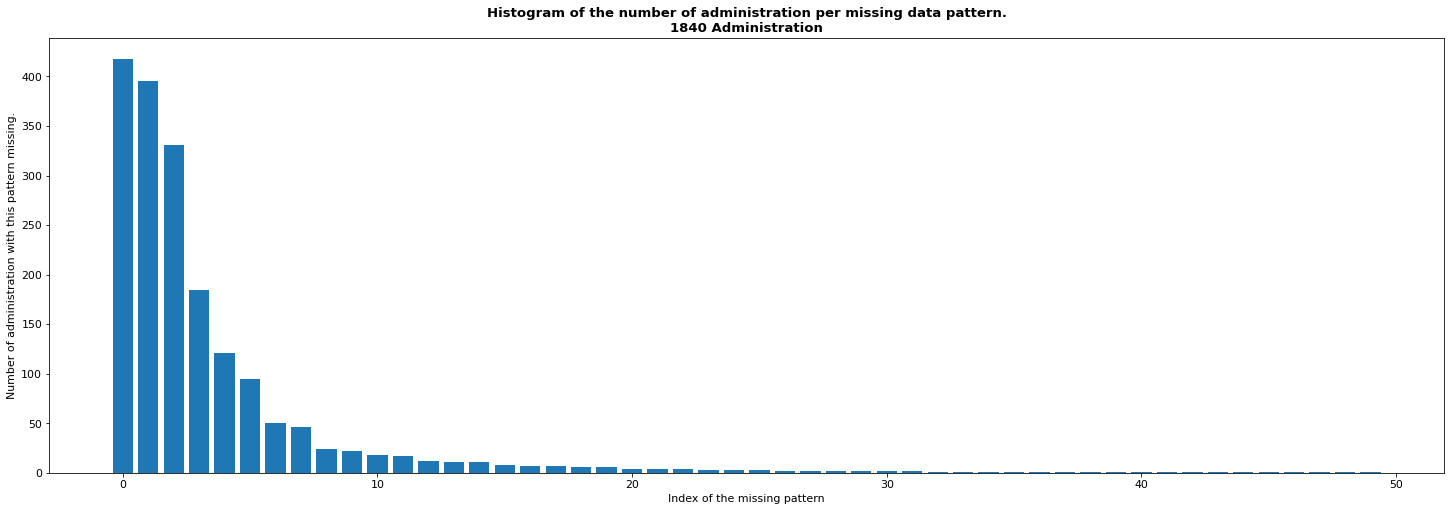

In [99]:
variables_of_interest = DEFAULT_PREDICTORS


X  = data.df[variables_of_interest]
dataset = X.copy()

vars = dataset.dtypes.index.values
n_var = dataset.shape[1]
# mean and covariance estimates
# ideally, this is done with a maximum likelihood estimator
gmean = dataset.mean()
gcov = dataset.cov()

# set up missing data patterns
r = 1 * dataset.isnull()
mdp = np.dot(r, list(map(lambda x: pow(2, x), range(n_var))))
sorted_mdp = sorted(np.unique(mdp))
n_pat = len(sorted_mdp)
correct_mdp = list(map(lambda x: sorted_mdp.index(x), mdp))
data.df["mdp"] = pd.Series(correct_mdp, index=dataset.index)

plt.figure(figsize=(25, 8))
plt.bar(x=np.arange((len(data.df["mdp"].value_counts().index))), height=data.df["mdp"].value_counts().to_numpy())
plt.title("Histogram of the number of administration per missing data pattern.\n{} Administration".format(len(data.df)), weight='bold');plt.xlabel("Index of the missing pattern"); plt.ylabel("Number of administration with this pattern missing.")

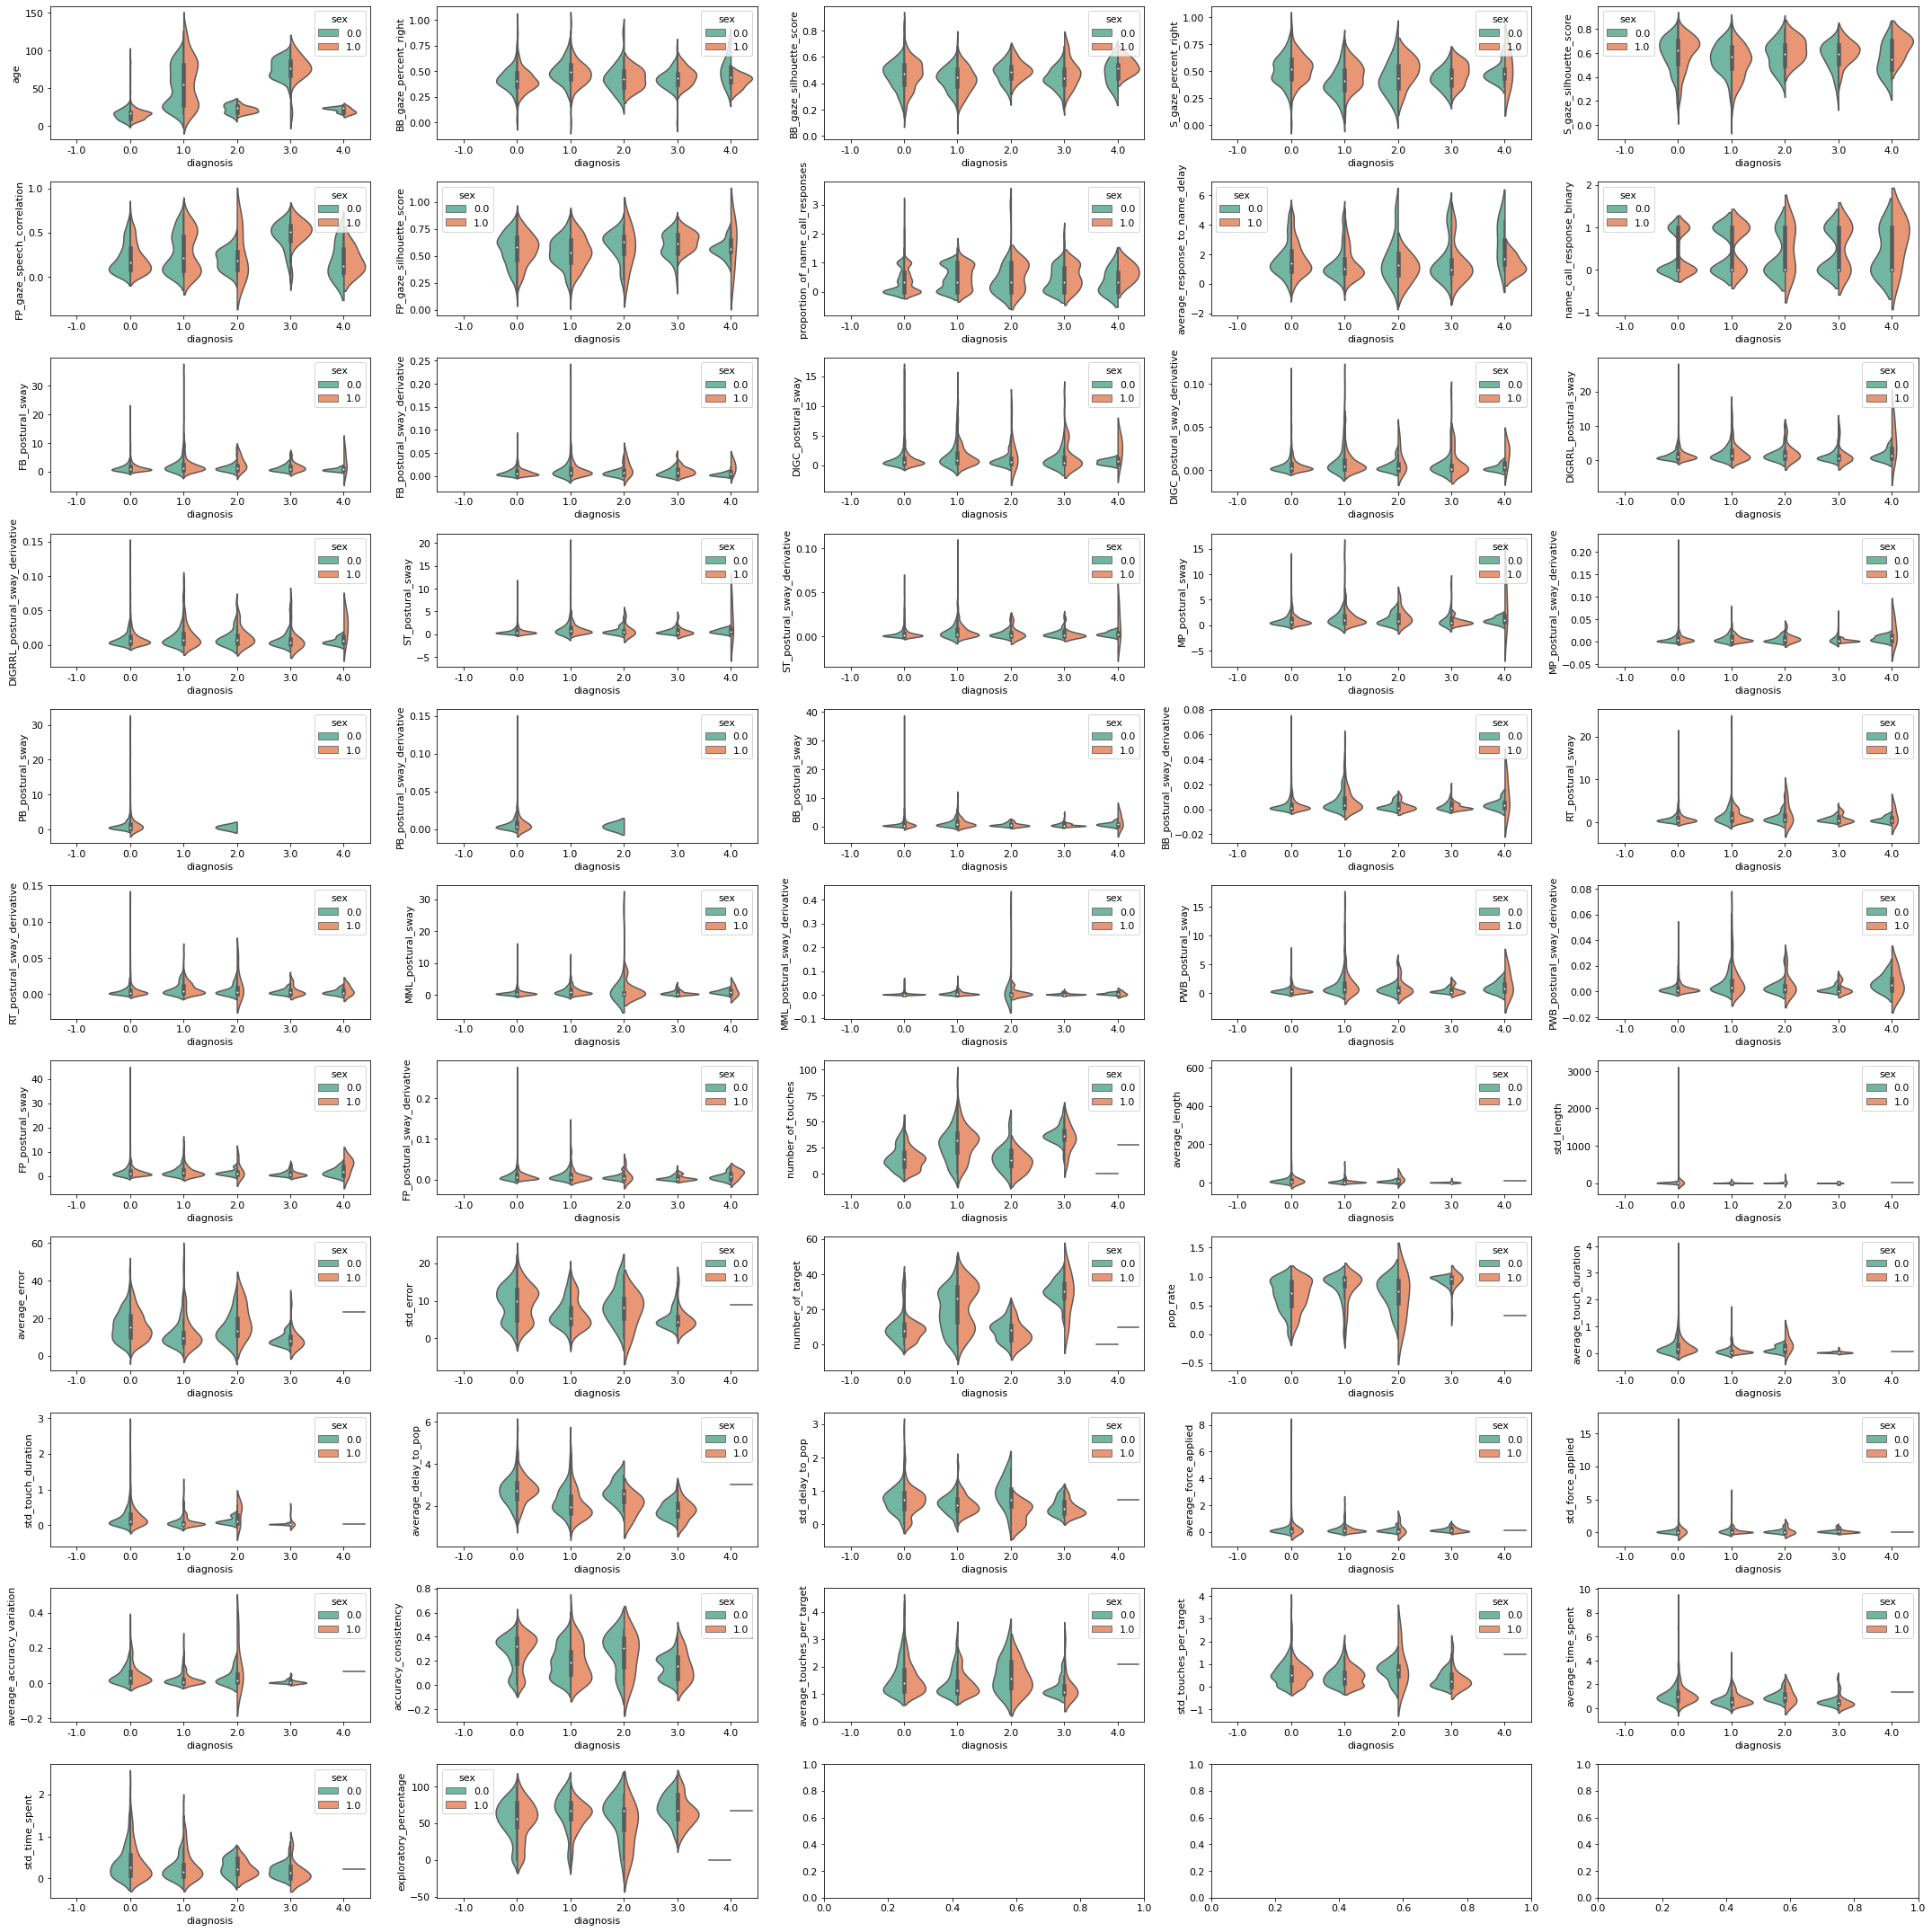

In [70]:
selected_features = ['age'] + CVA_COLUMNS

# Create a figure with 3 x 2 subplots
fig, axes = plt.subplots(ncols=5, nrows=len(selected_features)//5 +1, figsize=(30, 30))
# Loop through these features and plot entries from each feature against `Latitude`
for col, ax in zip(selected_features, axes.ravel()):
    sns.violinplot(data=df, y=col, x='diagnosis', hue='sex', palette="Set2",
                   split=True, ax=ax)
plt.tight_layout()

In [100]:
variables_of_interest = CVA_COLUMNS


X  = data.df[variables_of_interest]
dataset = X.copy()

vars = dataset.dtypes.index.values
n_var = dataset.shape[1]
# mean and covariance estimates
# ideally, this is done with a maximum likelihood estimator
gmean = dataset.mean()
gcov = dataset.cov()

# set up missing data patterns
r = 1 * dataset.isnull()
mdp = np.dot(r, list(map(lambda x: pow(2, x), range(n_var))))
sorted_mdp = sorted(np.unique(mdp))
n_pat = len(sorted_mdp)
correct_mdp = list(map(lambda x: sorted_mdp.index(x), mdp))
data.df["mdp"] = pd.Series(correct_mdp, index=dataset.index)

In [101]:
print("Number of missing patterns: {} (over {} theoretically possible; 2^K)".format(n_pat, 2**len(variables_of_interest)))

Number of missing patterns: 210 (over 2251799813685248 theoretically possible; 2^K)


Text(0.5, 1.0, 'Features missing for the most frequent patterns. 1840 adm (1154 NT, 412 ASD)')

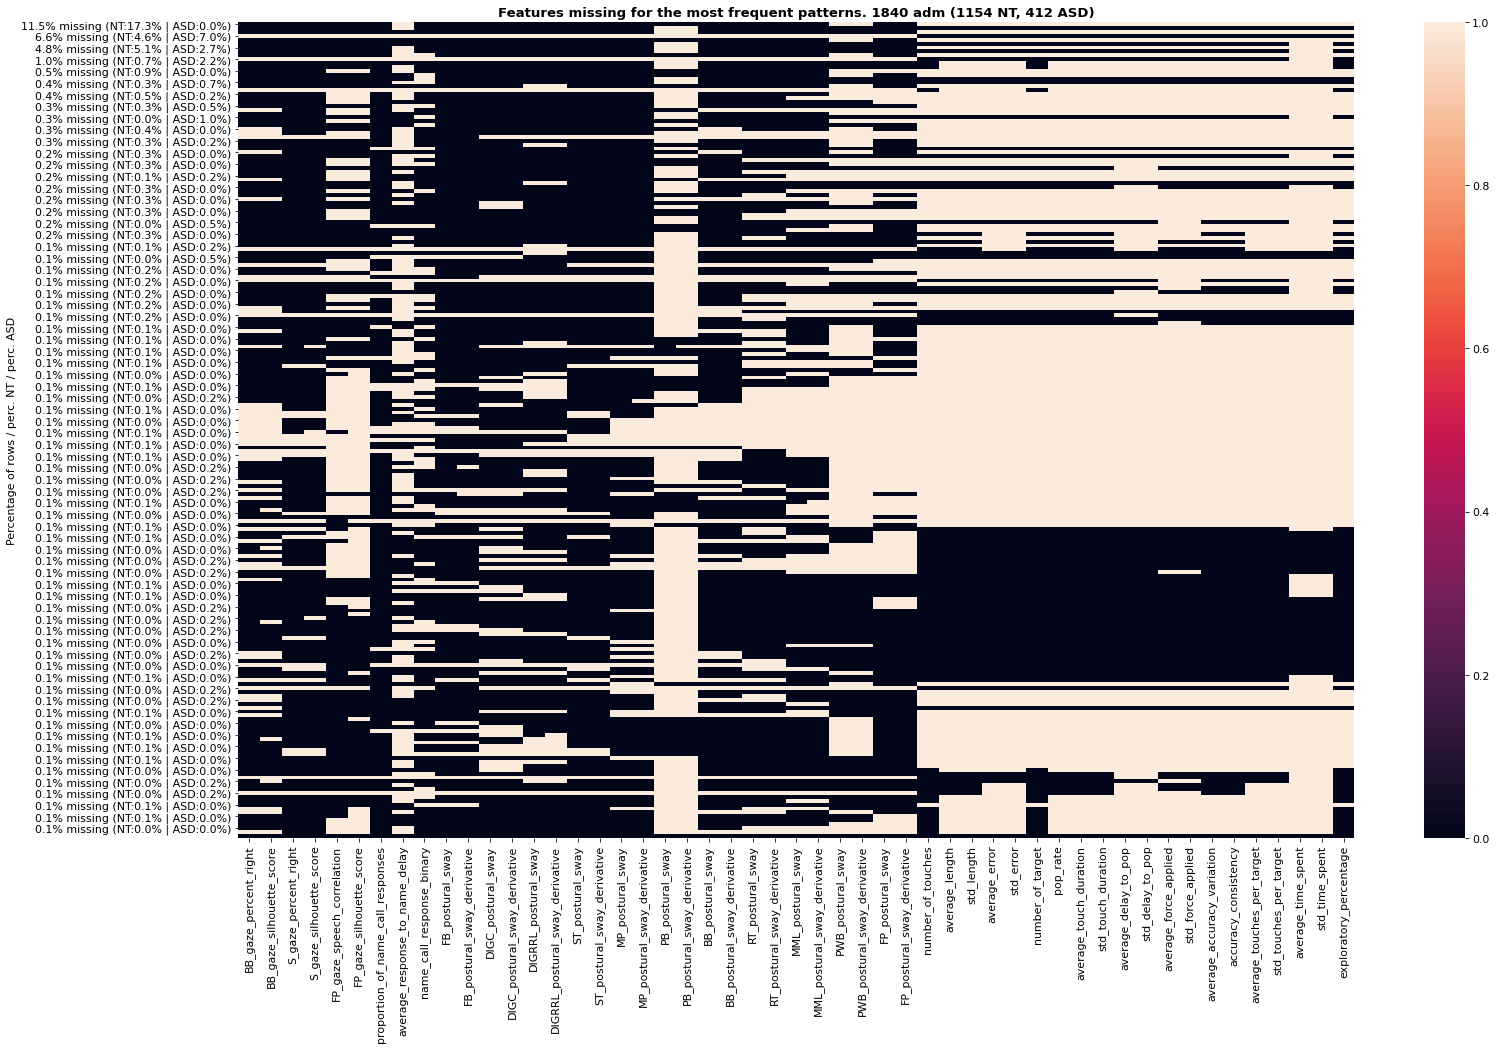

In [102]:

matrix = pd.DataFrame(
            data=np.zeros(shape=(len(data.df["mdp"].value_counts().index), len(variables_of_interest)+1)),
            columns=variables_of_interest+['Percentage of rows'],
            index=data.df["mdp"].unique(),
        ).sort_index()

for pattern in sorted(data.df["mdp"].unique())[1:]:
    d = data.df.loc[data.df['mdp']==pattern, ['diagnosis'] + variables_of_interest]
    missing_columns = list(d.columns[d.isnull().any()])
    matrix.loc[pattern, missing_columns] = 1
    matrix.loc[pattern, 'Percentage of rows'] = np.round(len(d)/len(data.df)*100,2)
    #matrix.loc[pattern, 'Percentage of rows (autism)'] = np.round(len(d[d['diagnosis']==0])/len(data.df[data.df['diagnosis']==0])*100,2)
    #matrix.loc[pattern, 'Percentage of rows (NT)'] = np.round(len(d[d['diagnosis']==1])/len(data.df[data.df['diagnosis']==1])*100,2)
    matrix.loc[pattern, 'Percentage of rows / perc. NT / perc. ASD'] = "{}% missing (NT:{}% | ASD:{}%)".format(np.round(len(d)/len(data.df)*100,1), np.round(len(d[d['diagnosis']==0])/len(data.df[data.df['diagnosis']==0])*100,1), np.round(len(d[d['diagnosis']==1])/len(data.df[data.df['diagnosis']==1])*100,1))
matrix.sort_values('Percentage of rows', ascending=False, inplace=True)
plt.figure(figsize=(25, 15))
sns.heatmap(matrix.set_index('Percentage of rows / perc. NT / perc. ASD').loc[:, variables_of_interest].astype(int))
plt.title("Features missing for the most frequent patterns. {} adm ({} NT, {} ASD)".format(len(data.df), len(data.df[data.df['diagnosis']==0]), len(data.df[data.df['diagnosis']==1])), weight='bold')

<AxesSubplot:ylabel='Percentage of rows / perc. NT / perc. ASD'>

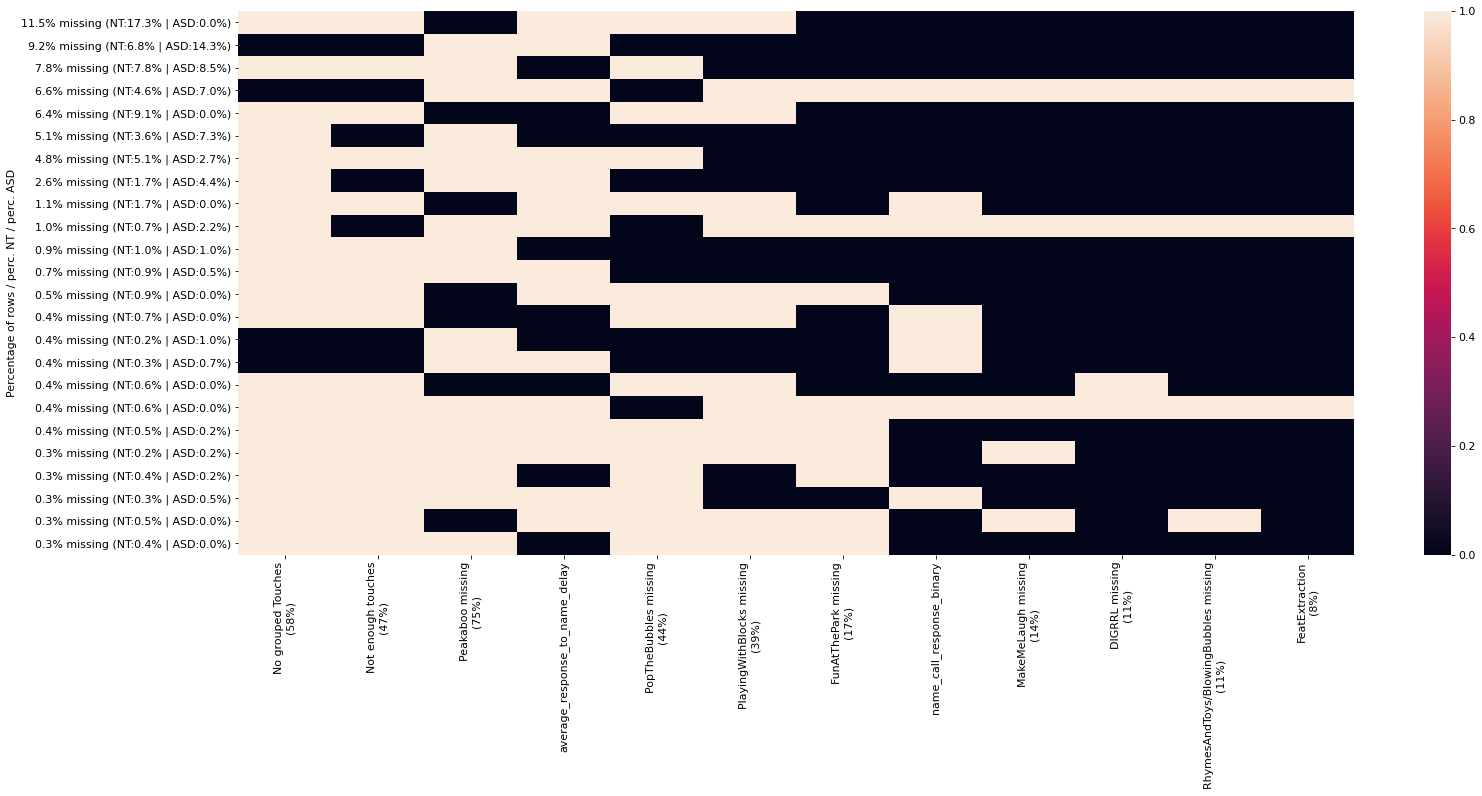

In [103]:
matrix = matrix.loc[matrix['Percentage of rows'] >.3, :].transpose()

new_df = matrix.loc[['Percentage of rows / perc. NT / perc. ASD'], :].copy()
duplicated_rows = matrix[matrix.duplicated(keep=False)]

grouped_features_label = {0:"FeatExtraction", 
                          1: "RhymesAndToys/BlowingBubbles missing", 
                          2: "MakeMeLaugh missing", 
                          3: "DIGRRL missing", 
                          4: "FunAtThePark missing", 
                          5: "Peakaboo missing", 
                          6: "PlayingWithBlocks missing", 
                          7: "PopTheBubbles missing", 
                          8: "Not enough touches", 
                          9: "No grouped Touches", 
                         }
def df_missing_features(df, features, having_features_missing=True):
    if having_features_missing:
        return df.loc[df.drop(index=df.dropna(subset=features, how='all').index).index, :]
    else:
        return df.dropna(subset=features, how='all')
    
    
grouped_features = {}
for idx, (i, f) in enumerate(duplicated_rows.groupby(list(duplicated_rows))):
    grouped_features[idx]=[]
    for col in f.index:
        grouped_features[idx].append(col)    
    
for i, feats in grouped_features.items():
    grouped_features_label[i] += "\n({}%)".format(int(len(df_missing_features(data.df, features=feats, having_features_missing=True))/len(data.df)*100))
    
    
for idx, (i, f) in enumerate(duplicated_rows.groupby(list(duplicated_rows))):
    index = ""
    for col in f.index:
        index+=col+"\n"
    index = index[:-1]
    new_df = new_df.append(pd.DataFrame(data=f.iloc[:1].to_numpy().astype(int), index=[grouped_features_label[idx]], columns=f.columns))
    

    
    
new_df = new_df.append(matrix[~matrix.duplicated(keep=False)].drop(index=['Percentage of rows','Percentage of rows / perc. NT / perc. ASD'])).transpose()
new_df.set_index('Percentage of rows / perc. NT / perc. ASD', inplace=True)
new_df = new_df.loc[:,list(new_df.sum(axis=0).sort_values(ascending=False).index)]

plt.figure(figsize=(25, 10))
sns.heatmap(new_df.astype(int))

## Adding the indicator variables to the dataframe

In [289]:

for i, feats in grouped_features.items():
    data.df['Z_grouped_{}'.format(i)] = 0
    data.df.loc[data.df.drop(index=data.df.dropna(subset=feats, how='all').index).index, 'Z_grouped_{}'.format(i)] = 1


# Little test 


In [35]:
"""Statistical hypothesis test for Missing Completely At Random (MCAR)"""
# Author: Rianne Schouten <https://rianneschouten.github.io/>
# Co-Author: Davina Zamanzadeh <https://davinaz.me/>

from logging import error
import numpy as np
import pandas as pd
from math import pow
from scipy.stats import chi2, ttest_ind

from typing import List, Union
Matrix = Union[pd.DataFrame, np.ndarray]


class MCARTest:
    """
    Statistical hypothesis test for Missing Completely At Random (MCAR)

    Performs Little's MCAR test (see `Little, R.J.A. (1988)`_). Null hypothesis: data is Missing Completely At Random (MCAR). Alternative hypothesis: data is not MCAR.

    .. _`Little, R.J.A. (1988)`: https://www.tandfonline.com/doi/abs/10.1080/01621459.1988.10478722

    Parameters
    ----------
    method : str, {"little", "ttest"}, default : "little"
        Whether to perform a chi-square test on the entire dataset ("little") or separate t-tests for every combination of variables ("ttest"). 

    See also
    --------
    :class:`~pyampute.exploration.md_patterns.mdPatterns` : Displays missing data patterns in incomplete datasets
    
    :class:`~pyampute.ampute.MultivariateAmputation` : Transformer for generating multivariate missingness in complete datasets

    Notes
    -----
    We advise to use Little's MCAR test carefully. Rejecting the null hypothesis may not always mean that data is not MCAR, nor is accepting the null hypothesis a guarantee that data is MCAR. See `Schouten et al. (2021)`_ for a thorough discussion of missingness mechanisms. 

    .. _`Schouten et al. (2021)`: https://journals.sagepub.com/doi/full/10.1177/0049124118799376

    Examples
    --------
    >>> import pandas as pd
    >>> from pyampute.exploration.mcar_statistical_tests import MCARTest
    >>> data_mcar = pd.read_table("data/missingdata_mcar.csv")
    >>> mt = MCARTest(method="little")
    >>> print(mt.little_mcar_test(data_mcar))
    0.17365464213775494    
    """

    def __init__(self, method: str = "little"):
        self.method = method

    def __call__(self, data: Matrix) -> float:
        if self.method == "little":
            return self.little_mcar_test(data)
        elif self.method == "ttest":
            return self.mcar_t_tests(data)
        else:
            error(
                f"Chose {self.method} as test method, which is not supported. Please choose from [little, ttest]."
            )

    @staticmethod
    def little_mcar_test(X: Matrix) -> float:
        """
        Implementation of Little's MCAR test
        
        Parameters
        ----------
        X : Matrix of shape `(n, m)`
            Dataset with missing values. `n` rows (samples) and `m` columns (features).

        Returns
        -------
        pvalue : float
            The p-value of a chi-square hypothesis test. Null hypothesis: data is Missing Completely At Random (MCAR). Alternative hypothesis: data is not MCAR.
        """

        dataset = X.copy()
        vars = dataset.dtypes.index.values
        n_var = dataset.shape[1]

        # mean and covariance estimates
        # ideally, this is done with a maximum likelihood estimator
        gmean = dataset.mean()
        gcov = dataset.cov()

        # set up missing data patterns
        r = 1 * dataset.isnull()
        mdp = np.dot(r, list(map(lambda x: pow(2, x), range(n_var))))
        sorted_mdp = sorted(np.unique(mdp))
        n_pat = len(sorted_mdp)
        correct_mdp = list(map(lambda x: sorted_mdp.index(x), mdp))
        dataset["mdp"] = pd.Series(correct_mdp, index=dataset.index)

        # calculate statistic and df
        pj = 0
        d2 = 0
        for i in range(n_pat):
            dataset_temp = dataset.loc[dataset["mdp"] == i, vars]
            select_vars = ~dataset_temp.isnull().any()
            pj += np.sum(select_vars)
            select_vars = vars[select_vars]
            means = dataset_temp[select_vars].mean() - gmean[select_vars]
            select_cov = gcov.loc[select_vars, select_vars]
            mj = len(dataset_temp)
            parta = np.dot(
                means.T, np.linalg.solve(select_cov, np.identity(select_cov.shape[1]))
            )
            d2 += mj * (np.dot(parta, means))

        df = pj - n_var

        # perform test and save output
        pvalue = 1 - chi2.cdf(d2, df)

        return pvalue

    @staticmethod
    def mcar_t_tests(X: Matrix) -> pd.DataFrame:
        """
        Performs t-tests for MCAR for each pair of features.

        Parameters
        ----------
        X : Matrix of shape `(n, m)`
            Dataset with missing values. `n` rows (samples) and `m` columns (features).

        Returns
        -------
        pvalues : pandas DataFrame of shape `(m, m)`
            The p-values of t-tests for each pair of features. Null hypothesis for cell :math:`pvalues[h,j]`: data in feature :math:`h` is Missing Completely At Random (MCAR) with respect to feature :math:`j` for all :math:`h,j` in :math:`{1,2,...m}`. Diagonal values do not exist. 
        """
        dataset = X.copy()
        vars = dataset.dtypes.index.values
        mcar_matrix = pd.DataFrame(
            data=np.zeros(shape=(dataset.shape[1], dataset.shape[1])),
            columns=vars,
            index=vars,
        )

        for var in vars:
            for tvar in vars:
                part_one = dataset.loc[dataset[var].isnull(), tvar].dropna()
                part_two = dataset.loc[~dataset[var].isnull(), tvar].dropna()
                mcar_matrix.loc[var, tvar] = ttest_ind(
                    part_one, part_two, equal_var=False
                ).pvalue

        return mcar_matrix[mcar_matrix.notnull()]

In [288]:
data.df['stimuli_version'] = data.df['path'].apply(lambda path: path.split('/')[-2])
data.df.loc[~data.df['stimuli_version'].isin(['Older_Than_18', '12_Months', '9_Months', '6_Months']), 'stimuli_version'] = 'Older_Than_18'
data.df['stimuli_version'].value_counts()

Older_Than_18    1030
6_Months          108
9_Months           90
12_Months          60
Name: stimuli_version, dtype: int64

In [287]:
grouped_features

{1: ['BB_gaze_percent_right',
  'BB_gaze_silhouette_score',
  'BB_postural_sway',
  'BB_postural_sway_derivative',
  'RT_postural_sway',
  'RT_postural_sway_derivative'],
 2: ['MML_postural_sway', 'MML_postural_sway_derivative'],
 3: ['DIGRRL_postural_sway', 'DIGRRL_postural_sway_derivative'],
 4: ['FP_gaze_speech_correlation',
  'FP_gaze_silhouette_score',
  'FP_postural_sway',
  'FP_postural_sway_derivative'],
 5: ['PB_postural_sway', 'PB_postural_sway_derivative'],
 6: ['PWB_postural_sway', 'PWB_postural_sway_derivative'],
 7: ['number_of_touches', 'number_of_target', 'exploratory_percentage'],
 8: ['average_length',
  'std_length',
  'average_error',
  'std_error',
  'pop_rate',
  'average_touch_duration',
  'std_touch_duration',
  'average_delay_to_pop',
  'std_delay_to_pop',
  'average_force_applied',
  'std_force_applied',
  'average_accuracy_variation',
  'accuracy_consistency',
  'average_touches_per_target',
  'std_touches_per_target'],
 9: ['average_time_spent', 'std_time_sp

In [284]:
grouped_features
grouped_features_label = {0:"FeatExtraction", 
                          1: "RhymesAndToys/BlowingBubbles missing", 
                          2: "MakeMeLaugh missing", 
                          3: "DIGRRL missing", 
                          4: "FunAtThePark missing", 
                          5: "Peakaboo missing", 
                          6: "PlayingWithBlocks missing", 
                          7: "PopTheBubbles missing", 
                          8: "Not enough touches", 
                          9: "No grouped Touches", 
                         }

## Continuous Variables

In [296]:
variables_of_interest = list(grouped_features.values())
data.filter(administration={'complete':True, 'order': 'first'})

dict_check_1_0 = {9:[8],
                 10:[8, 9]}
    
    
vars = ['age', 'mullen_el',  'mullen_fm','mullen_rl','mullen_vr','mullen_elc_std','ados_total',  'ados_rrb',
         'ados_sa','srs_total_tscore', 'srs_social_awareness_tscore',
         'srs_social_motivation_tscore',
         'cbcl_scaleIV_score',
         'cbcl_asd_score',
         'mchat_total']


mcar_matrix = pd.DataFrame(
    data=np.zeros(shape=(len(vars), len(variables_of_interest))),
    columns=list(grouped_features.keys()),
    index=vars,
)


Removing 116/1956 incomplete administrations.
Removing 581/1840 keeping first admin.
1259 administrations left.


id
diagnosis     
-1.0        90
 0.0       792
 1.0       290
 2.0        27
 3.0        49
 4.0        11

Splitting dataset into test and train set.
Encoding 1259 (train) and 0 (test) missing values with -5.


In [290]:
for i, feats in grouped_features.items():
    for j, var in enumerate(vars):
        
        d = data.df.copy()
        
        # Removing the administration without the game by design (6, 9 nd 12 months versions), or playing with blocks
        if i in [6, 7, 8, 9]:
            d = d[d['stimuli_version']=='Older_Than_18']
            
        # removing the 18 Mo version for the Peakaboo features 
        elif i == 5:
            d = d[d['stimuli_version']!='Older_Than_18']

            
        
        if i in dict_check_1_0.keys():
            for idx_group_that_should_be_there in dict_check_1_0[i]:
                d = d[d['Z_grouped_{}'.format(idx_group_that_should_be_there)]==0]
                
        
        having = df_missing_features(d, feats, having_features_missing=False)[var].dropna()
        missing = df_missing_features(d, feats, having_features_missing=True)[var].dropna()
        
        if len(having) < 20 or len(missing) < 20:
            mcar_matrix.loc[var, i] = np.nan
            continue
            
        mcar_matrix.loc[var, i] = ttest_ind(having, missing, equal_var=False).pvalue


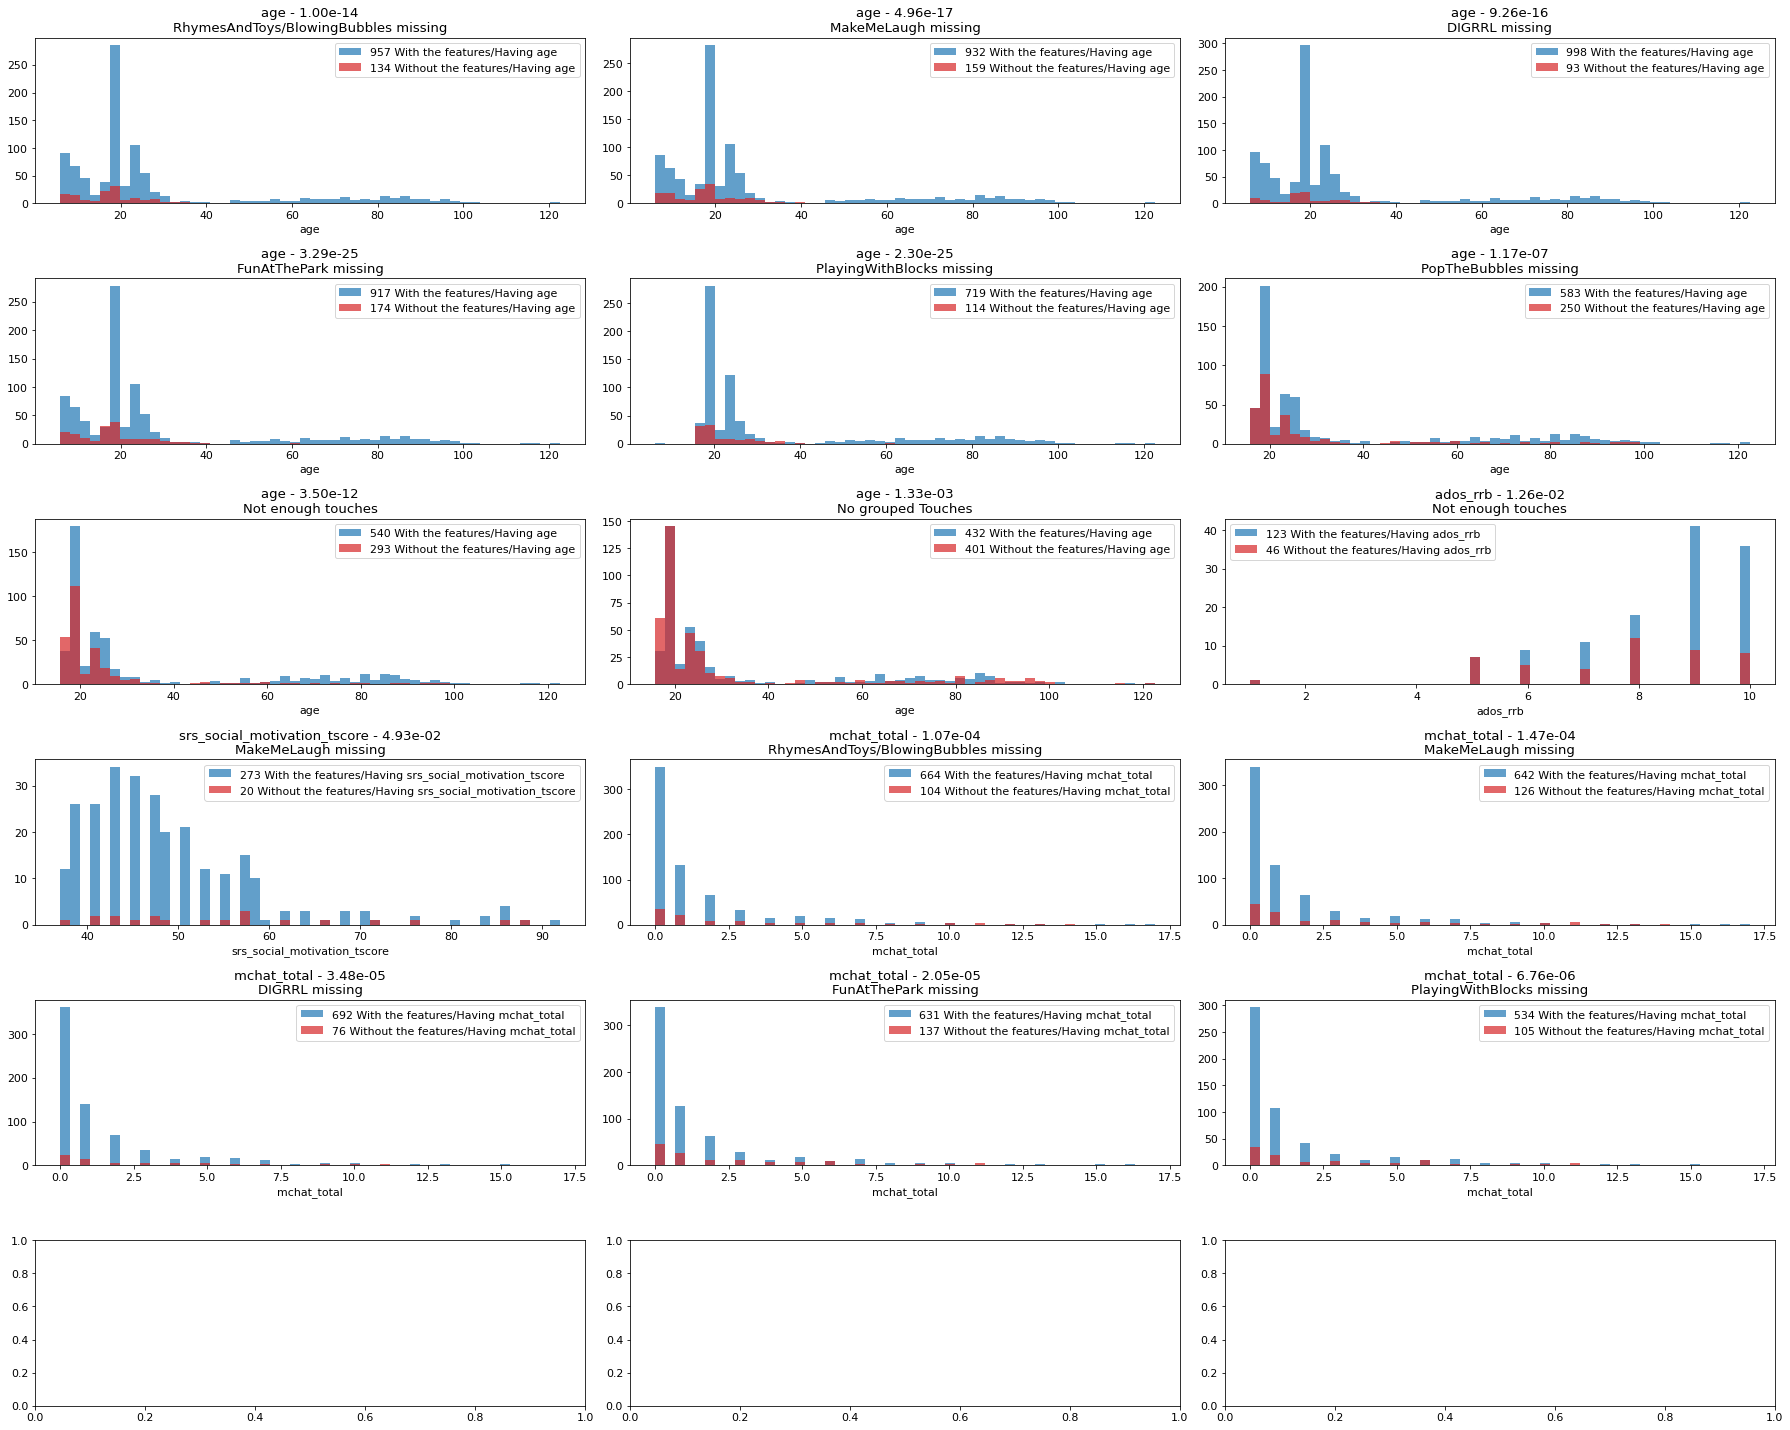

In [291]:
mask  = (mcar_matrix<0.05).astype(int)

locations = [(index, column) for index in mask.index for column in mask.columns if mask.loc[index, column]==1]

fig, axes = plt.subplots(len(locations)//3+1, 3, figsize=(25, 20));axes = axes.flatten()
for j, (var, idx) in enumerate(locations):
    feats = grouped_features[idx]
    
    d = data.df.copy()

    # Removing the administration without the game by design (6, 9 nd 12 months versions), or playing with blocks
    if idx in [6, 7, 8, 9]:
        d = d[d['stimuli_version']=='Older_Than_18']

    # removing the 18 Mo version for the Peakaboo features 
    elif idx == 5:
        d = d[d['stimuli_version']!='Older_Than_18']
    
    having = df_missing_features(d, feats, having_features_missing=False)[var].dropna()
    missing = df_missing_features(d, feats, having_features_missing=True)[var].dropna()
    
    _, bins, _ = axes[j].hist(having, density=False, bins = 50, color='tab:blue', label='{} With the features/Having {}'.format(len(having), var), alpha=.7)
    axes[j].hist(missing, bins = bins, density=False, color='tab:red', label='{} Without the features/Having {}'.format(len(missing), var), alpha=.7)
    axes[j].set_title("{} - {:.2e}\n{}".format(var, mcar_matrix.loc[var, idx], grouped_features_label[idx]));axes[j].set_xlabel(var)
    axes[j].legend()
plt.tight_layout()

### Categorical Variables

In [292]:
variables_of_interest = list(grouped_features.values())
vars = ['StateOfTheChild','SiblingsInTheRoom','ShotsVaccines','Distractions','FamilyMemberDistract','PetDistract',
        'PetNoiseDistract','DoorbellPhoneDistract','TVOnDistract','OtherDistract','SittingUp','Hungry','Diaper','AppTeamComment',
        'Comments','sex','diagnosis','ados_total','ados_rrb','ados_sa','mchat_result']

from scipy.stats import chi2_contingency
mcar_matrix = pd.DataFrame(data=np.zeros(shape=(len(vars), len(variables_of_interest))),
                            columns=list(grouped_features.keys()),
                            index=vars)

In [293]:
for i, feats in grouped_features.items():

    for j, var in enumerate(vars):
        
        d = data.df.copy()
        
        # Removing the administration without the game by design (6, 9 nd 12 months versions), or playing with blocks
        if idx in [6, 7, 8, 9]:
            d = d[d['stimuli_version']=='Older_Than_18']

        # removing the 18 Mo version for the Peakaboo features 
        elif idx == 5:
            d = d[d['stimuli_version']!='Older_Than_18']

            
        if i in dict_check_1_0.keys():
            for idx_group_that_should_be_there in dict_check_1_0[i]:
                d = d[d['Z_grouped_{}'.format(idx_group_that_should_be_there)]==0]
                
        
        having = df_missing_features(d, feats, having_features_missing=False)[var].dropna()
        missing = df_missing_features(d, feats, having_features_missing=True)[var].dropna()
        
        
        
        table = pd.crosstab(d['Z_grouped_{}'.format(i)], d[var]).to_numpy()
        
        stat, p, dof, expected = chi2_contingency(np.array(table))
        
        values_with = d[d['Z_grouped_{}'.format(i)]==0][var].dropna()
        values_without = d[d['Z_grouped_{}'.format(i)]==1][var].dropna()
        
        if len(values_with) < 20 or len(values_without) < 20:
            mcar_matrix.loc[var, i] = np.nan
            continue

    
        mcar_matrix.loc[var, i] = p
    

In [160]:
mcar_matrix

1             2             3             4             5             6             7             8         9
StateOfTheChild        2.799160e-04  6.390750e-04  6.036329e-01  1.505933e-03           NaN  5.372869e-04  2.033350e-01  1.258197e-01  0.079791
SiblingsInTheRoom      6.705183e-01  1.938933e-01  3.185526e-02  1.039875e-01           NaN  1.427149e-01  7.397738e-02  5.008430e-02  0.387312
ShotsVaccines          8.337939e-02  1.988749e-01           NaN  2.519561e-01           NaN  3.094360e-01  3.099734e-03  3.311007e-03  0.956003
Distractions           7.700515e-02  6.292630e-04  6.507420e-03  7.991370e-06           NaN  2.484558e-06  1.869810e-02  2.621904e-02  0.564456
FamilyMemberDistract   1.025997e-01  3.445160e-03  1.222215e-02  3.286809e-05           NaN  1.201312e-05  1.216711e-02  1.262169e-02  0.928582
PetDistract            4.325873e-01  5.189244e-01  2.881610e-01  5.852816e-01           NaN  5.558138e-01  8.443547e-01  7.250223e-01  1.000000
PetNoiseDistract       6.466728e-01  7.449701e-01  4.744511e-01  4.676072e-02           NaN  7.862448e-01  5.808497e-01  4.649732e-01  1.000000
DoorbellPhoneDistract  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00           NaN  1.000000e+00  1.000000e+00  1.000000e+00  1.000000
TVOnDistract           6.466728e-01  7.449701e-01  4.744511e-01  8.189563e-01           NaN  7.862448e-01  5.808497e-01  4.649732e-01  0.877979
OtherDistract          1.000000e+00  7.449701e-01  1.000000e+00  8.189563e-01           NaN  7.862448e-01  5.236724e-02  9.572224e-02  1.000000
SittingUp              1.702201e-21  3.987559e-28  7.988490e-31  2.949020e-36           NaN  2.793102e-34  1.617168e-07  1.013543e-06  0.269799
Hungry                 1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00           NaN  1.000000e+00  1.000000e+00  1.000000e+00  1.000000
Diaper                 1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00           NaN  1.000000e+00  1.000000e+00  1.000000e+00  1.000000
AppTeamComment                  NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN       NaN
Comments                        NaN  1.000000e+00           NaN  1.000000e+00           NaN  1.000000e+00  1.000000e+00  1.000000e+00  1.000000
sex                    2.163068e-01  3.643868e-01  5.178501e-02  2.813376e-01           NaN  6.199719e-01  9.683147e-01  8.249142e-01  0.470272
diagnosis              6.676656e-03  1.090146e-03  2.814789e-04  2.550849e-02  4.002607e-58  3.010779e-19  5.193506e-10  9.079442e-13  0.390797
ados_total                      NaN           NaN           NaN           NaN           NaN           NaN  9.161876e-01  5.701926e-01  0.683153
ados_rrb                        NaN           NaN           NaN           NaN           NaN           NaN  2.040574e-01  8.424078e-02  0.401764
ados_sa                         NaN           NaN           NaN           NaN           NaN           NaN  1.814838e-01  1.916365e-01  0.412671
mchat_result           3.082493e-05  4.593361e-06  3.555561e-08  4.646235e-06           NaN  8.597667e-07  1.407406e-01  1.419396e-02  1.000000

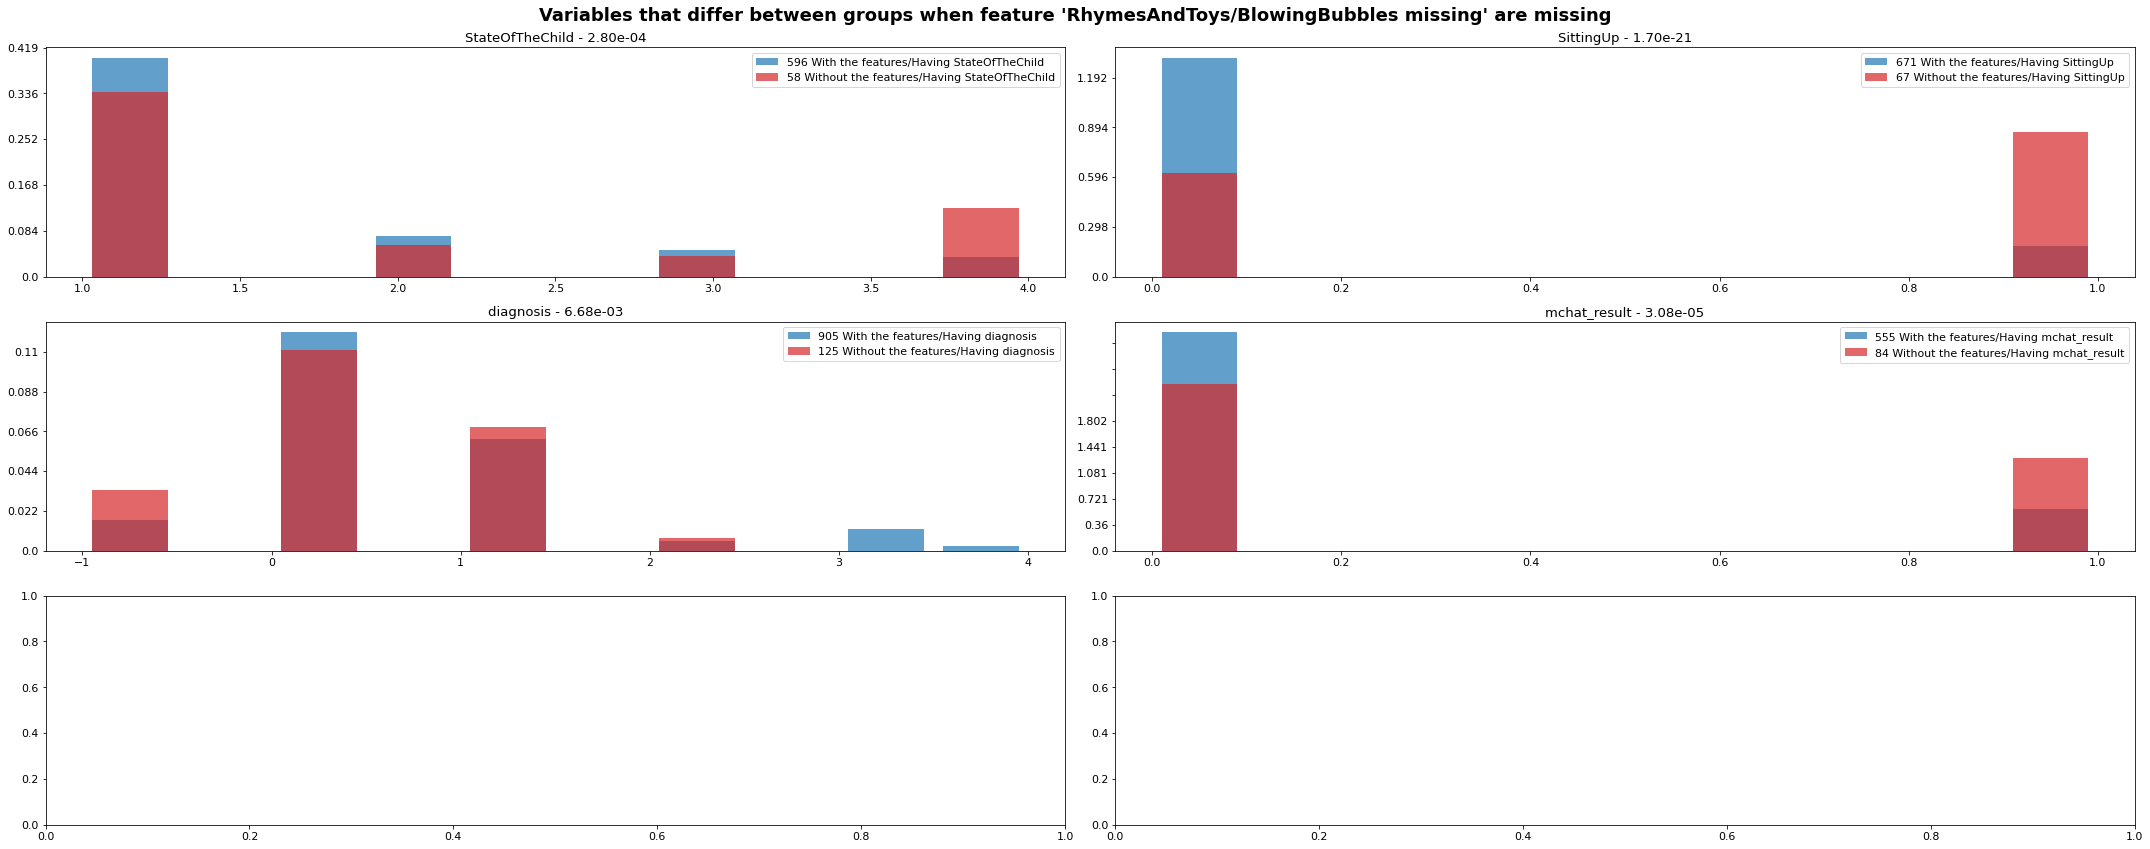

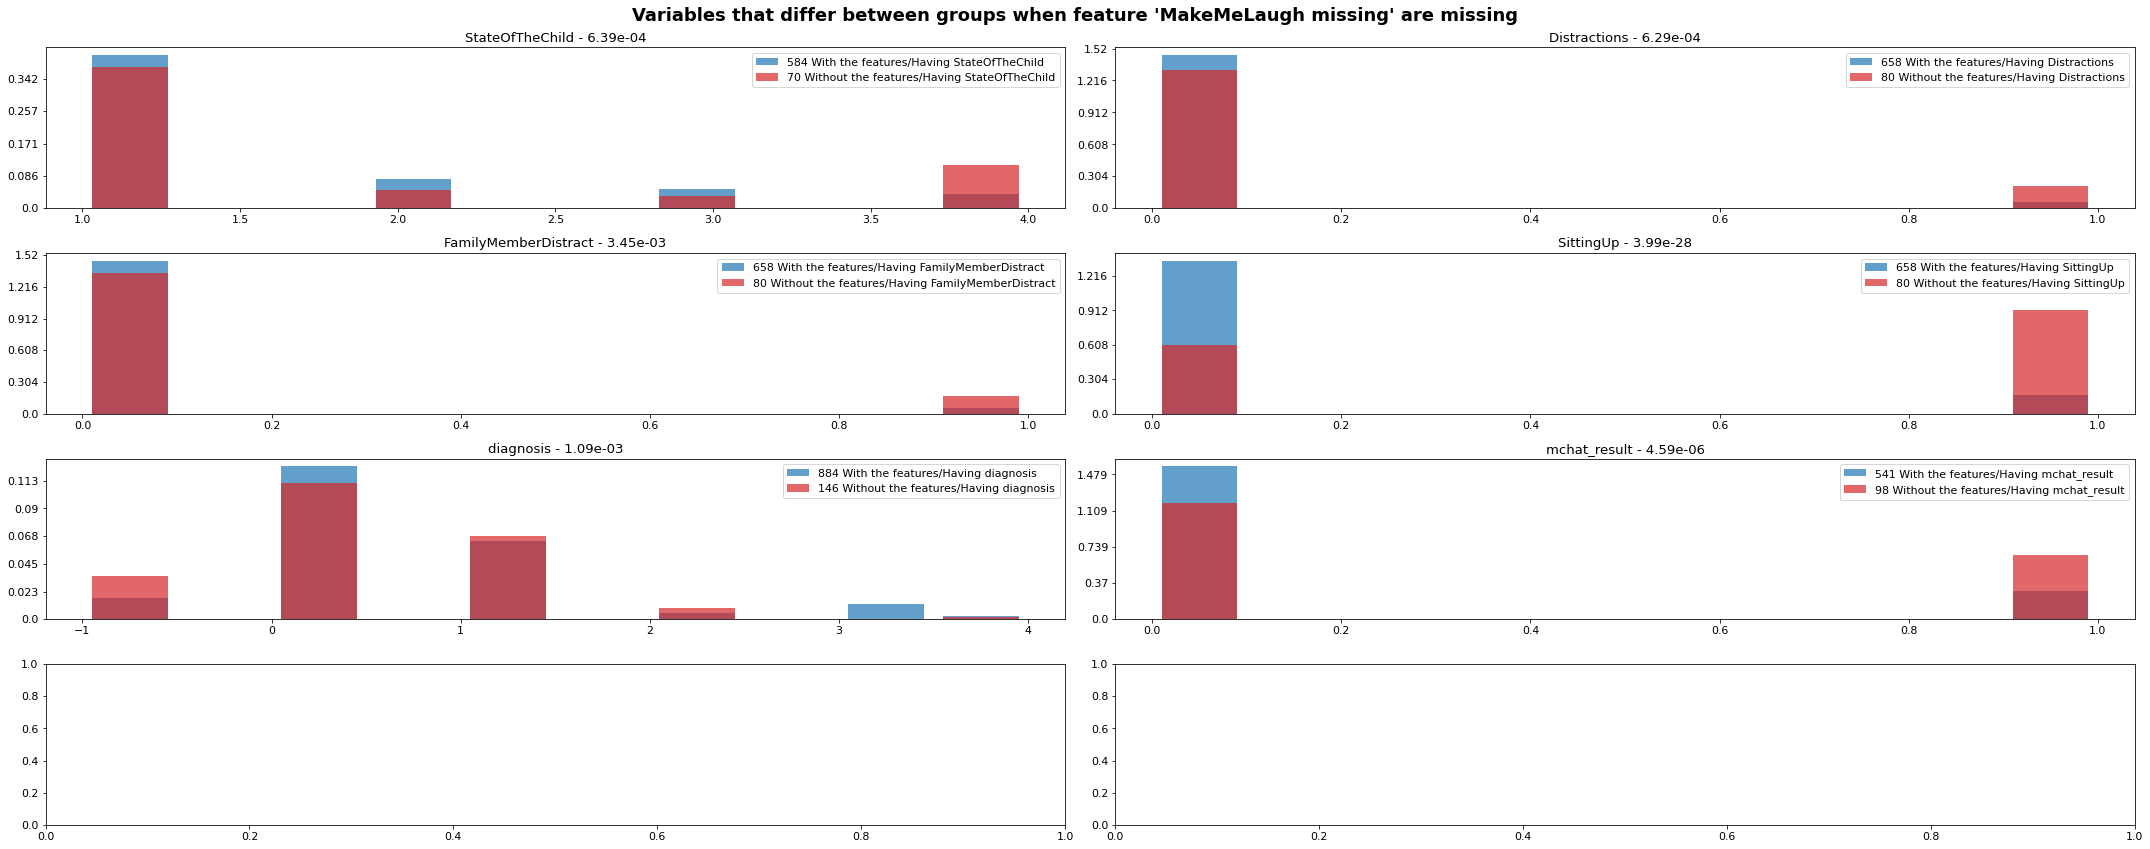

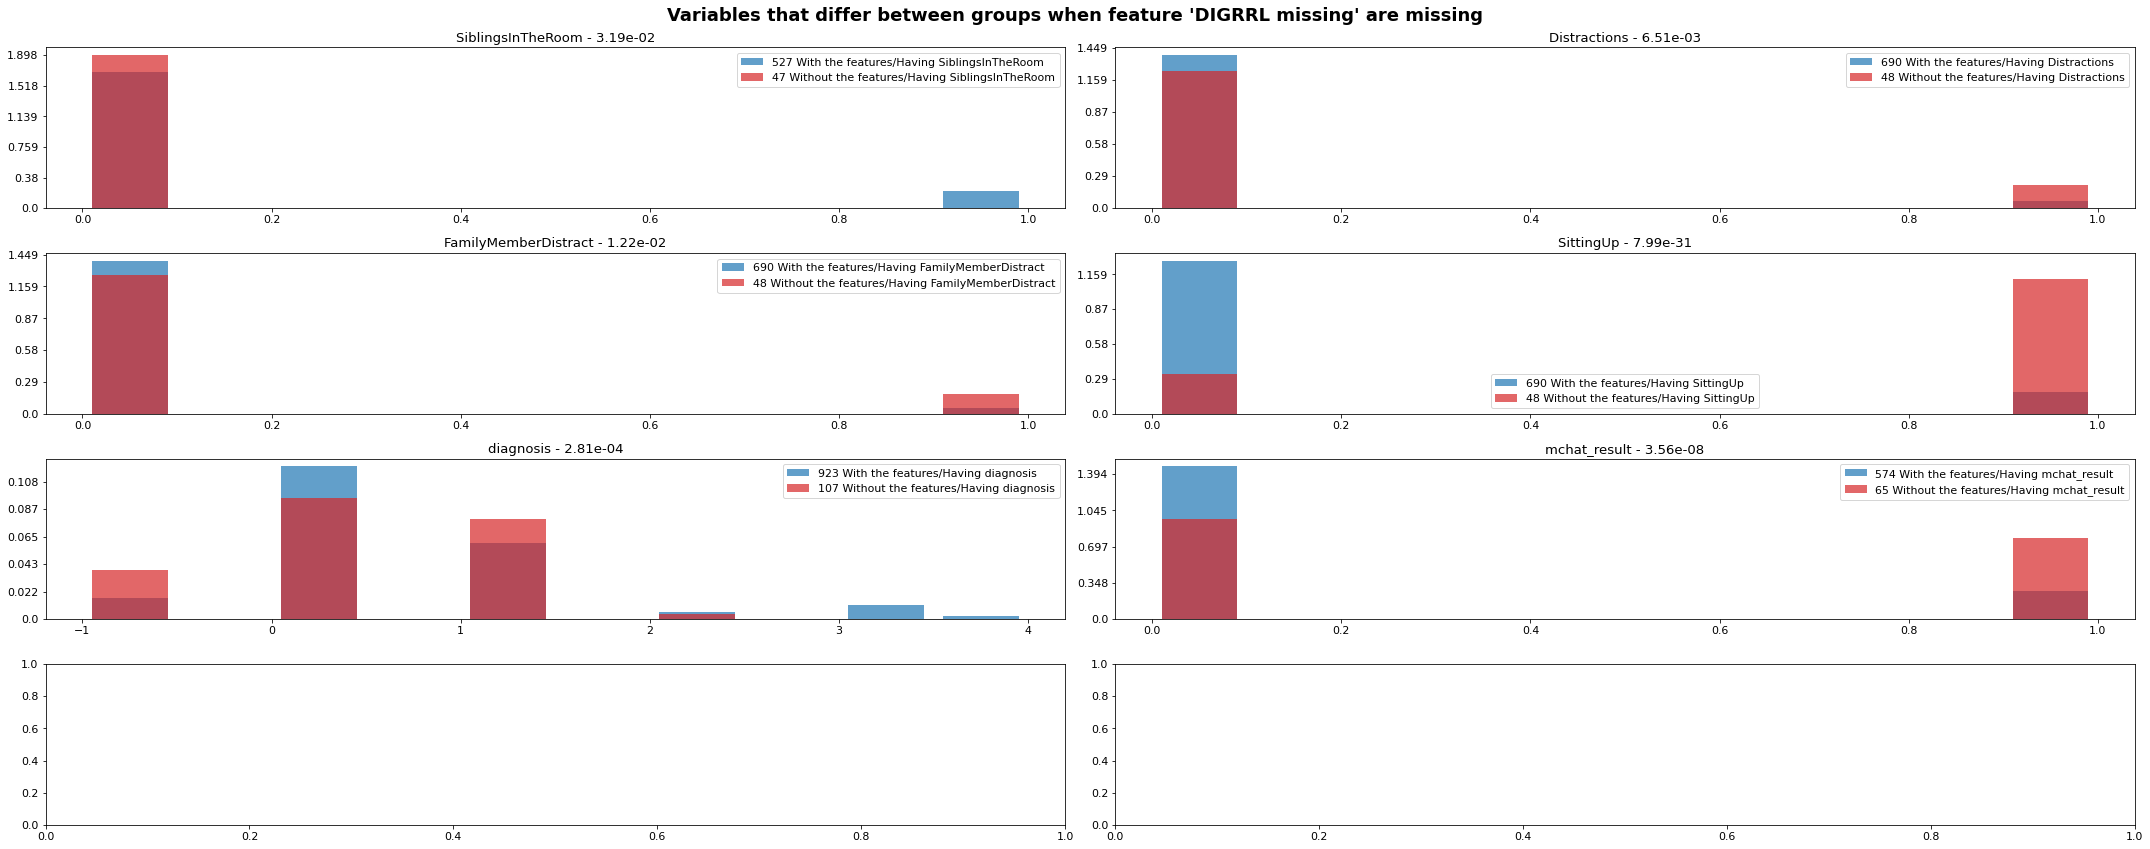

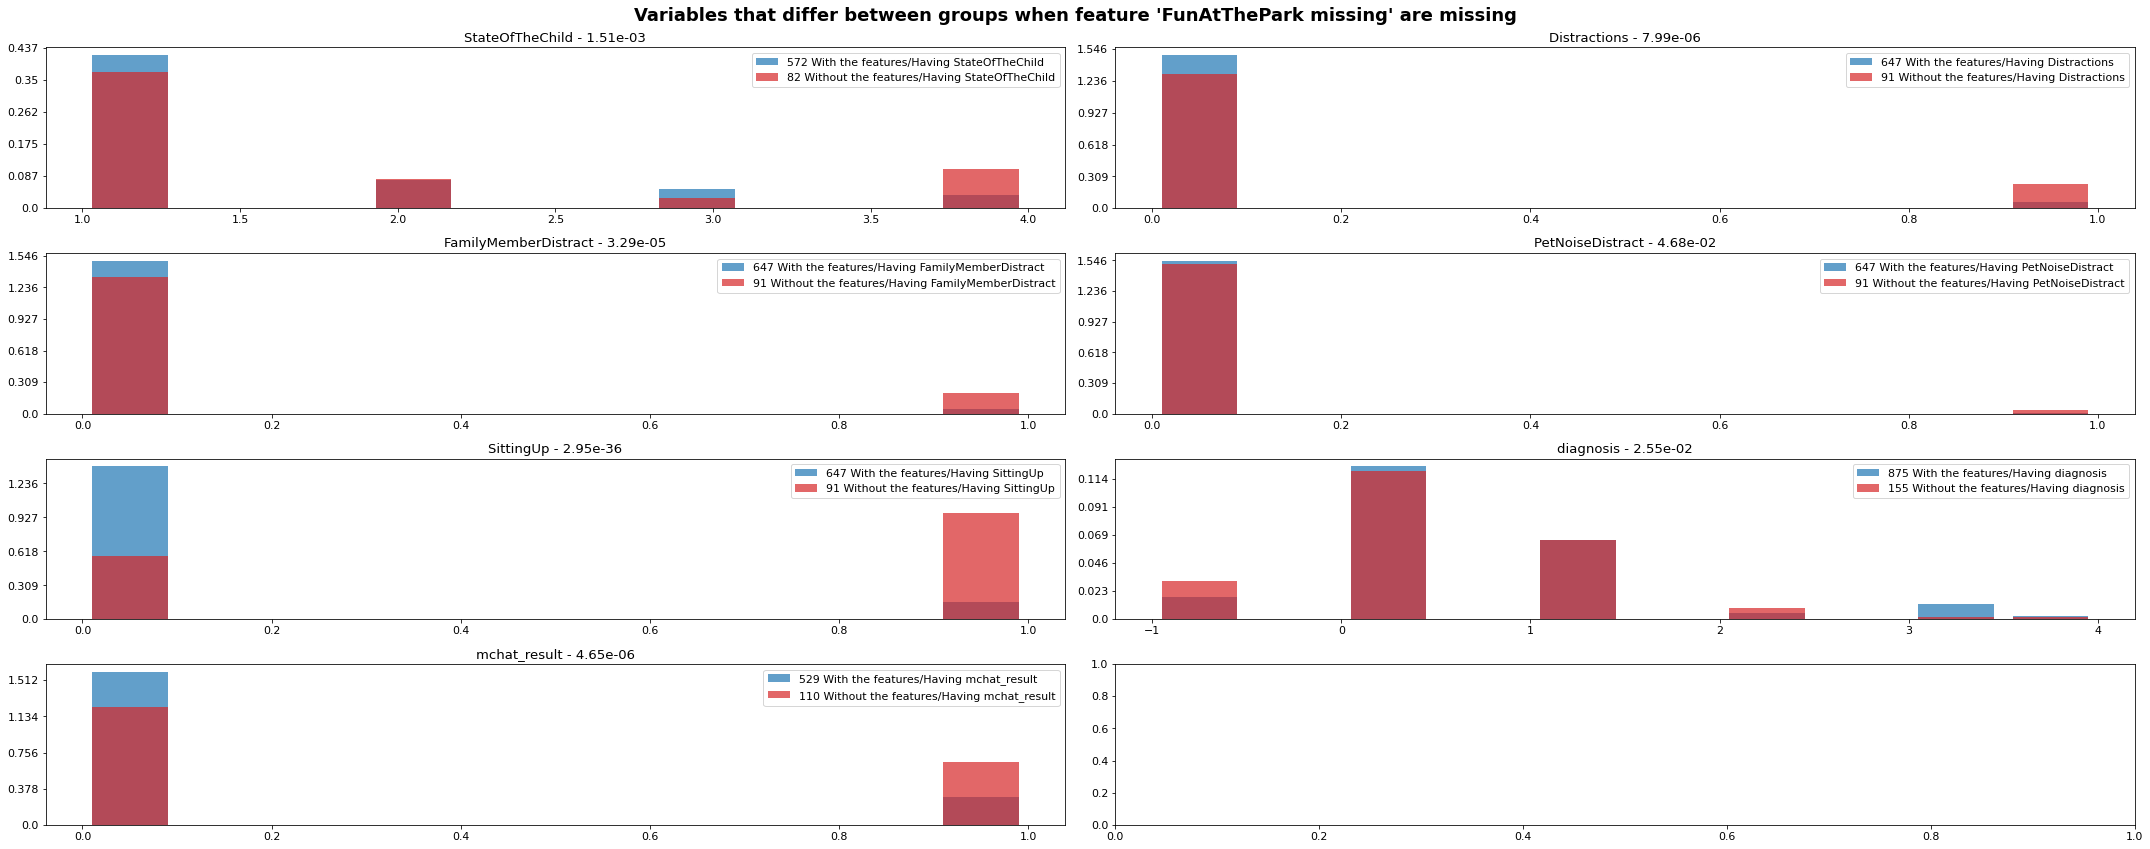

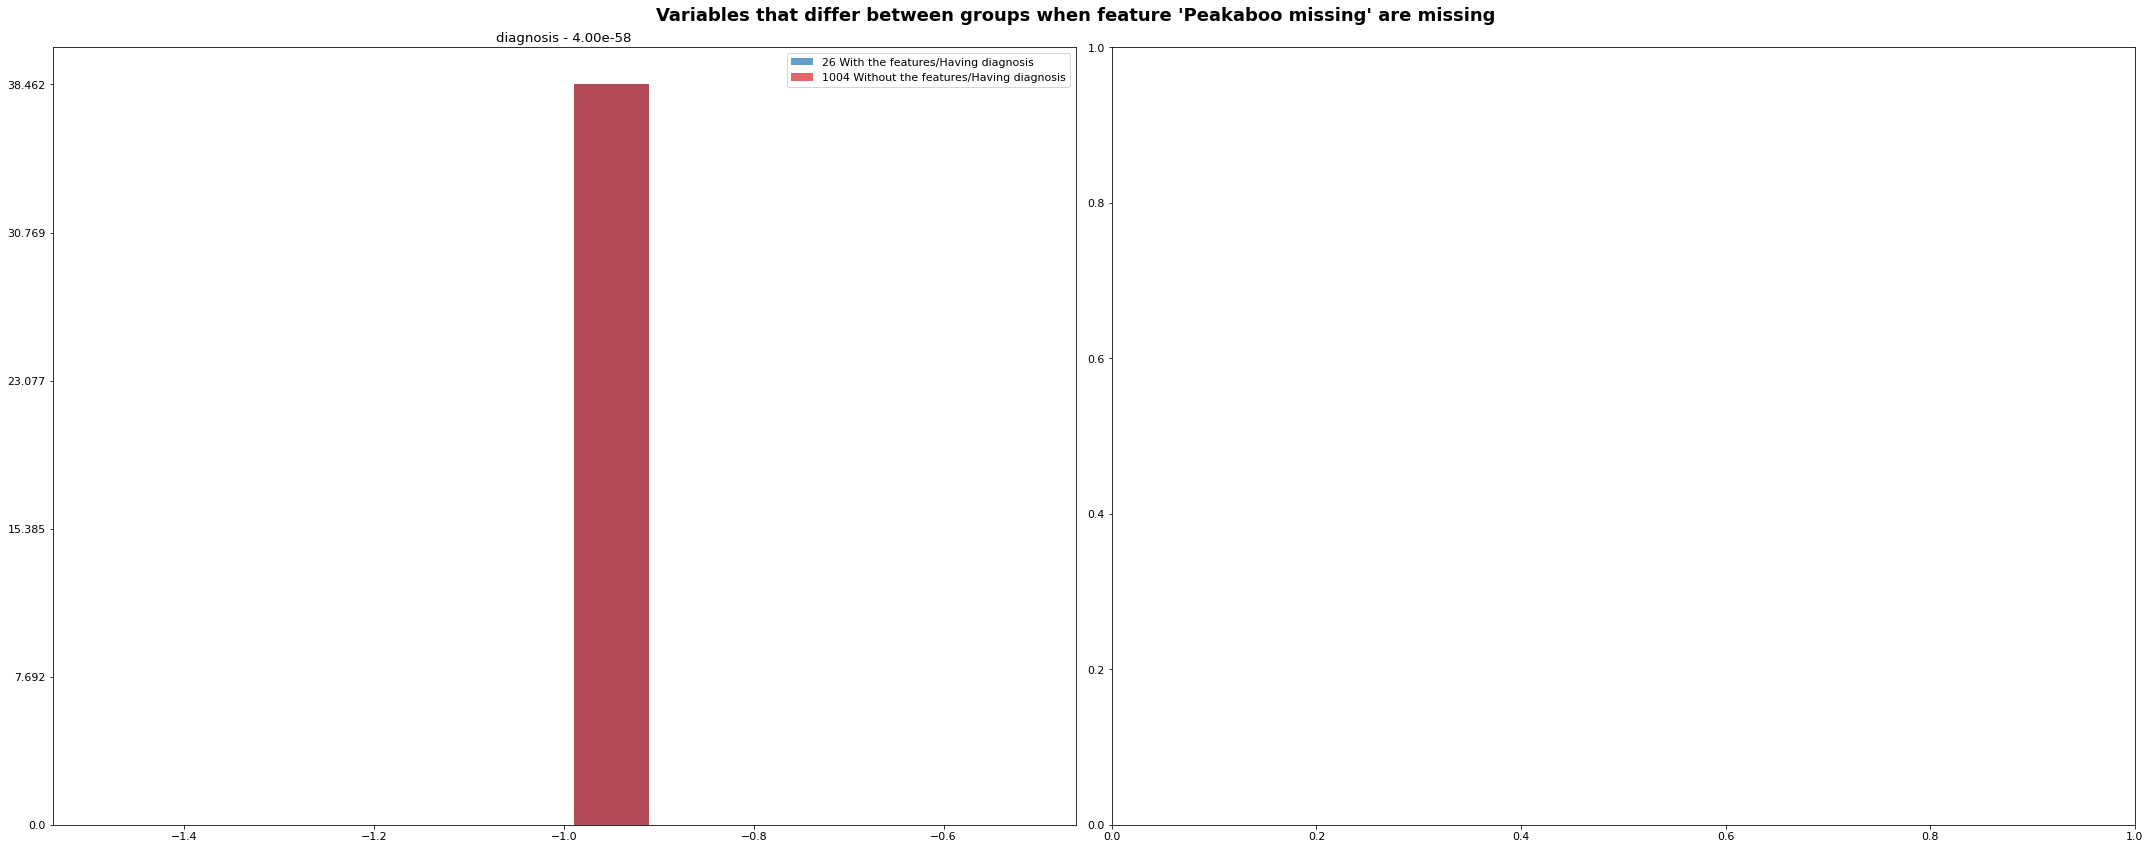

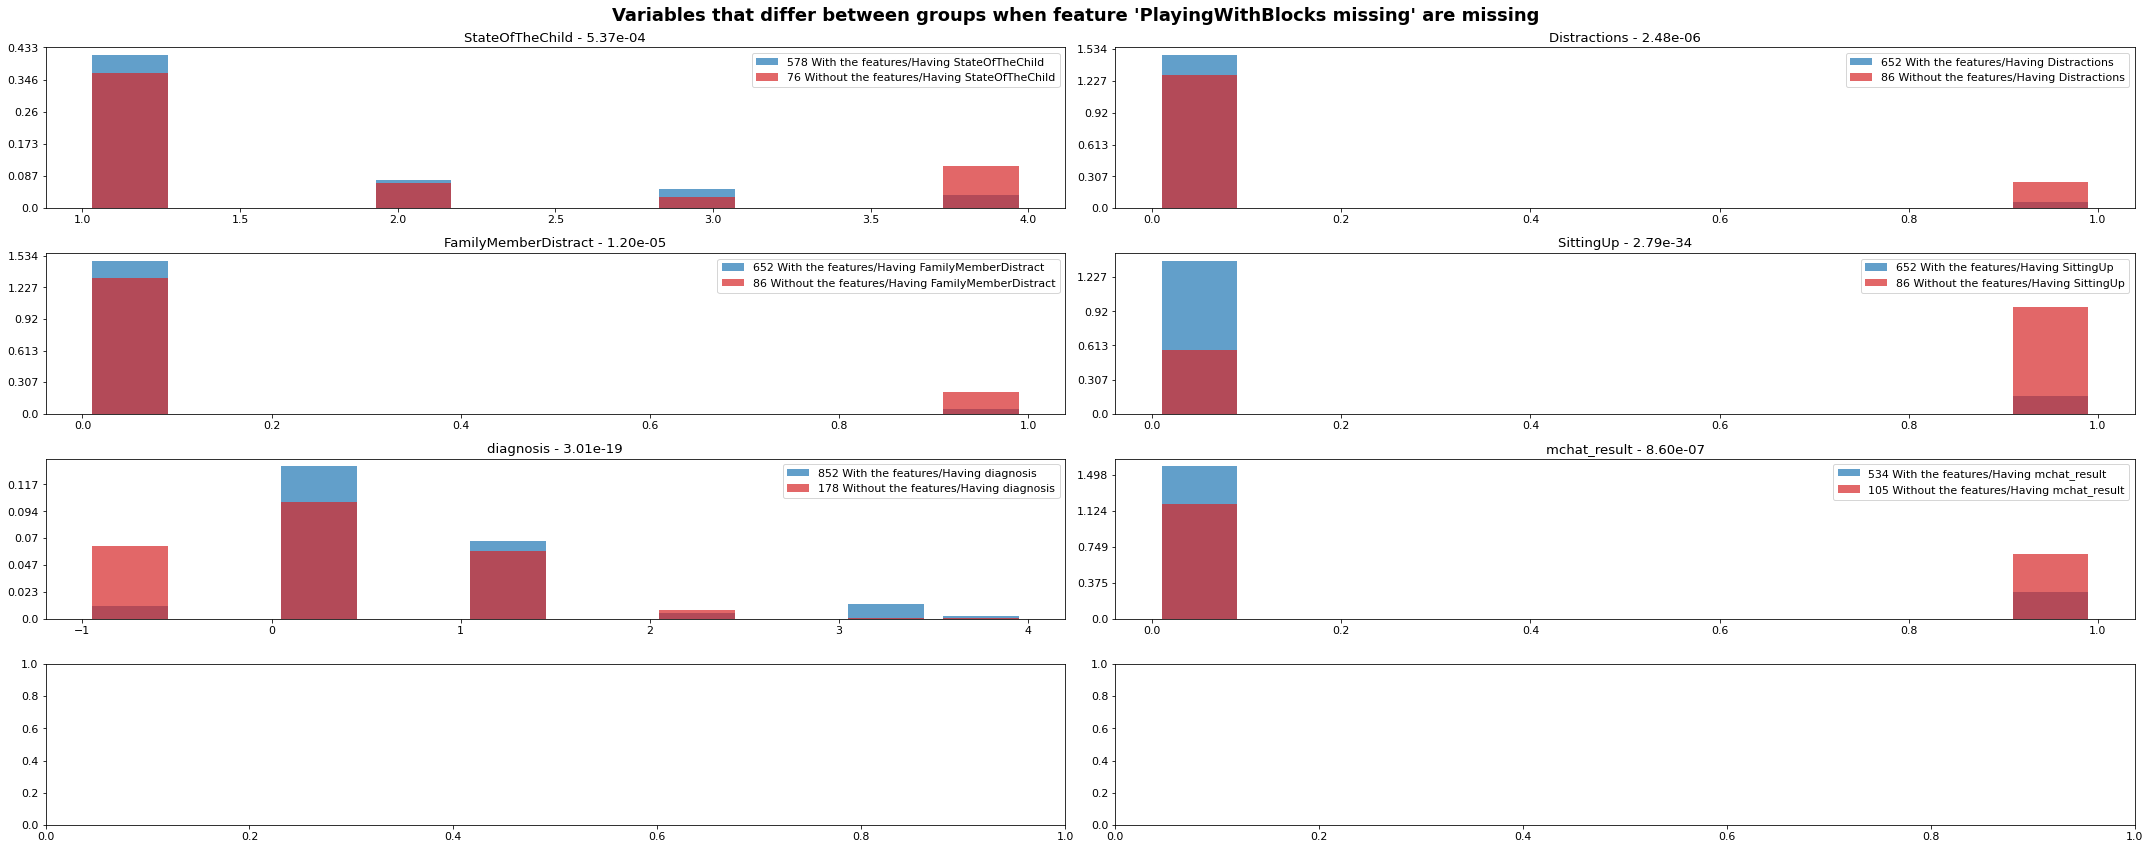

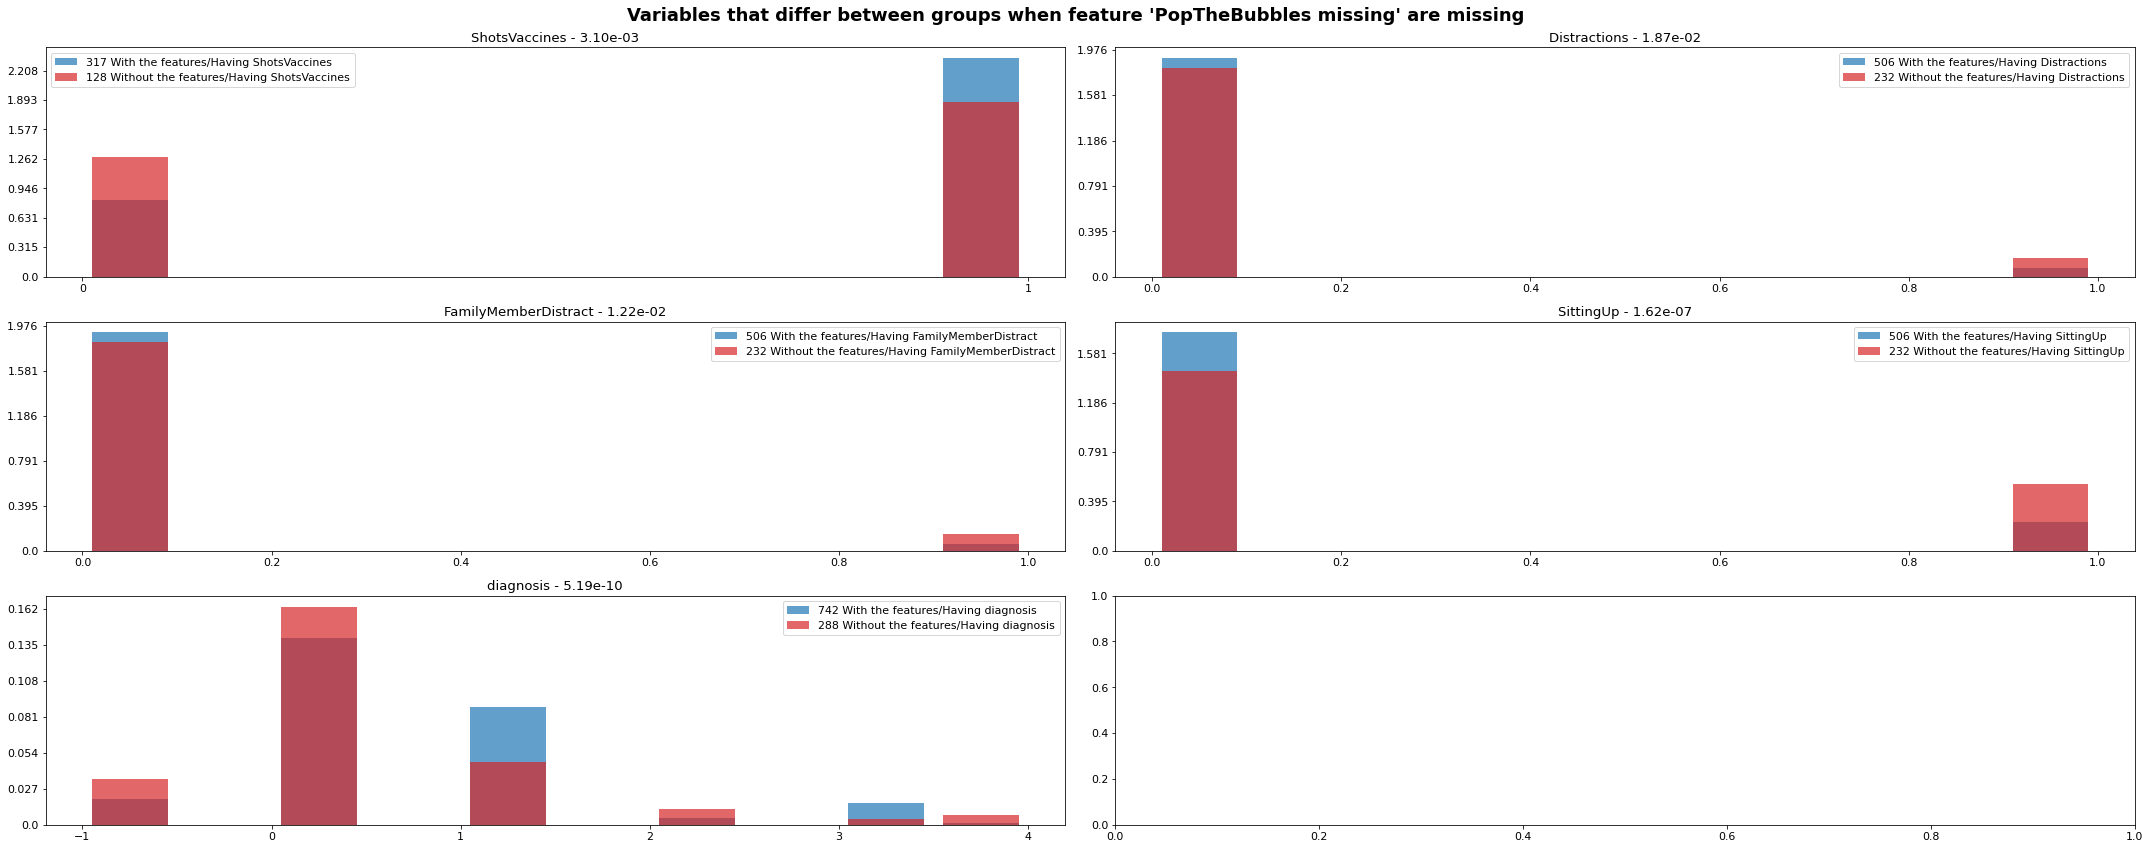

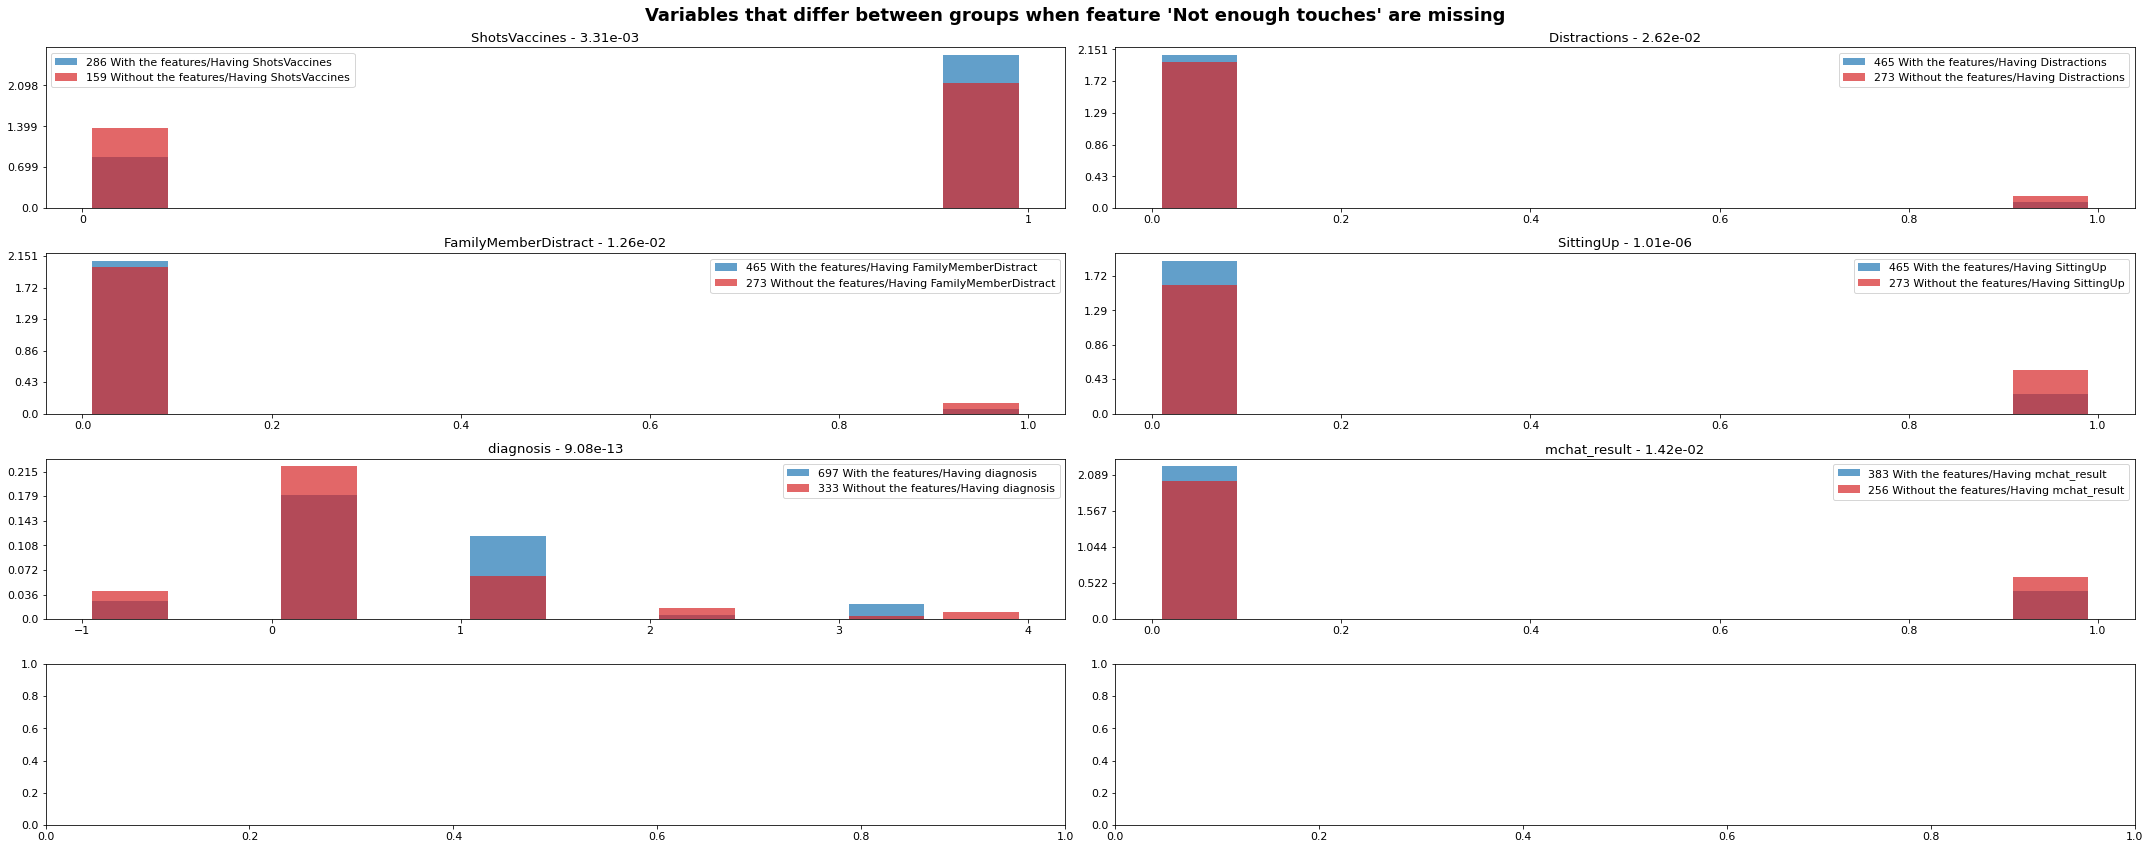

In [161]:
mask  = (mcar_matrix<0.05).astype(int)

locations = [(index, column) for index in mask.index for column in mask.columns if mask.loc[index, column]==1]
for i, row in mask.transpose().iterrows():
    
    variables_with_interactions = list(row[row==1].index)
    n_plot = len(variables_with_interactions)
    if n_plot==0:
        continue
        
        

    fig, axes = plt.subplots(n_plot//2+1, 2, figsize=(30, 12));axes = axes.flatten()
    fig.suptitle("Variables that differ between groups when feature '{}' are missing".format(grouped_features_label[i]), weight='bold', fontsize=18)
    for j, var in enumerate(variables_with_interactions):
        feats = grouped_features[i]
        
        d = data.df.copy()
    
        # Removing the administration without the game by design (6, 9 nd 12 months versions), or playing with blocks
        if idx in [6, 7, 8, 9]:
            d = d[d['stimuli_version']=='Older_Than_18']

        # removing the 18 Mo version for the Peakaboo features 
        elif idx == 5:
            d = d[d['stimuli_version']!='Older_Than_18']


        if i in dict_check_1_0.keys():
            for idx_group_that_should_be_there in dict_check_1_0[i]:
                d = d[d['Z_grouped_{}'.format(idx_group_that_should_be_there)]==0]
                
        
        having = d[d['Z_grouped_{}'.format(i)]==0][var].dropna()
        missing = d[d['Z_grouped_{}'.format(i)]==1][var].dropna()
        
        _, bins, _ = axes[j].hist(having,color='tab:blue',density=True, rwidth=.8, label='{} With the features/Having {}'.format(len(having), var), alpha=.7)
        axes[j].hist(missing, density=True, bins = bins, color='tab:red', rwidth=.8, label='{} Without the features/Having {}'.format(len(missing), var), alpha=.7)
        locs = axes[j].get_yticks(); axes[j].set_yticklabels(np.round(locs/len(having)*100,3))
        axes[j].set_title("{} - {:.2e}".format(var, mcar_matrix.loc[var, i]))
        axes[j].legend()
    plt.tight_layout();plt.show()

# Histogram of values of validity data columns


        # encode categorical variables
        df['diagnosis'].replace({'TD':0., 
                                'ASD':1., 
                                'DDLD':2., 
                                'ADHD':3.}, inplace = True)

        df['ethnicity'].replace({'Not Hispanic/Latino':0, 
                                'Hispanic/Latino':1, 
                                 'Unknown or not reported':np.nan}, inplace = True)

        df['race'].replace({'White':0., 
                    'White/Caucasian':0.,
                    'Black/African American':1., 
                    'More than one race':2.,
                    'American Indian/Alaskan Native':3.,
                    'Other':np.nan,
                    'Asian':np.nan,
                    'Unknown or not reported':np.nan,
                    'Unknown/Declined':np.nan,
                   }, inplace = True)

        df['sex'].replace({'M':0, 'F':1}, inplace=True)
        df['completed'].replace({'Complete (Do not readminister)':0, 'Partial (Do not readminister)':1, 'Incomplete (Readminister at next visit)':2}, inplace = True)

        df['StateOfTheChild'].replace({'In a calm and/or good mood':1, 'Slightly irritable':2, 'Somewhat distressed':3, 'Crying and/or tantrum':4}, inplace = True)
                

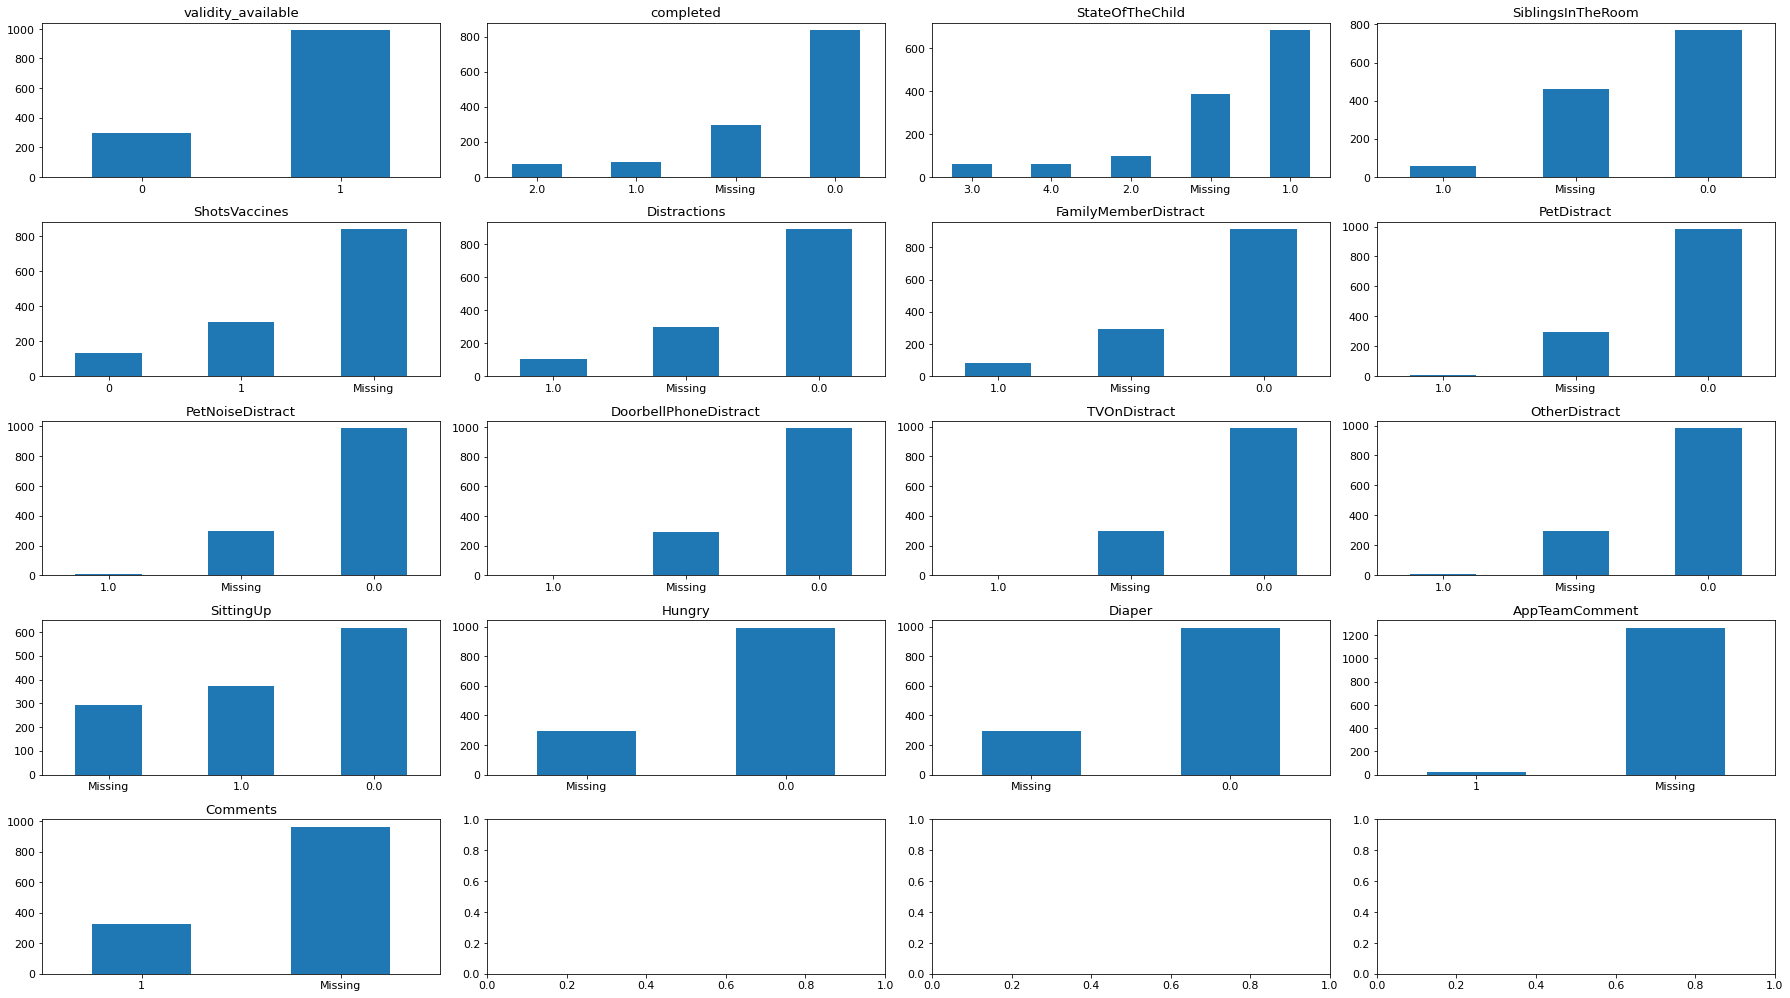

In [ ]:
n_plot = len(VALIDITY_COLUMNS)

fig, axes = plt.subplots(n_plot//4+1, 4, figsize=(25, 14)); axes=axes.flatten()

for i, col in enumerate(VALIDITY_COLUMNS):
    data.df[col].replace({np.nan:'Missing'}).value_counts().sort_values().plot(kind='bar', rot=0, ax=axes[i])
    axes[i].set_title(col)
    
plt.tight_layout()

diagnosis StateOfTheChild  Count
0        0.0               1    504
1        0.0               2     80
2        0.0               3     52
3        0.0               4     54
4        0.0         Missing     68
5        1.0               1    126
6        1.0               2     11
7        1.0               3      5
8        1.0               4      4
9        1.0         Missing     18

diagnosis  SittingUp  Count
0        0.0        0.0    434
1        0.0        1.0    324
2        1.0        0.0    127
3        1.0        1.0     37

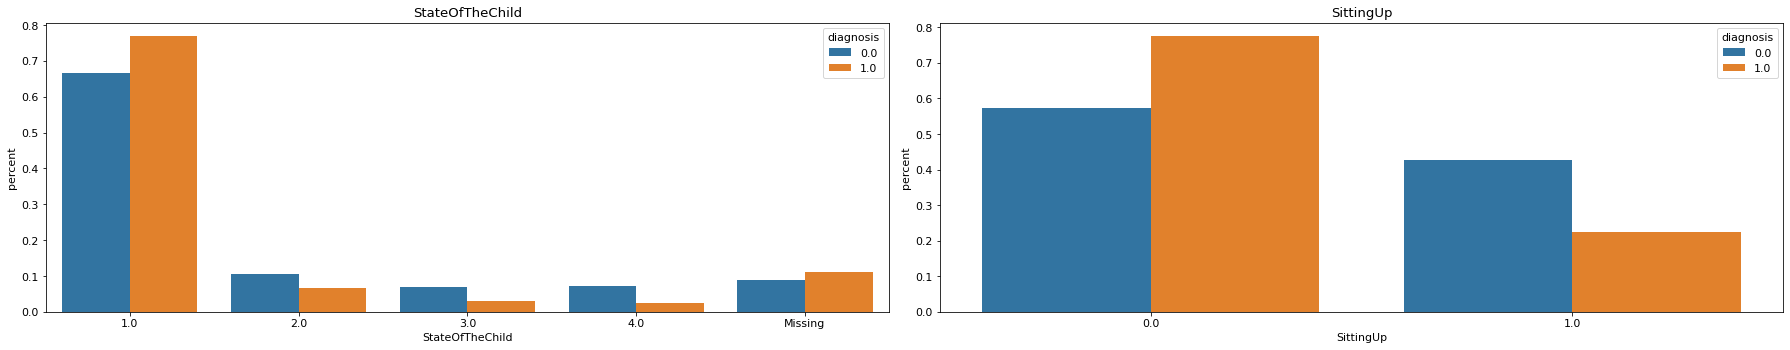

In [217]:

cols  = ['StateOfTheChild', 'SittingUp']
n_plot = 2

fig, axes = plt.subplots(1, 2, figsize=(25, 5)); axes=axes.flatten()

for i, col in enumerate(cols):
    
    df = data.df.copy()
    
    df = df[(df['diagnosis'].isin([0, 1])) & (df['validity_available']==1)]
    
    df[col].replace({np.nan:'Missing'}, inplace=True)
    
    pct3 = (df.groupby(['diagnosis', col]).size()/ df.groupby(['diagnosis']).size()).reset_index().rename({0:'percent'}, axis=1)
    display( df.groupby(['diagnosis', col]).size().reset_index().rename({0:'Count'}, axis=1))
    
    
    sns.barplot(x=col, hue='diagnosis', y='percent', data=pct3, ax=axes[i])


    axes[i].set_title(col)
    
plt.tight_layout()

# Prediction of the missing variables

In [49]:
for i, feats in grouped_features.items():
    data.df['Z_grouped_{}'.format(i)] = 0
    data.df.loc[data.df.drop(index=data.df.dropna(subset=feats, how='all').index).index, 'Z_grouped_{}'.format(i)] = 1

dict_check_1_0 = {9:[8],
                 10:[8, 9]}

touch_features =  ['number_of_touches','average_length','std_length','average_error','std_error','number_of_target','pop_rate',
 'average_touch_duration','std_touch_duration','average_delay_to_pop','std_delay_to_pop','average_force_applied','std_force_applied',
 'average_accuracy_variation','accuracy_consistency','average_touches_per_target', 'std_touches_per_target','average_time_spent','std_time_spent','exploratory_percentage']

In [254]:
grouped_features

{1: ['BB_gaze_percent_right',
  'BB_gaze_silhouette_score',
  'BB_postural_sway',
  'BB_postural_sway_derivative',
  'RT_postural_sway',
  'RT_postural_sway_derivative'],
 2: ['MML_postural_sway', 'MML_postural_sway_derivative'],
 3: ['DIGRRL_postural_sway', 'DIGRRL_postural_sway_derivative'],
 4: ['FP_gaze_speech_correlation',
  'FP_gaze_silhouette_score',
  'FP_postural_sway',
  'FP_postural_sway_derivative'],
 5: ['PB_postural_sway', 'PB_postural_sway_derivative'],
 6: ['PWB_postural_sway', 'PWB_postural_sway_derivative'],
 7: ['number_of_touches', 'number_of_target', 'exploratory_percentage'],
 8: ['average_length',
  'std_length',
  'average_error',
  'std_error',
  'pop_rate',
  'average_touch_duration',
  'std_touch_duration',
  'average_delay_to_pop',
  'std_delay_to_pop',
  'average_force_applied',
  'std_force_applied',
  'average_accuracy_variation',
  'accuracy_consistency',
  'average_touches_per_target',
  'std_touches_per_target'],
 9: ['average_time_spent', 'std_time_sp

In [ ]:
from interpret import show

for idx_grouped_missing_features, missing_feats in grouped_features.items():
    if idx_grouped_missing_features==0:
        continue

    df = pd.read_csv("/Users/samperochon/Duke/work/notes_on_stats/df_all.csv")

    df['stimuli_version'] = df['path'].apply(lambda path: path.split('/')[-2])
    df.loc[~df['stimuli_version'].isin(['Older_Than_18', '12_Months', '9_Months', '6_Months']), 'stimuli_version'] = 'Older_Than_18'


    for i, feats in grouped_features.items():
        df['Z_grouped_{}'.format(i)] = 0
        df.loc[df.drop(index=df.dropna(subset=missing_feats, how='all').index).index, 'Z_grouped_{}'.format(i)] = 1
    del i 
    
    features_name = [feat for feat in CVA_COLUMNS + CLINICAL_COLUMNS + VALIDITY_COLUMNS (((idx_grouped_missing_features not in [8, 9, 10]) and (feat not in missing_feats)) or
                                                                                        ((idx_grouped_missing_features in [8, 9, 10]) and (feat not in touch_features)) or
                                                                                        (feat not in ['completed']))]
    data = Dataset(df=df, 
                       use_missing_indicator_variables=False,
                       missing_data_handling='encoding', 
                       imputation_method='without', 
                       sampling_method='without',
                       outcome_column='Z_grouped_{}'.format(idx_grouped_missing_features),
                       features_name=features_name, 
                       scenario=None,
                       verbosity=0, 
                       proportion_train=1)
    
    exp = Experiments(data.dataset_name,
              dataset=data, 
            approach='ebm', 
            resolution=RESOLUTION, 
            bandwidth=BANDWIDTH, 
            previous_experiment=None,        
            verbosity=1, 
            debug=True, 
            save_experiment=False)
        
    exp.dataset.filter(administration={'complete': True})
    
    print(grouped_features_label[idx_grouped_missing_features])
        
    # Removing the administration without the game by design (6, 9 nd 12 months versions), or playing with blocks
    if idx_grouped_missing_features in [6, 7, 8, 9]:
        exp.dataset.df = exp.dataset.df[exp.dataset.df['stimuli_version']=='Older_Than_18']

    # removing the 18 Mo version for the Peakaboo features 
    elif idx_grouped_missing_features == 5:
        exp.dataset.df = exp.dataset.df[exp.dataset.df['stimuli_version']!='Older_Than_18']
                
        
    if idx_grouped_missing_features in dict_check_1_0.keys():
        for idx_group_that_should_be_there in dict_check_1_0[idx_grouped_missing_features]:
            exp.dataset.df = exp.dataset.df[exp.dataset.df['Z_grouped_{}'.format(idx_group_that_should_be_there)]==0]
    exp.fit_predict()
    exp.plot()

    ebm_local = exp.model.explain_local(data.X_train, data.y_train)
    show(ebm_local)

# Prediction of social attributes

In [267]:
df = pd.read_csv("/Users/samperochon/Duke/work/notes_on_stats/df_all.csv")

df['stimuli_version'] = df['path'].apply(lambda path: path.split('/')[-2])
df.loc[~df['stimuli_version'].isin(['Older_Than_18', '12_Months', '9_Months', '6_Months']), 'stimuli_version'] = 'Older_Than_18'
CLINICAL_COLUMNS

['diagnosis',
 'mullen_el',
 'mullen_fm',
 'mullen_rl',
 'mullen_vr',
 'mullen_elc_std',
 'ados_total',
 'ados_rrb',
 'ados_sa',
 'srs_total_tscore',
 'srs_social_awareness_tscore',
 'srs_social_motivation_tscore',
 'cbcl_scaleIV_score',
 'cbcl_asd_score',
 'mchat_total',
 'mchat_final',
 'mchat_result']

In [265]:


df = pd.read_csv("/Users/samperochon/Duke/work/notes_on_stats/df_all.csv")

df['stimuli_version'] = df['path'].apply(lambda path: path.split('/')[-2])
df.loc[~df['stimuli_version'].isin(['Older_Than_18', '12_Months', '9_Months', '6_Months']), 'stimuli_version'] = 'Older_Than_18'

data = Dataset(df=df, 
                   use_missing_indicator_variables=False,
                   missing_data_handling='encoding', 
                   imputation_method='without', 
                   sampling_method='without',
                   outcome_column='diagnosis',
                   features_name=DEFAULT_PREDICTORS, 
                   scenario=None,
                   scale_data=False, 
                   verbosity=4, 
                   proportion_train=1)
data.filter(administration={'complete': True, 
                            'order':'first'})


Post-processing inital df (removing columns with no cva features, encoding srings, compute administrations order, compute condensed S/NS variables)... 
Predicting diagnosis based on 29 features
Splitting dataset into test and train set.
Encoding 1956 (train) and 0 (test) missing values with -5.
Removing 116/1956 incomplete administrations.
Removing 581/1840 keeping first admin.
1259 administrations left.


id
diagnosis     
-1.0        90
 0.0       792
 1.0       290
 2.0        27
 3.0        49
 4.0        11

Splitting dataset into test and train set.
Encoding 1259 (train) and 0 (test) missing values with -5.


<AxesSubplot:>

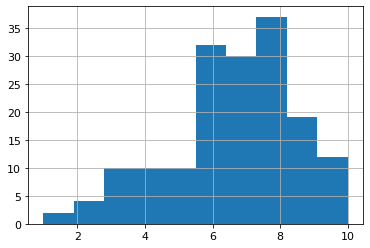

In [274]:
data.df[~data.df['ados_sa'].isna()]['ados_sa'].hist()

In [222]:



df = pd.read_csv("/Users/samperochon/Duke/work/notes_on_stats/df_all.csv")

df['stimuli_version'] = df['path'].apply(lambda path: path.split('/')[-2])
df.loc[~df['stimuli_version'].isin(['Older_Than_18', '12_Months', '9_Months', '6_Months']), 'stimuli_version'] = 'Older_Than_18'


for i, feats in grouped_features.items():
    df['Z_grouped_{}'.format(i)] = 0
    df.loc[df.drop(index=df.dropna(subset=missing_feats, how='all').index).index, 'Z_grouped_{}'.format(i)] = 1
del i 

features_name = [feat for feat in CVA_COLUMNS + CLINICAL_COLUMNS + VALIDITY_COLUMNS if (((idx_grouped_missing_features not in [8, 9, 10]) and (feat not in missing_feats)) or
                                                                                        ((idx_grouped_missing_features in [8, 9, 10]) and (feat not in touch_features)))]
data = Dataset(df=df, 
                   use_missing_indicator_variables=False,
                   missing_data_handling='encoding', 
                   imputation_method='without', 
                   sampling_method='without',
                   outcome_column='Z_grouped_{}'.format(idx_grouped_missing_features),
                   features_name=features_name, 
                   scenario=None,
                   scale_data=False, 
                   verbosity=0, 
                   proportion_train=1)

exp = Experiments(data.dataset_name,
          dataset=data, 
        approach='ebm', 
        resolution=RESOLUTION, 
        bandwidth=BANDWIDTH, 
        previous_experiment=None,        
        verbosity=1, 
        debug=True, 
        save_experiment=False)

exp.dataset.filter(administration={'complete': True})

print(grouped_features_label[idx_grouped_missing_features])

# Removing the administration without the game by design (6, 9 nd 12 months versions), or playing with blocks
if idx_grouped_missing_features in [6, 7, 8, 9]:
    exp.dataset.df = exp.dataset.df[exp.dataset.df['stimuli_version']=='Older_Than_18']

# removing the 18 Mo version for the Peakaboo features 
elif idx_grouped_missing_features == 5:
    exp.dataset.df = exp.dataset.df[exp.dataset.df['stimuli_version']!='Older_Than_18']


if idx_grouped_missing_features in dict_check_1_0.keys():
    for idx_group_that_should_be_there in dict_check_1_0[idx_grouped_missing_features]:
        exp.dataset.df = exp.dataset.df[exp.dataset.df['Z_grouped_{}'.format(idx_group_that_should_be_there)]==0]
exp.fit_predict()
exp.plot()

ebm_local = exp.model.explain_local(data.X_train, data.y_train)
show(ebm_local)

['BB_gaze_percent_right',
 'BB_gaze_silhouette_score',
 'S_gaze_percent_right',
 'S_gaze_silhouette_score',
 'FP_gaze_speech_correlation',
 'FP_gaze_silhouette_score',
 'proportion_of_name_call_responses',
 'average_response_to_name_delay',
 'name_call_response_binary',
 'FB_postural_sway',
 'FB_postural_sway_derivative',
 'DIGC_postural_sway',
 'DIGC_postural_sway_derivative',
 'DIGRRL_postural_sway',
 'DIGRRL_postural_sway_derivative',
 'ST_postural_sway',
 'ST_postural_sway_derivative',
 'MP_postural_sway',
 'MP_postural_sway_derivative',
 'PB_postural_sway',
 'PB_postural_sway_derivative',
 'BB_postural_sway',
 'BB_postural_sway_derivative',
 'RT_postural_sway',
 'RT_postural_sway_derivative',
 'MML_postural_sway',
 'MML_postural_sway_derivative',
 'PWB_postural_sway',
 'PWB_postural_sway_derivative',
 'FP_postural_sway',
 'FP_postural_sway_derivative',
 'number_of_touches',
 'average_length',
 'std_length',
 'average_error',
 'std_error',
 'number_of_target',
 'pop_rate',
 'averag

FunAtThePark missing 1840 85


AUROC  AUC-PR  AUC-PR-Gain  AUC-PR-Corrected  AUC-PR-Gain-Corrected  F1 score (2 PPVxTPR/(PPV+TPR))  F1 score Corrected  Accuracy  Matthews correlation coefficient (MCC)  Sensitivity, recall, hit rate, or true positive rate (TPR)  Specificity, selectivity or true negative rate (TNR)  Precision or positive predictive value (PPV)  Negative predictive value (NPV)  Miss rate or false negative rate (FNR)  False discovery rate (FDR=1-PPV)  False omission rate (FOR=1-NPV)
0    1.0     1.0          1.0               1.0                    1.0                             1.0                 1.0     0.999                                   0.998                                              0.997                                                         1.0                                              1.0                            0.999                                   0.003                               0.0                            0.001

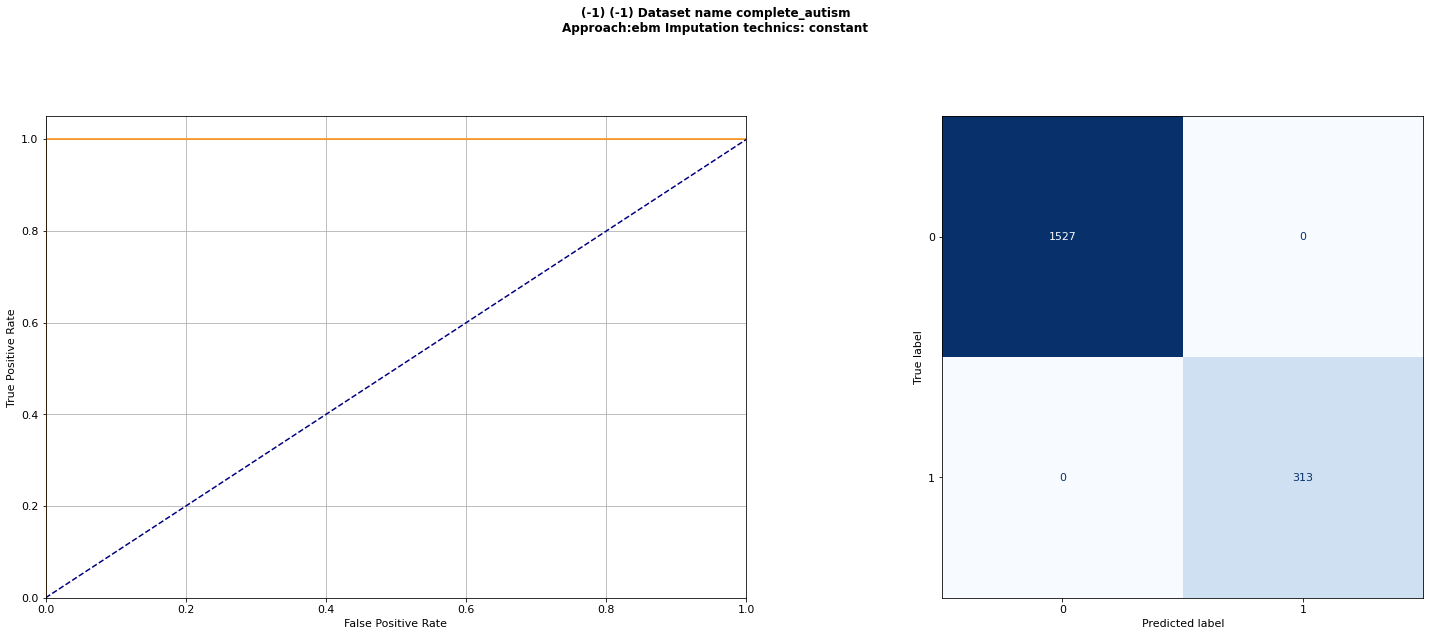

<!-- http://127.0.0.1:7491/140318922579216/ -->

<!-- http://127.0.0.1:7491/140320300481744/ -->

In [275]:
idx_grouped_missing_features = 4
missing_feats = ['FP_gaze_speech_correlation',
  'FP_gaze_silhouette_score',
  'FP_postural_sway',
  'FP_postural_sway_derivative']

#df = pd.read_csv("/home01/sam/df_all.csv")
df = pd.read_csv("/Users/samperochon/Duke/work/notes_on_stats/df_all.csv")

for i, feats in grouped_features.items():
    df['Z_grouped_{}'.format(i)] = 0
    df.loc[df.drop(index=df.dropna(subset=missing_feats, how='all').index).index, 'Z_grouped_{}'.format(i)] = 1
del i 


d = df.copy()

if idx_grouped_missing_features in dict_check_1_0.keys():
    for idx_group_that_should_be_there in dict_check_1_0[idx_grouped_missing_features]:
        d = d[d['Z_grouped_{}'.format(idx_group_that_should_be_there)]==0]


features_name = [feat for feat in CVA_COLUMNS + CLINICAL_COLUMNS + VALIDITY_COLUMNS if (((idx_grouped_missing_features not in [8, 9, 10]) and (feat not in missing_feats)) or
                                                                                        ((idx_grouped_missing_features in [8, 9, 10]) and (feat not in touch_features)) or
                                                                                        (feat not in ['completed']))]

data = Dataset(df=d, 
               use_missing_indicator_variables=False,
               missing_data_handling='encoding', 
               imputation_method='without', 
               sampling_method='without',
               outcome_column='Z_grouped_{}'.format(idx_grouped_missing_features),
               features_name=features_name,
               scenario=None,#'asd_td_age_matched_n_balanced',
               verbosity=0, 
               proportion_train=1)
data.filter(administration={'complete': True})

print(grouped_features_label[idx_grouped_missing_features], len(data.df), data.X_train.shape[1])

exp = Experiments(data.dataset_name,
              dataset=data, 
            approach='ebm', 
            resolution=RESOLUTION, 
            bandwidth=BANDWIDTH, 
            previous_experiment=None,        
            verbosity=1, 
            debug=True, 
            save_experiment=False)

exp.fit_predict()
exp.plot()


ebm_local = exp.model.explain_local(data.X_train, data.y_train)
show(ebm_local)

In [275]:
df = pd.read_csv("/Users/samperochon/Duke/work/notes_on_stats/df_all.csv")
data = Dataset(df=df, 
               use_missing_indicator_variables=False,
               missing_data_handling='encoding', 
               imputation_method='without', 
               sampling_method='without',
               outcome_column='diagnosis',#'Z_grouped_{}'.format(idx_grouped_missing_features),
               features_name=features_name,
               scenario=None,#'asd_td_age_matched_n_balanced',
               verbosity=0, 
               proportion_train=1)
data.filter(administration={'complete': True})

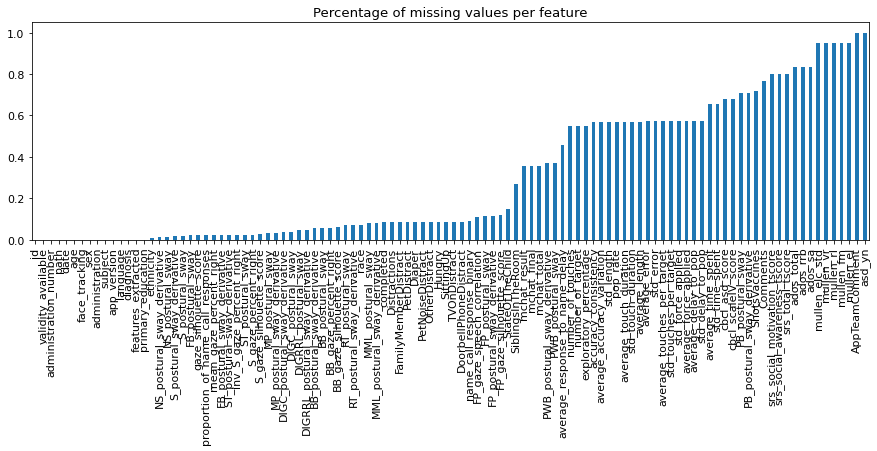

In [276]:
data.df.isna().mean().sort_values().plot(
    kind="bar", figsize=(15, 4),
    title="Percentage of missing values per feature");

# Building calibratedprobabilities

In [ ]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import SVC
# generate dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=4)
# define model
model = SVC(gamma='scale', class_weight='balanced')
# wrap the model
calibrated = CalibratedClassifierCV(model, method='isotonic', cv=3)
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(calibrated, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.3f' % mean(scores))